In [1]:
import os
import json

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas_ta as ta

In [4]:
from trading import utils, performance, strategy

## Upload data

In [5]:
INPUT = os.getcwd() + '/data/historical/stocks/'

In [6]:
datas = utils.load_data(INPUT)

In [7]:
timeseries = utils.sort_data(datas)

## Hold strategy

In [10]:
hold_performance = dict()
hold_equity = strategy.hold(timeseries)
for symbol in timeseries.keys():
    hold_performance[symbol] = performance.get_performance(
        hold_equity[symbol])

c:\Users\33614\OneDrive\Bureau\github\stocks_analysis\trading\performance.py:22: RuntimeWarning: invalid value encountered in scalar power
  annual_performance = (performance - 1) ** (1/delta_years) - 1


In [ ]:
for symbol in timeseries.keys():
    fig, ax = plt.subplots(figsize=(10,6))
    plt.semilogy(hold_equity[symbol], label='Hold strat')
    plt.title(f'Daily Times Series for the {symbol} stock')
    plt.legend(loc='upper left')

## Best performers last day strategy

In [ ]:
for symbol,data in timeseries.items():
    timeseries[symbol]['low_ratio'] = (data['low'] - data['open']) / data['close']
    timeseries[symbol]['delta_session_ratio'] = (data['close'] - data['open']) / data['close']

In [46]:
two_signma_decrease_positive_session = dict()
for symbol,data in timeseries.items():
    tmp = data['low_ratio'].where(
        data['delta_session_ratio'] > 0).quantile(.05)
    two_signma_decrease_positive_session[symbol] = tmp


(array([ 1.,  0.,  0.,  0.,  3.,  3.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,
         1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  4.,  5.,  5.,  6.,  3.,
         6.,  2.,  2.,  5.,  4.,  9., 12.,  6.,  8.,  6., 11.,  9., 13.,
         9.,  8.,  8.,  7.,  8.,  4.,  0.,  6.,  4.,  1.,  1.]),
 array([-0.03131219, -0.03089053, -0.03046887, -0.03004721, -0.02962555,
        -0.02920389, -0.02878223, -0.02836057, -0.02793891, -0.02751725,
        -0.02709559, -0.02667393, -0.02625227, -0.02583061, -0.02540896,
        -0.0249873 , -0.02456564, -0.02414398, -0.02372232, -0.02330066,
        -0.022879  , -0.02245734, -0.02203568, -0.02161402, -0.02119236,
        -0.0207707 , -0.02034904, -0.01992738, -0.01950572, -0.01908406,
        -0.0186624 , -0.01824074, -0.01781908, -0.01739742, -0.01697576,
        -0.0165541 , -0.01613245, -0.01571079, -0.01528913, -0.01486747,
        -0.01444581, -0.01402415, -0.01360249, -0.01318083, -0.01275917,
        -0.01233751, -0.01191585, -0.01149419, -0.01107253,

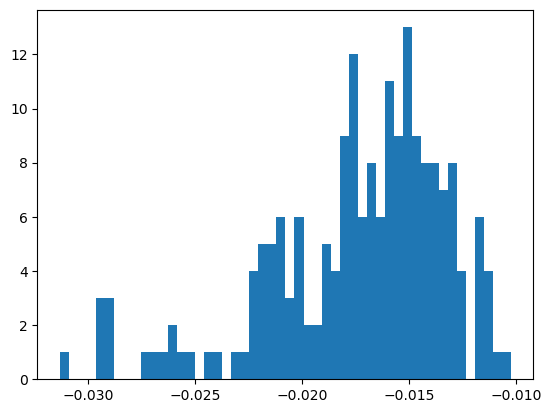

In [51]:
plt.hist(pd.Series(two_signma_decrease_positive_session),50)

In [65]:
data['low_ratio'] < two_signma_decrease_positive_session[symbol]

date
1999-11-01     True
1999-11-02    False
1999-11-03    False
1999-11-04    False
1999-11-05    False
              ...  
2024-07-26    False
2024-07-29    False
2024-07-30    False
2024-07-31    False
2024-08-01     True
Name: low_ratio, Length: 6227, dtype: bool

In [74]:
for symbol,data in timeseries.items():
    tmp = - data['delta_session_ratio'] / two_signma_decrease_positive_session[symbol]
    stop_cond =  data['low_ratio'] < two_signma_decrease_positive_session[symbol]
    timeseries[symbol]['perf'] = tmp
    timeseries[symbol]['perf_stopped'] = tmp[~stop_cond].fillna(-1)

In [115]:
y = pd.DataFrame()
for symbol,data in timeseries.items():
    y[symbol] = data['perf_stopped']

C:\Users\33614\AppData\Local\Temp\ipykernel_24184\3518700606.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y[symbol] = data['perf_stopped']
C:\Users\33614\AppData\Local\Temp\ipykernel_24184\3518700606.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  y[symbol] = data['perf_stopped']
C:\Users\33614\AppData\Local\Temp\ipykernel_24184\3518700606.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

In [117]:
test = y.shift().transpose().apply(lambda x: x.dropna().sort_values().tail(10).index)

In [157]:
strat_test = list()
for i in range(y.shape[0]):
    strat_test.append(y[test.iloc[i]].loc[test.index[i]].sum() / test.iloc[i].shape[0] / 10) # 10 otherwise computer cannot compute the results
strat_test = pd.Series(strat_test, index=y.index)

C:\Users\33614\AppData\Local\Temp\ipykernel_24184\1504606687.py:3: RuntimeWarning: invalid value encountered in scalar divide
  strat_test.append(y[test.iloc[i]].loc[test.index[i]].sum() / test.iloc[i].shape[0] / 10)


In [171]:
multiplier = (strat_test + 1).cumprod().iloc[-1] / (strat_test + 1).cumprod().iloc[1]

In [172]:
(multiplier) ** (1/years) - 1, (multiplier - 1) ** (1/years) - 1

(978.457004865364, 978.457004865364)

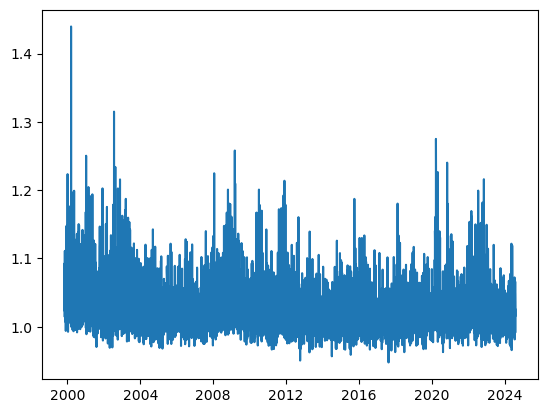

In [160]:
plt.plot(strat_test + 1)

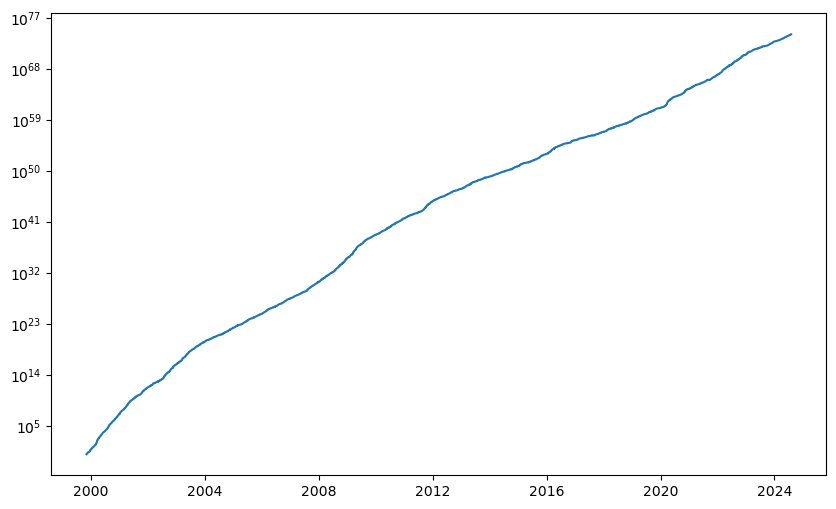

In [159]:
fig, ax = plt.subplots(figsize=(10,6))
plt.semilogy((strat_test + 1).cumprod())

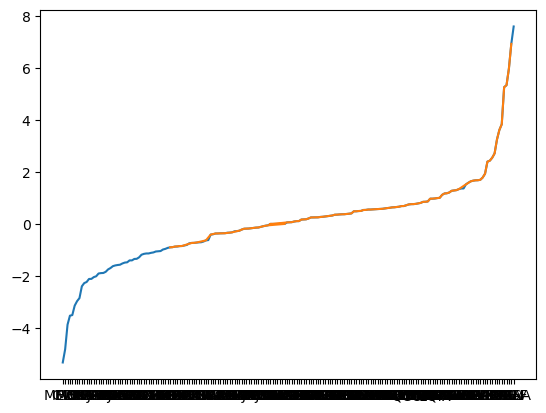

In [76]:
plt.plot(test.sort_values())
plt.plot(test2.sort_values())

In [ ]:
for symbol in timeseries.keys():
    fig, ax = plt.subplots(figsize=(10,6))
    plt.scatter(timeseries[symbol]['low_ratio'], timeseries[symbol]['delta_session_ratio'],
                s=0.1, label=f'{symbol} price')

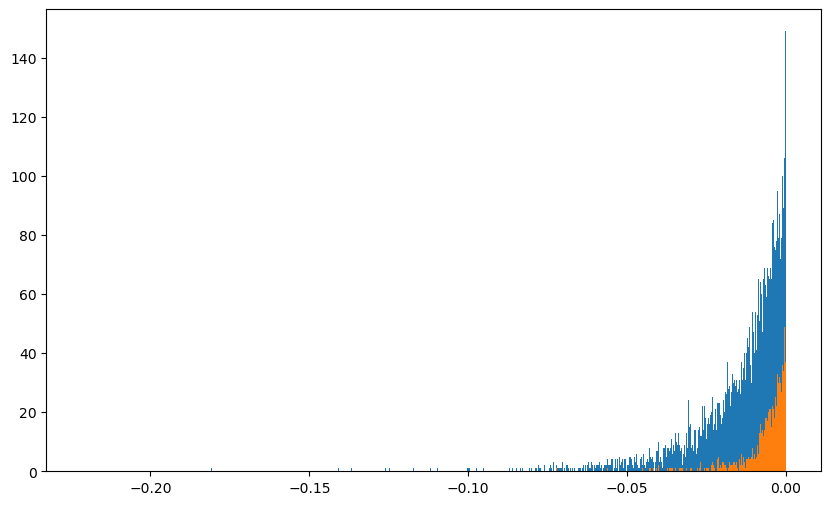

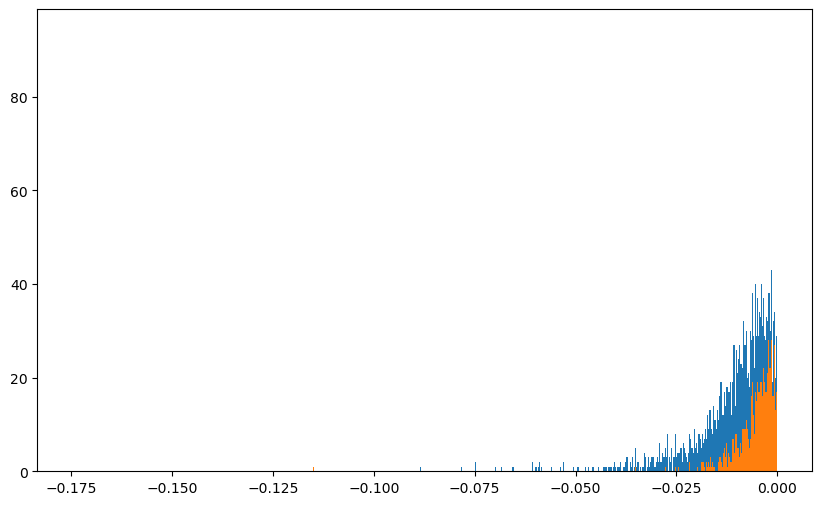

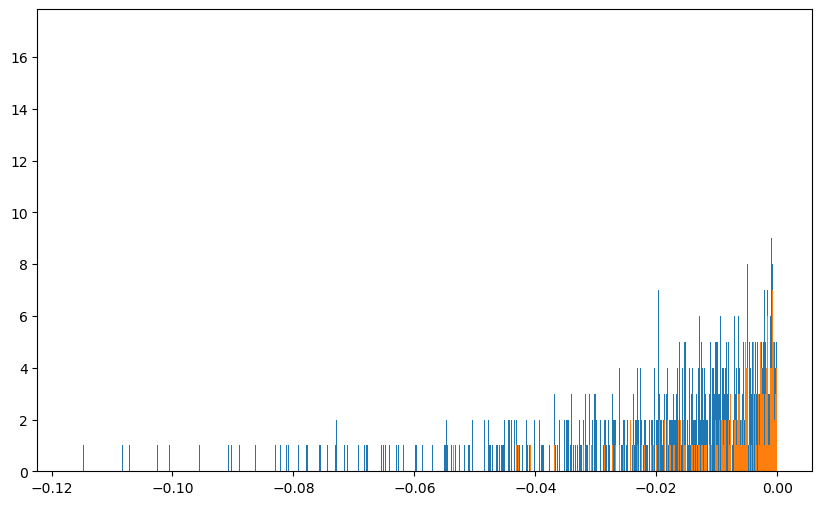

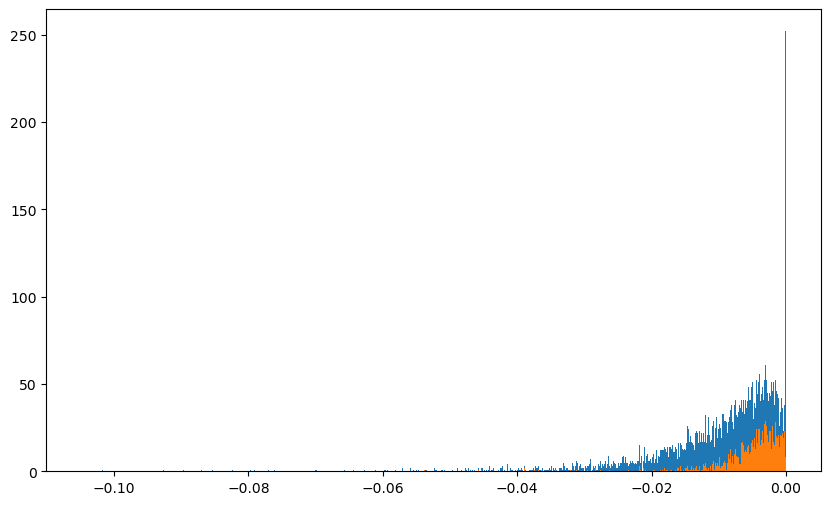

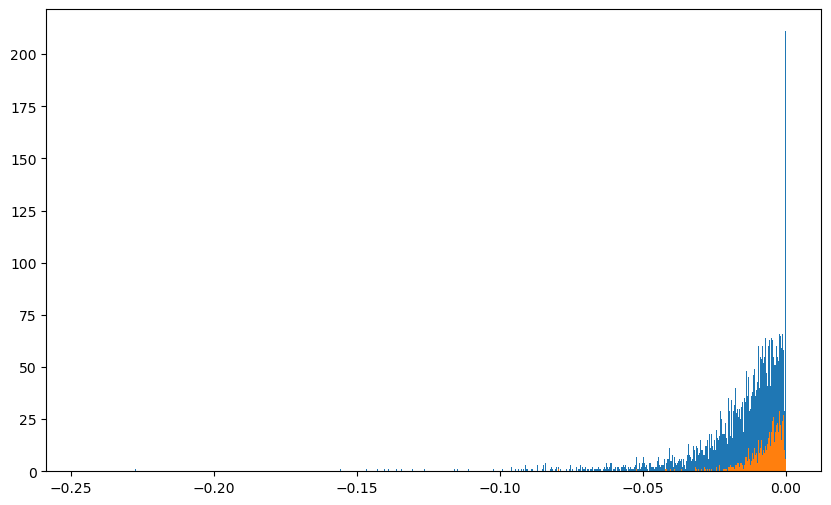

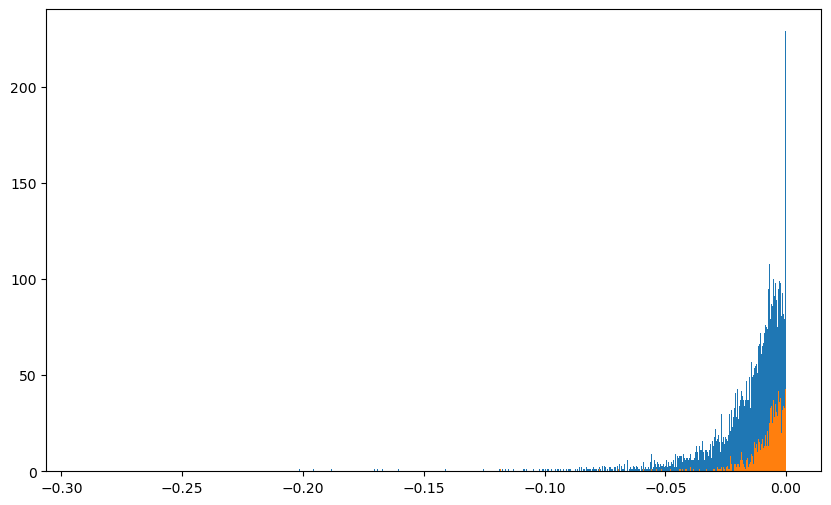

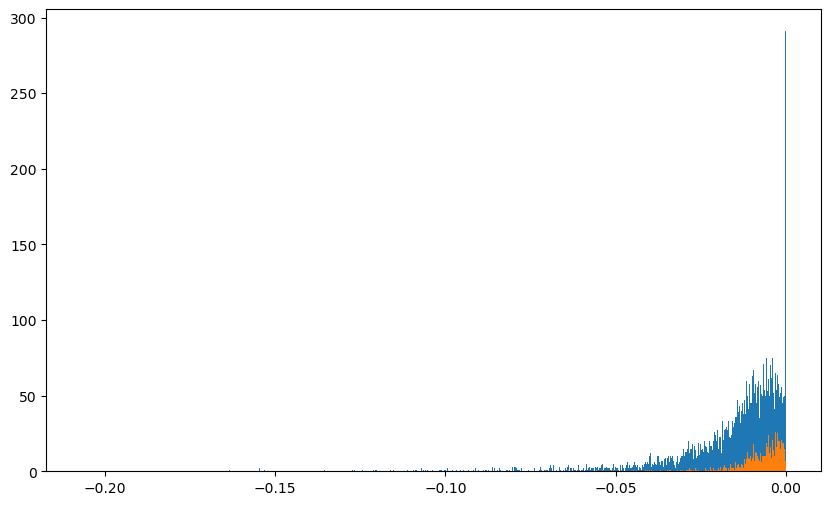

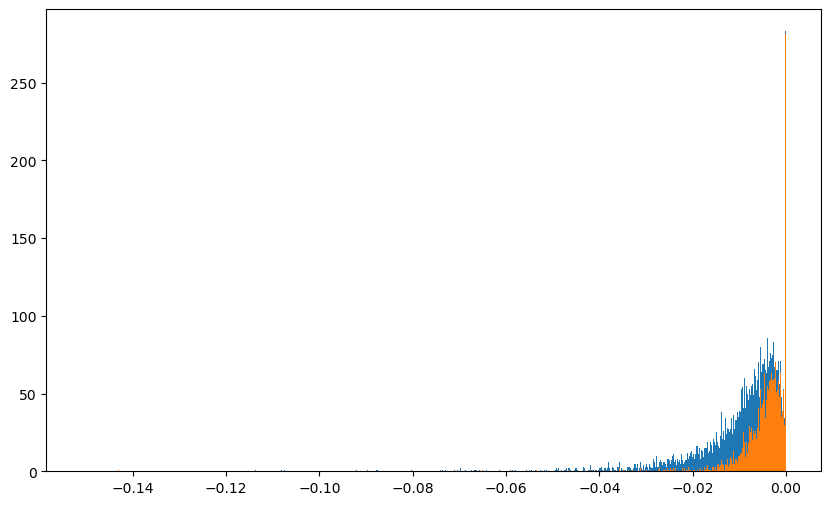

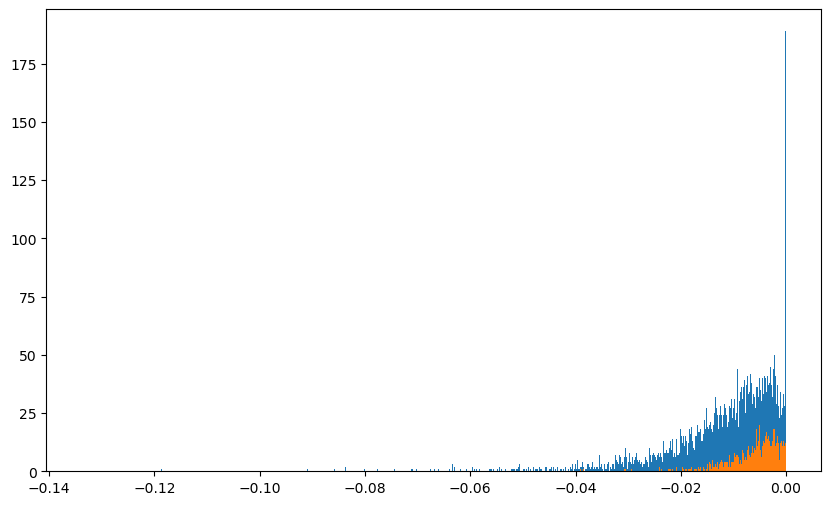

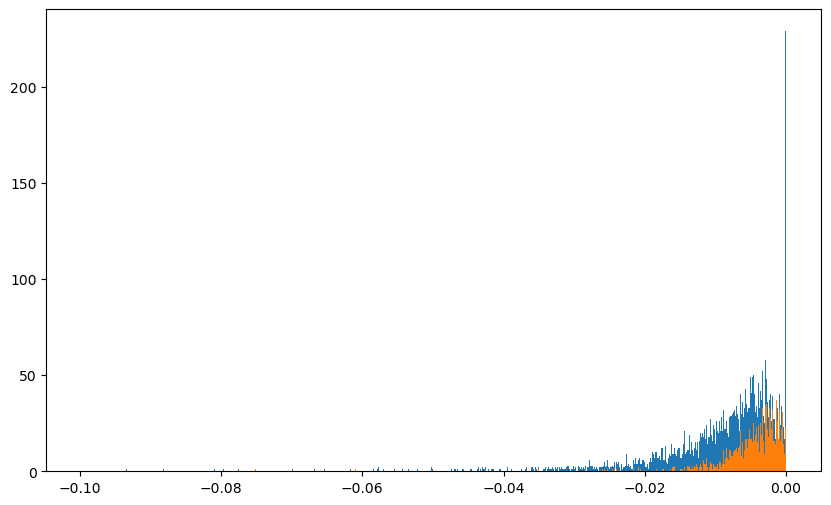

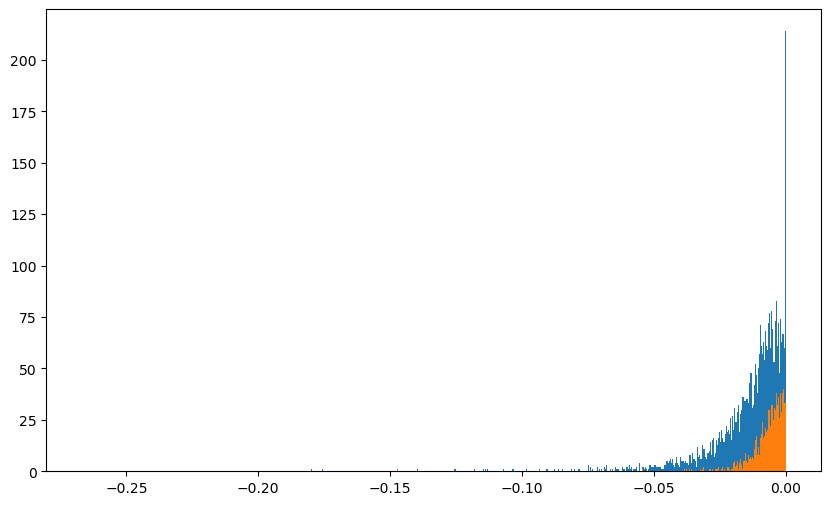

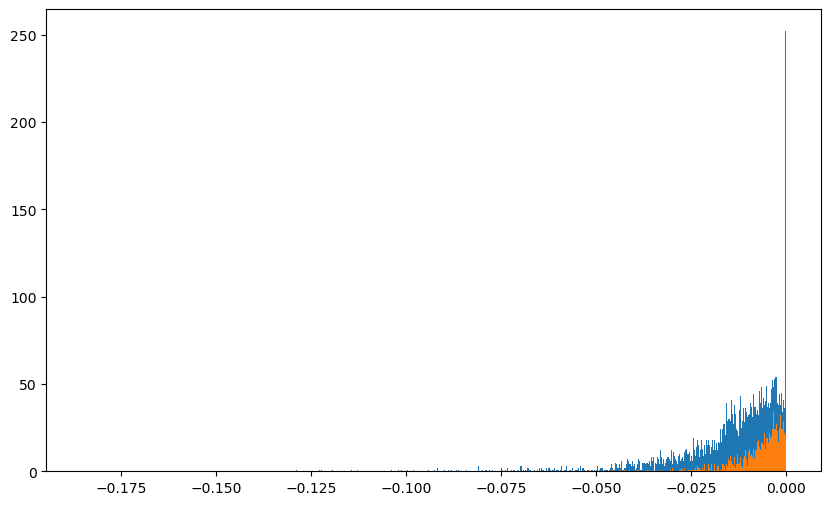

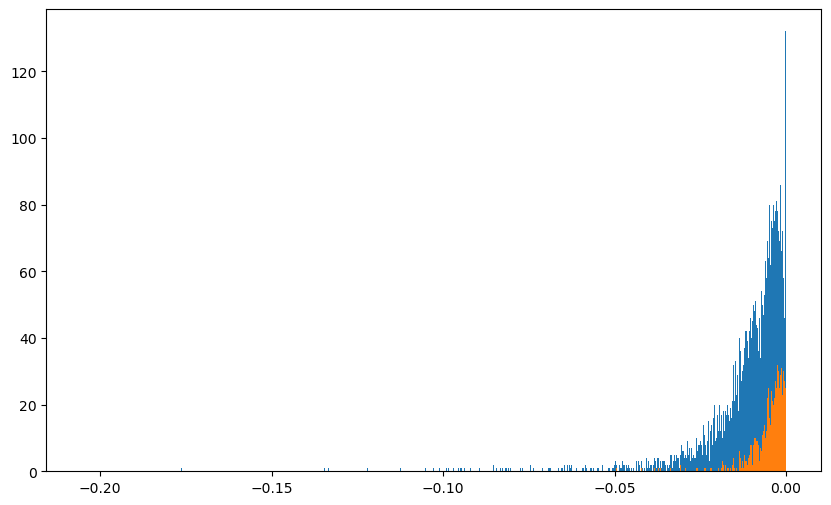

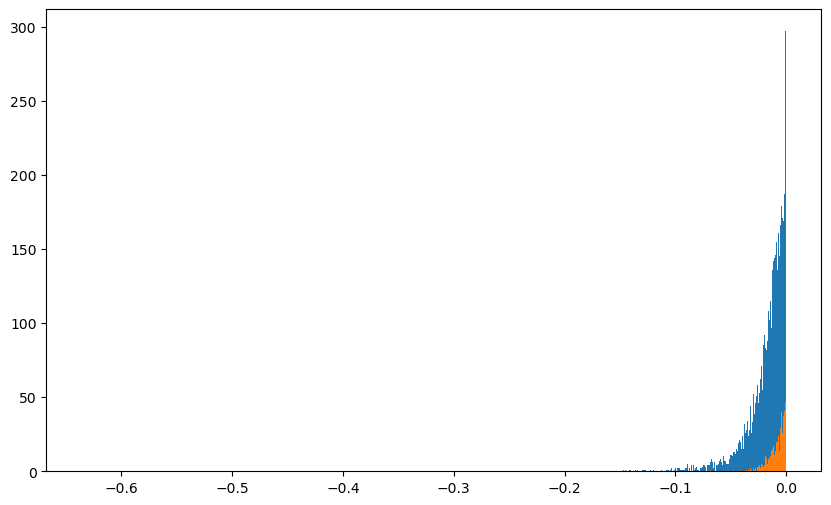

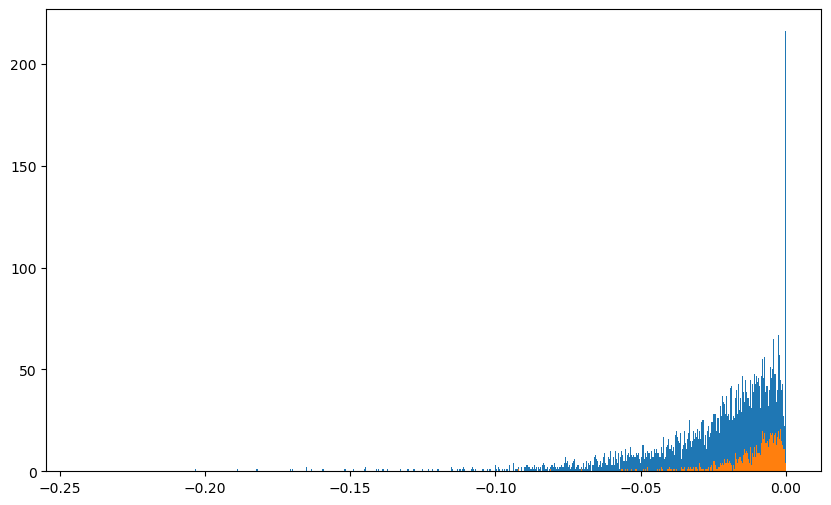

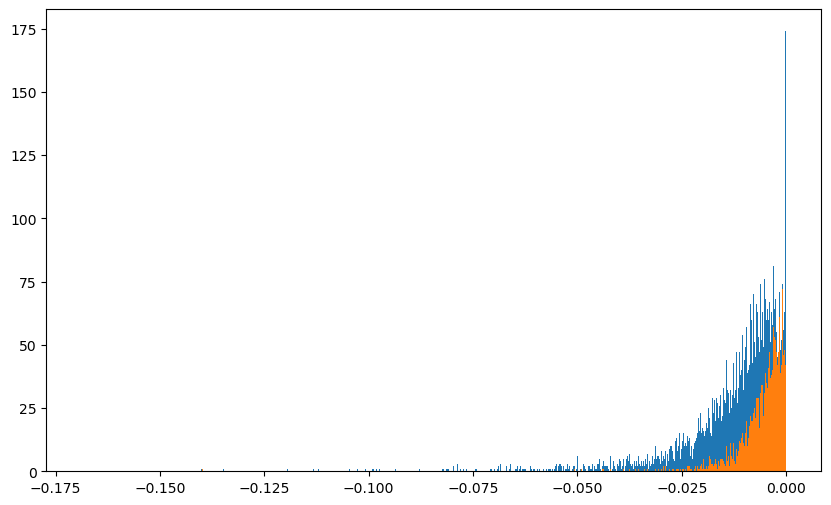

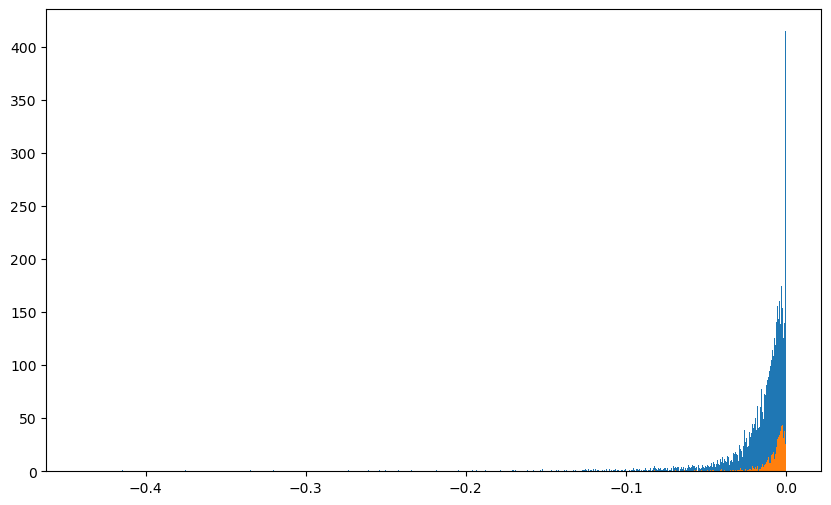

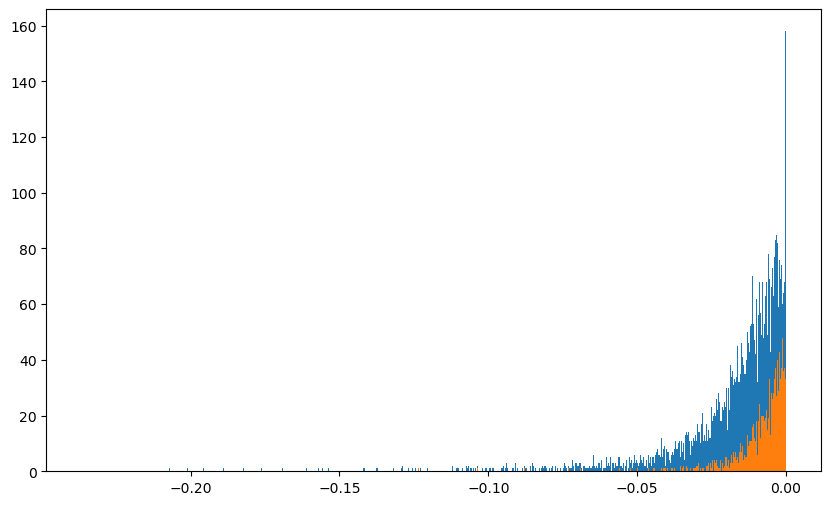

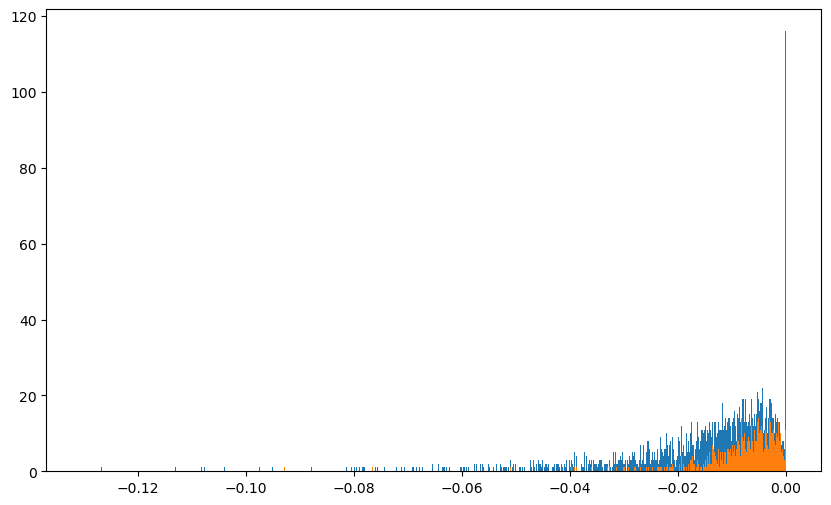

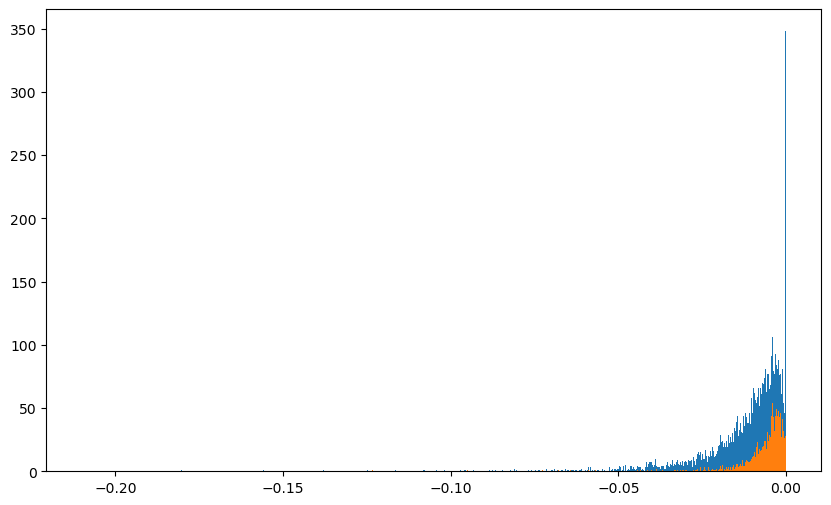

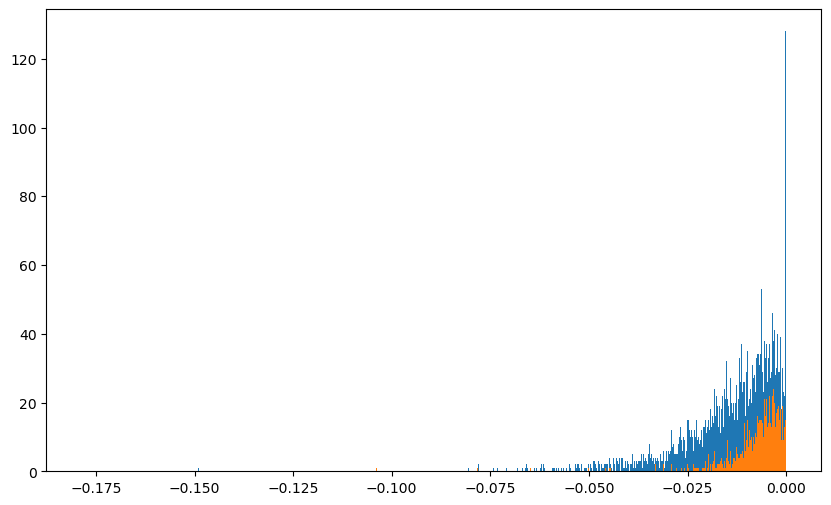

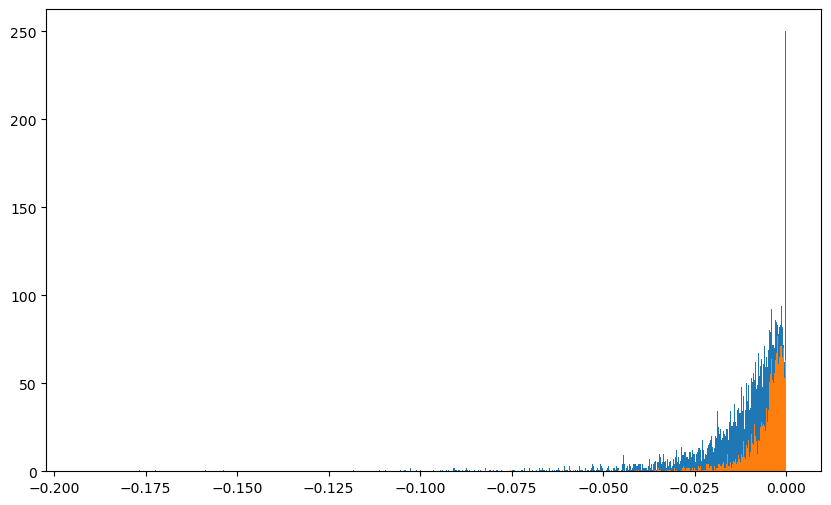

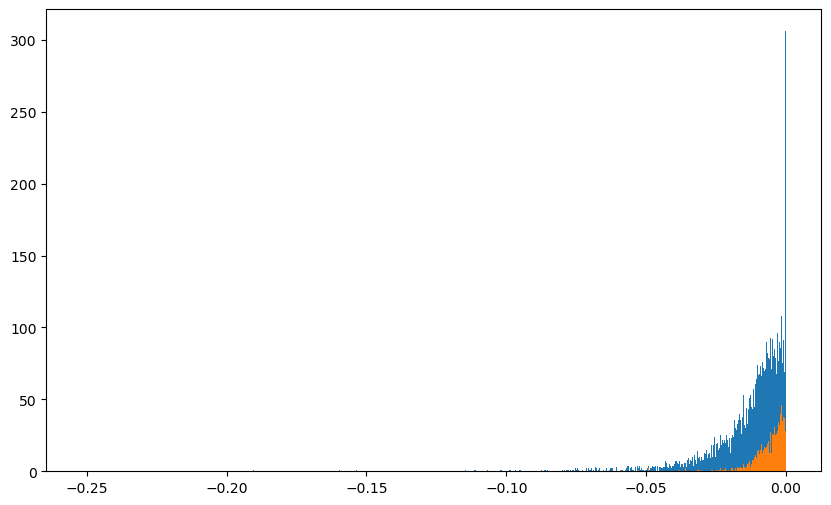

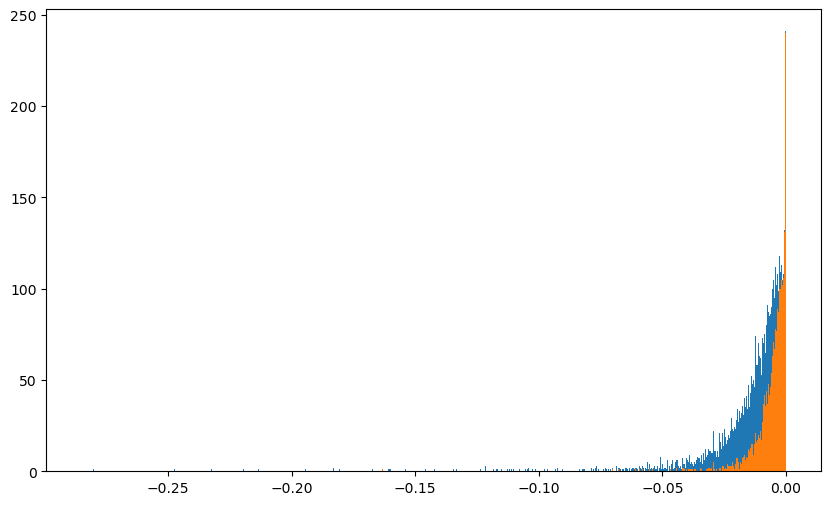

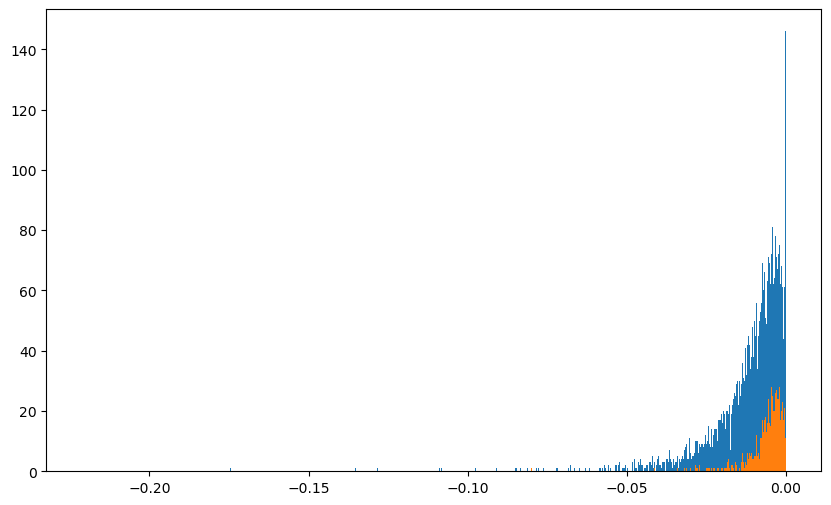

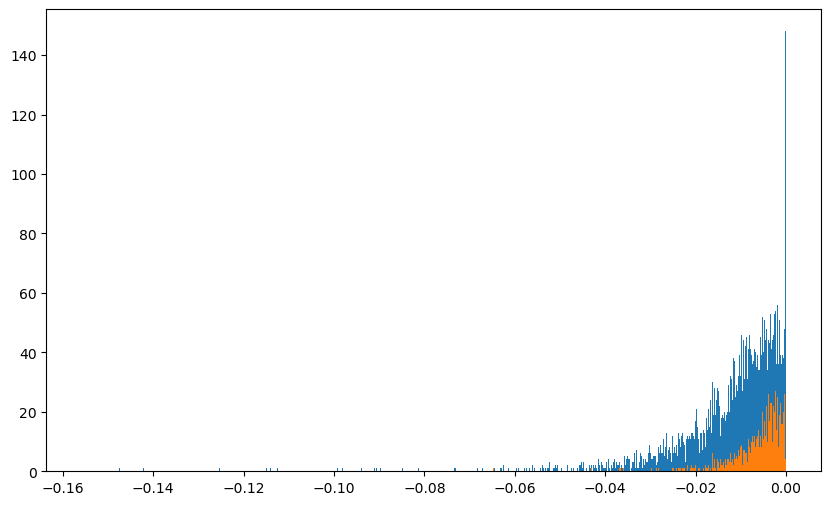

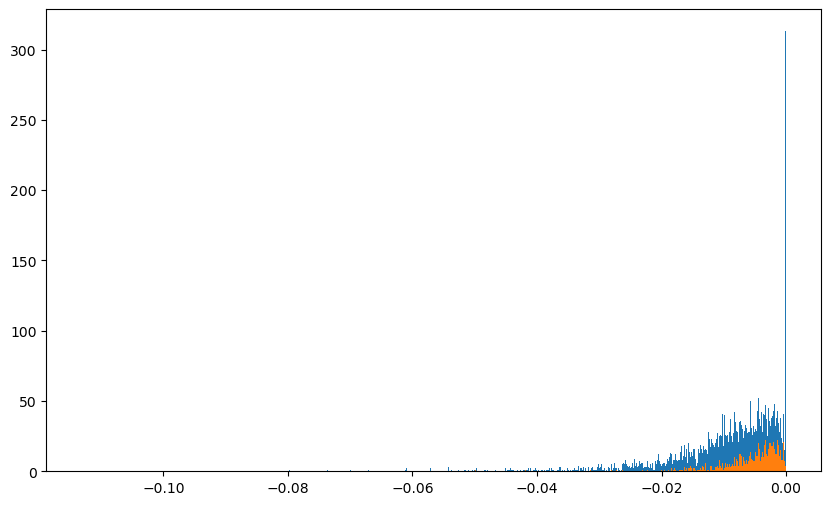

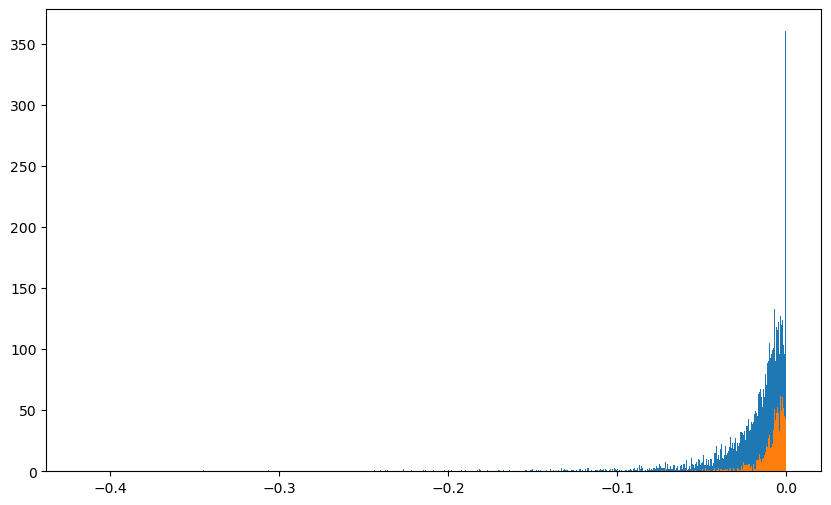

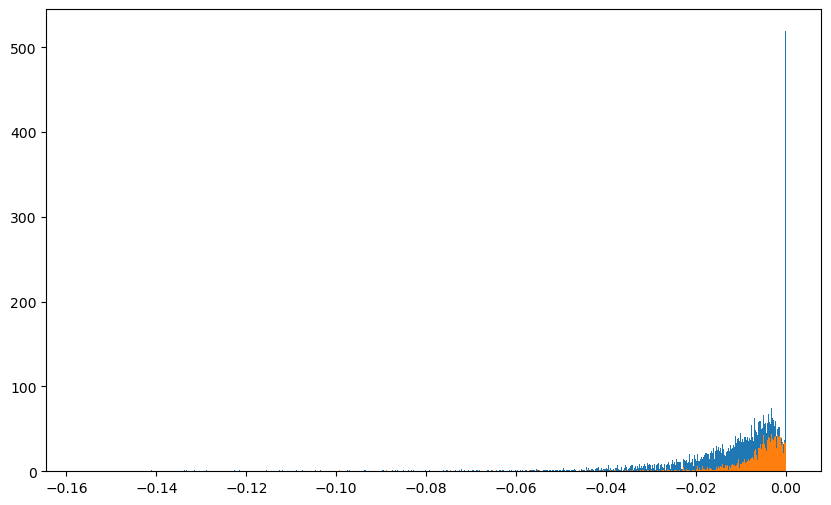

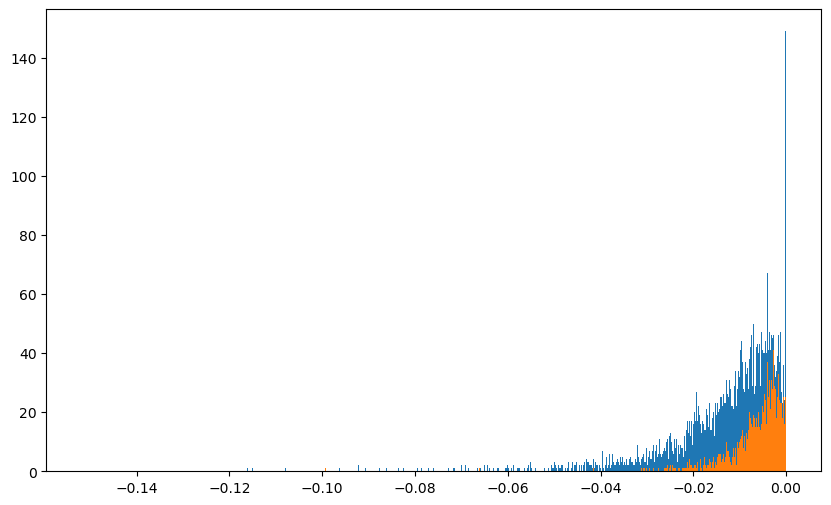

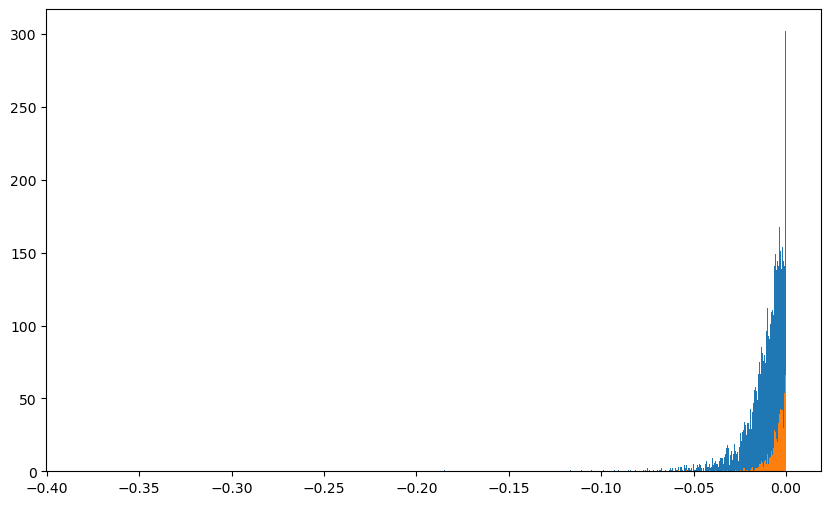

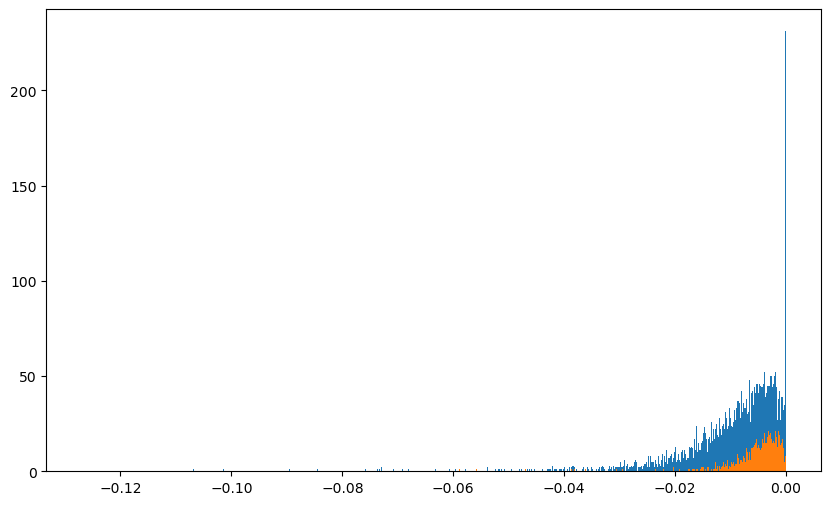

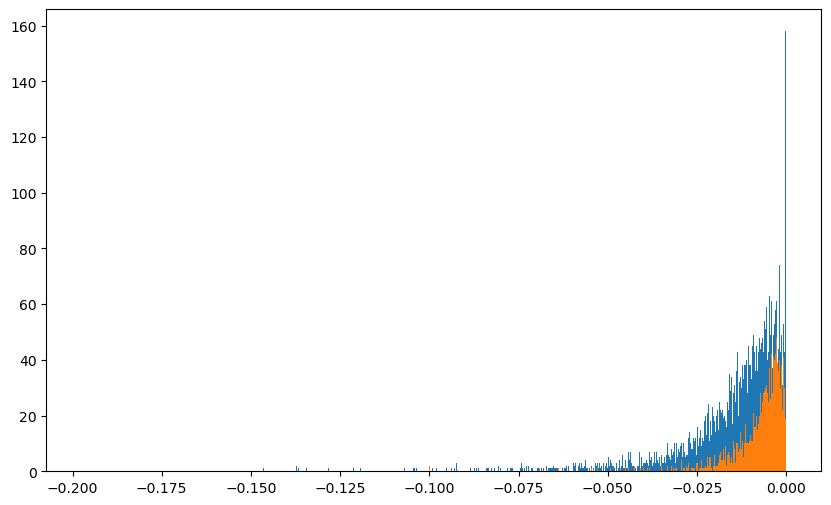

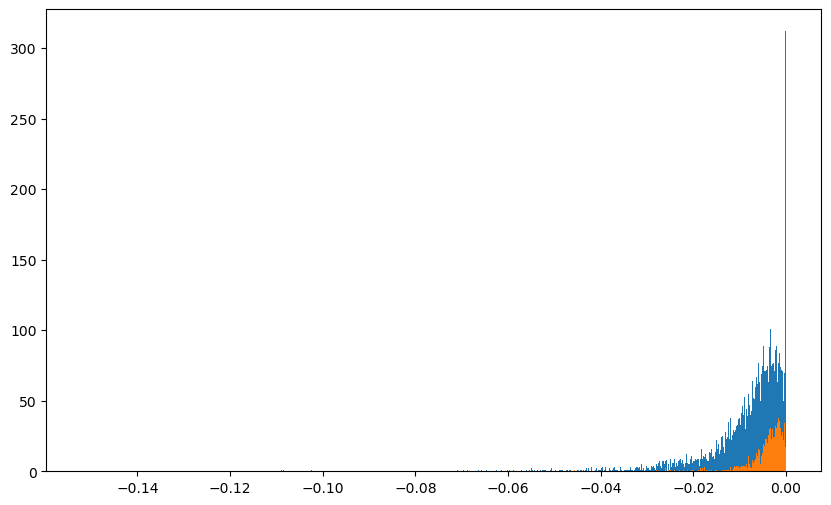

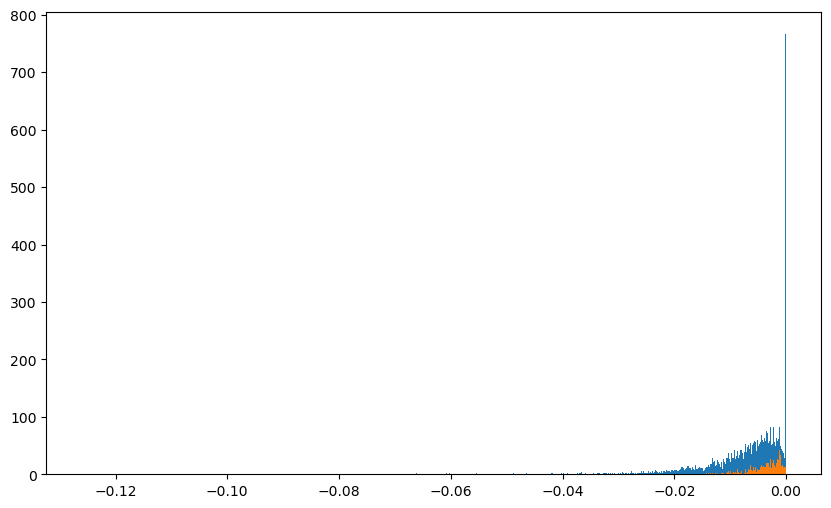

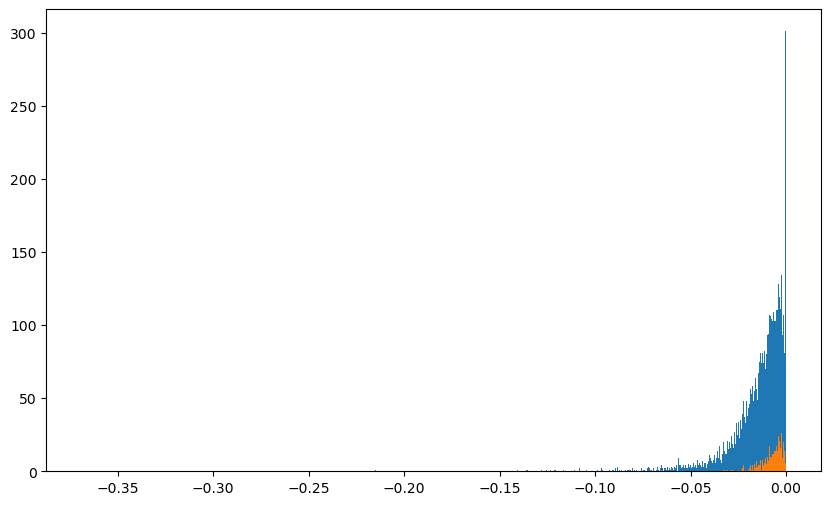

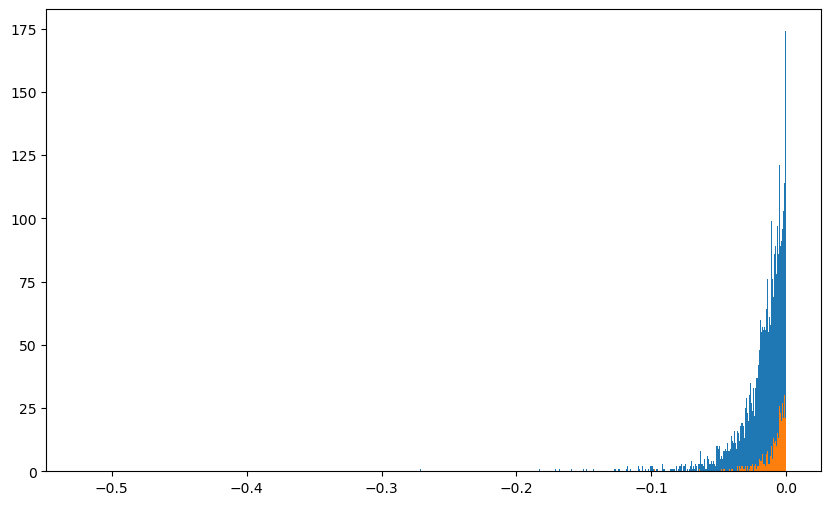

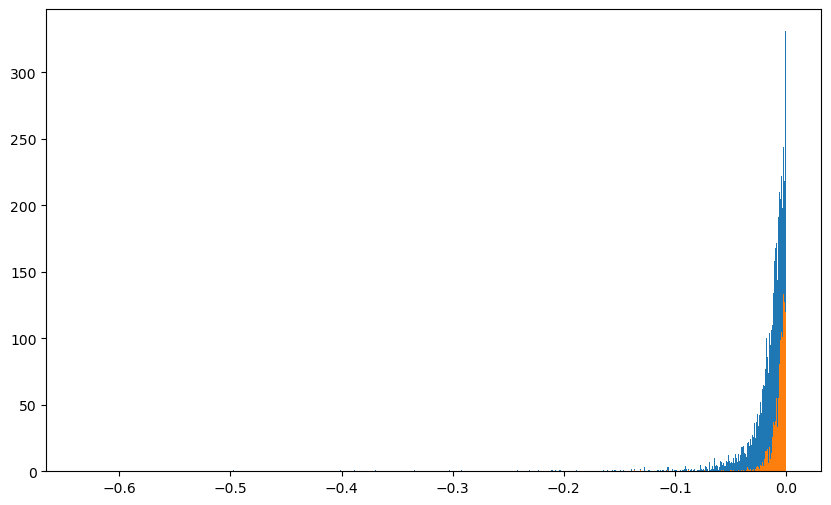

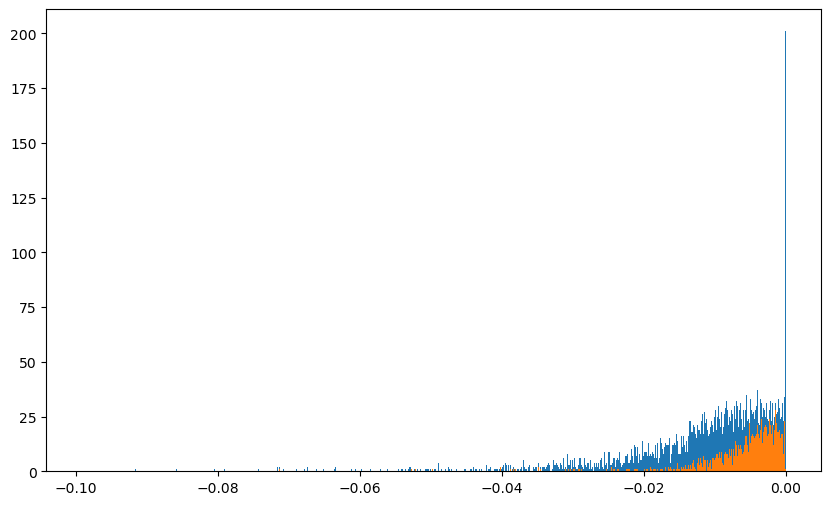

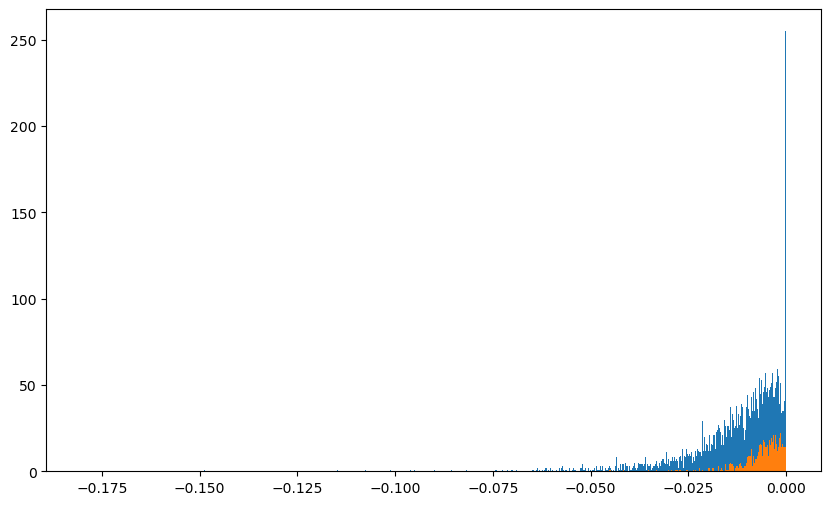

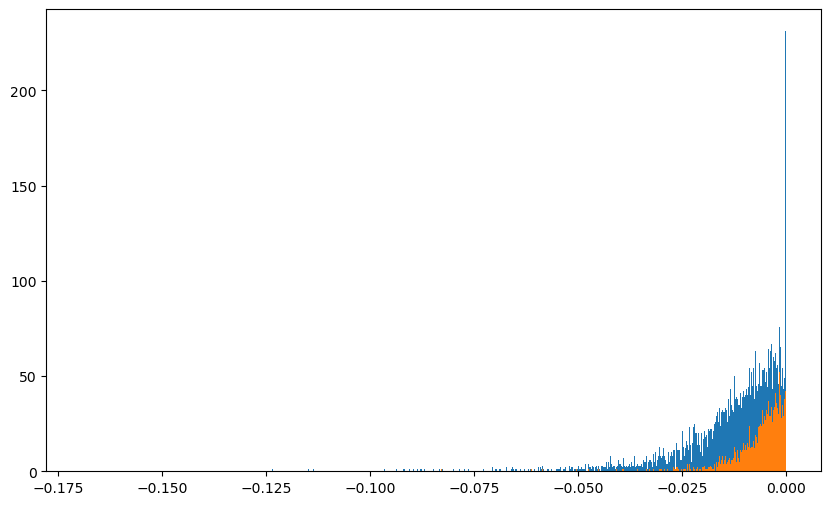

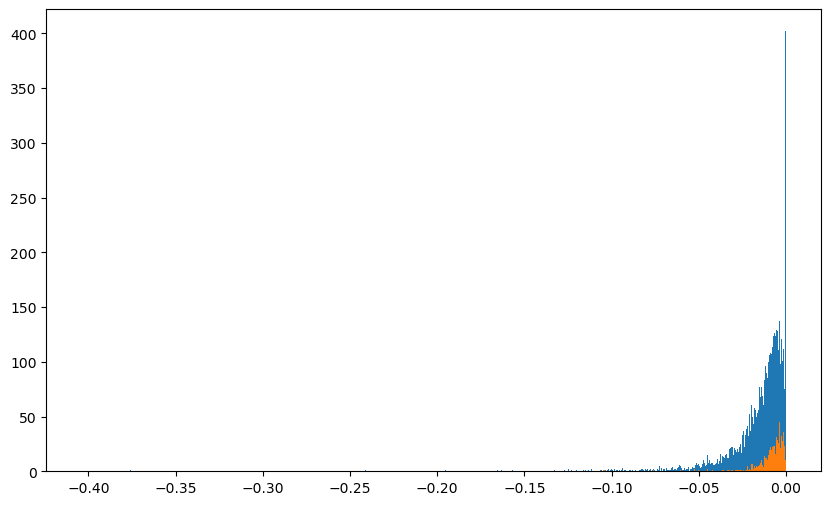

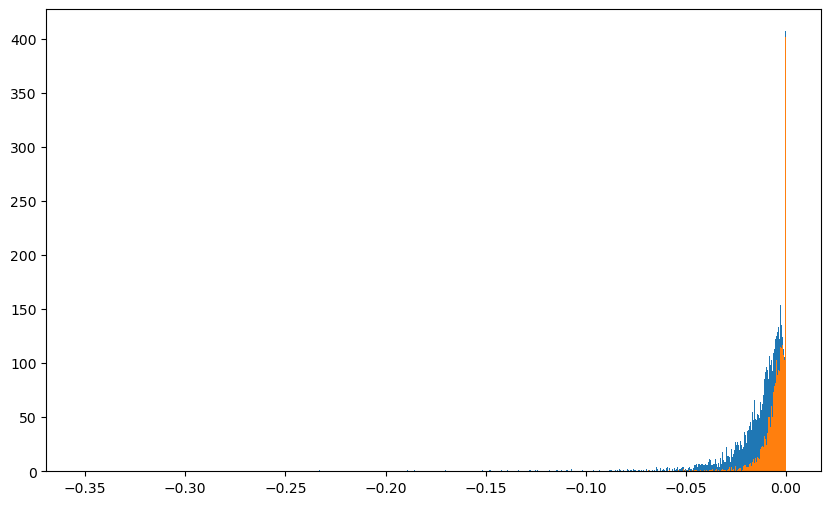

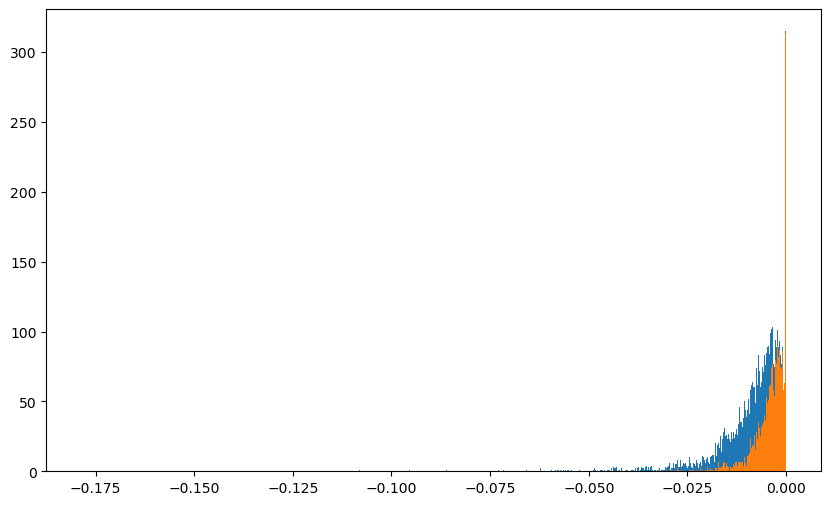

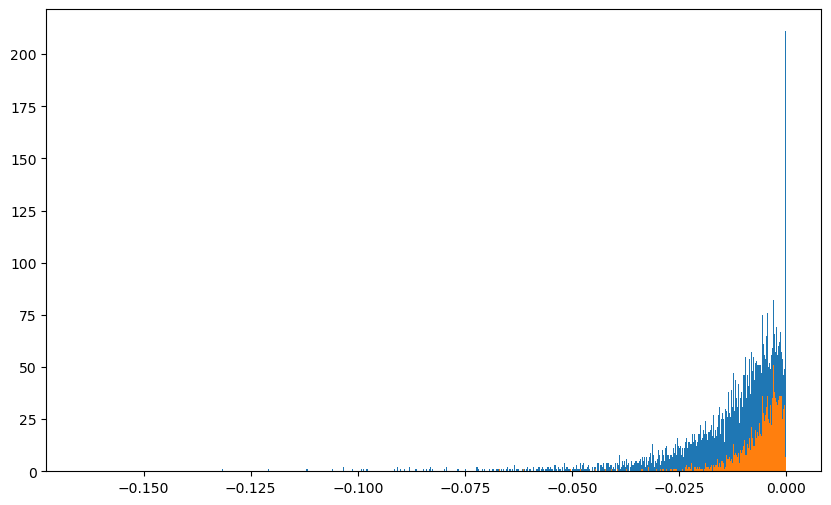

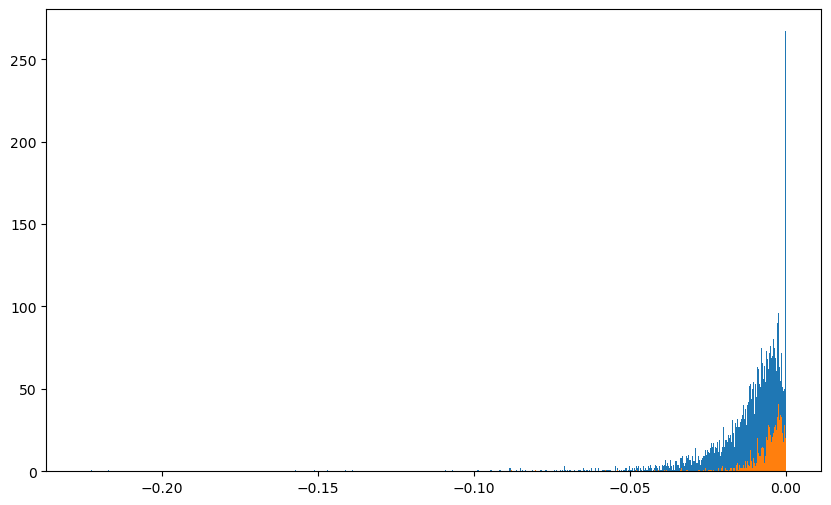

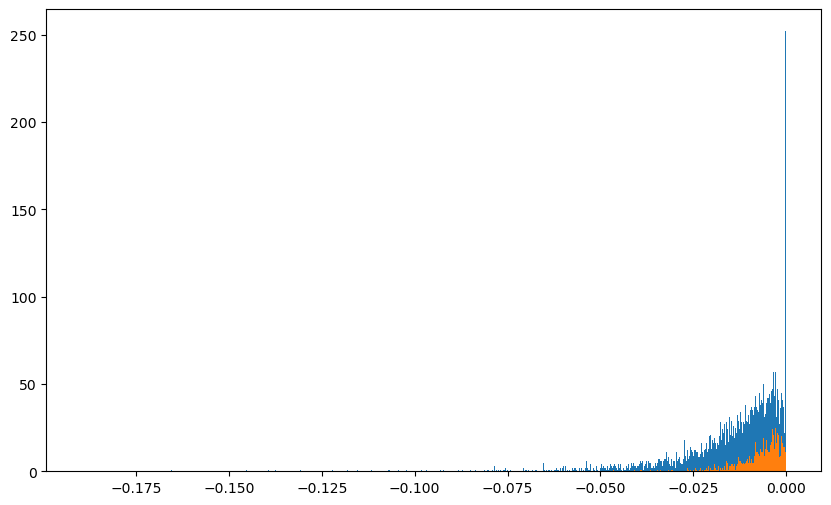

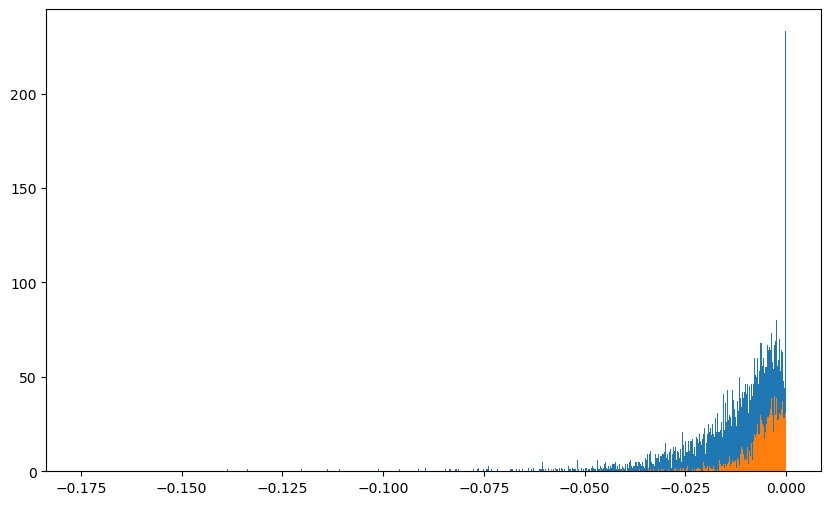

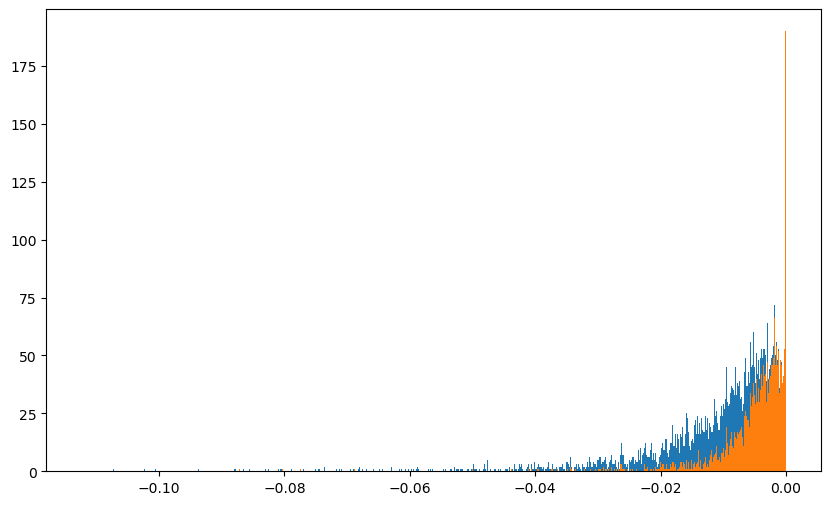

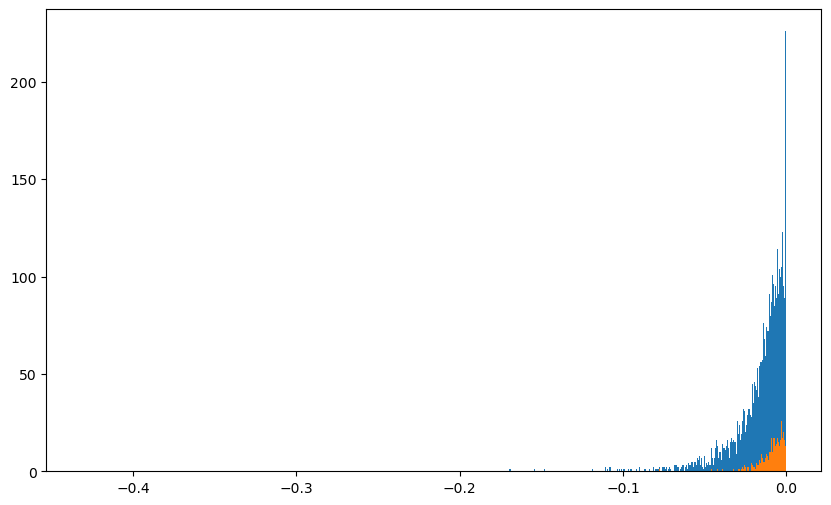

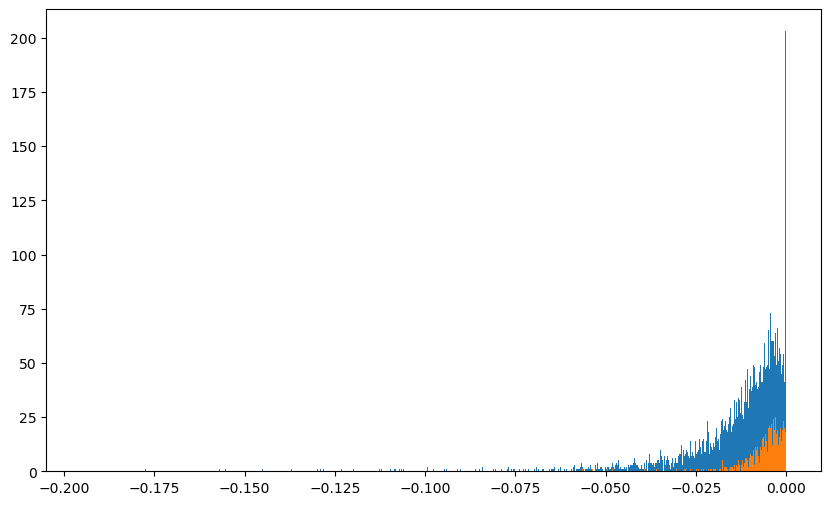

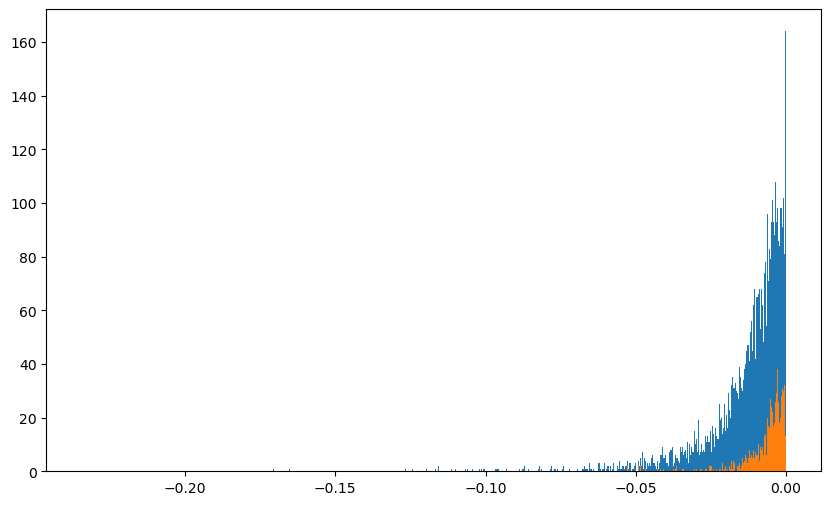

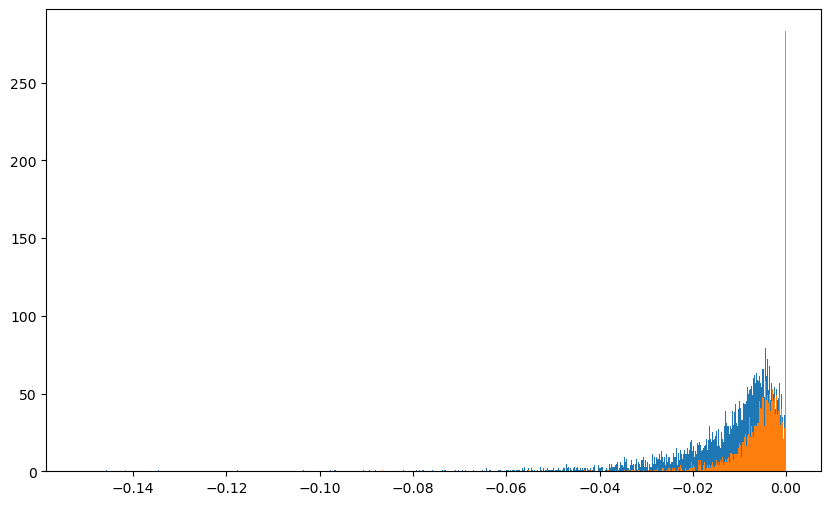

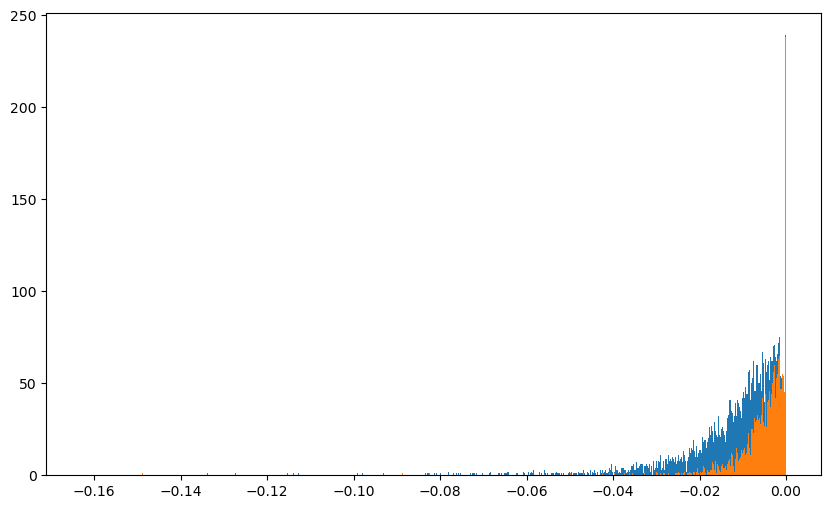

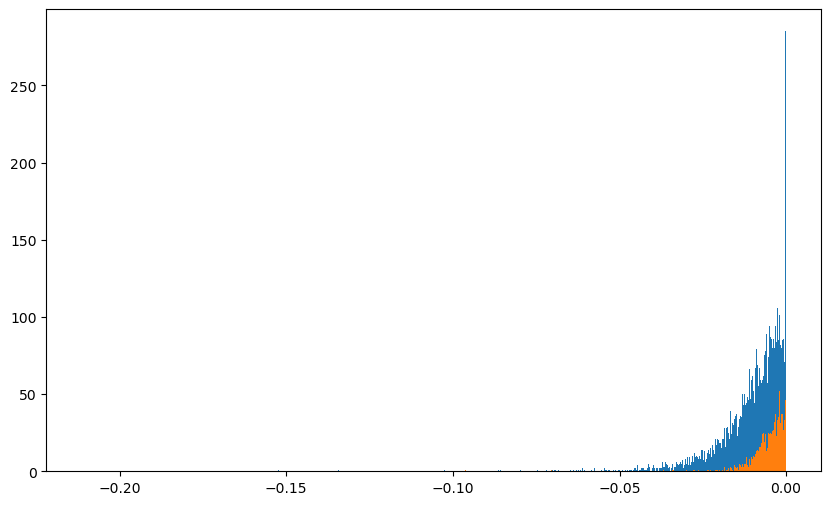

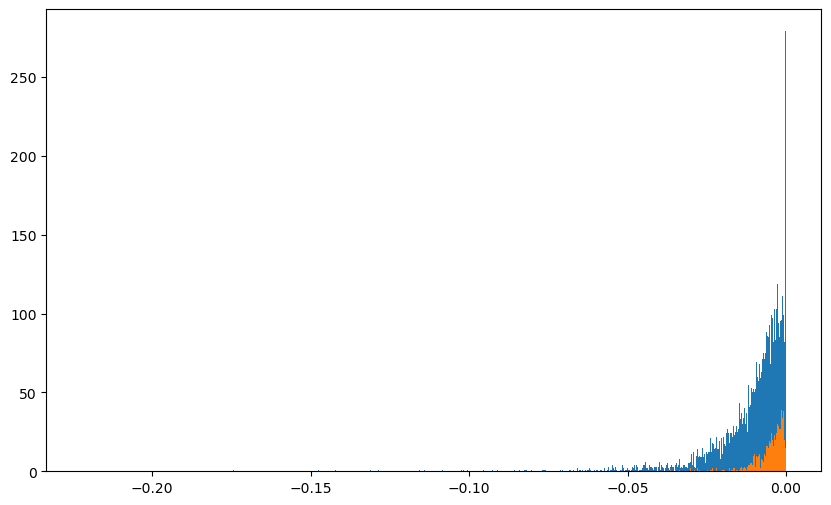

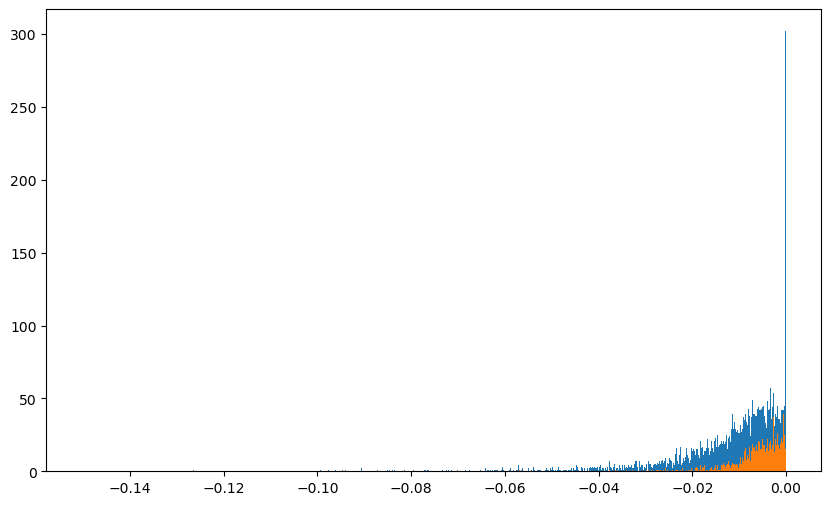

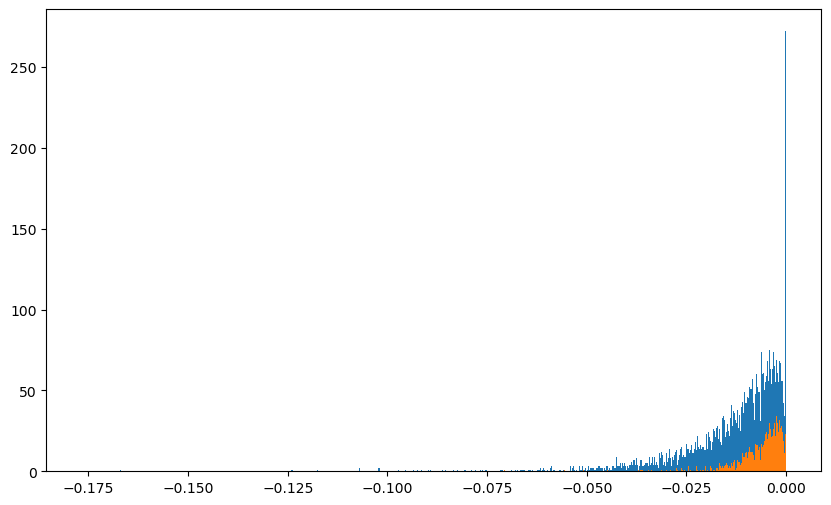

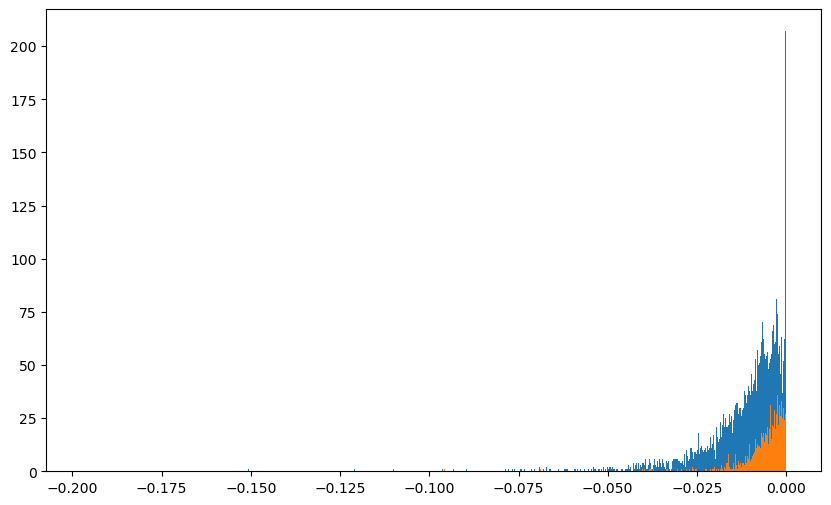

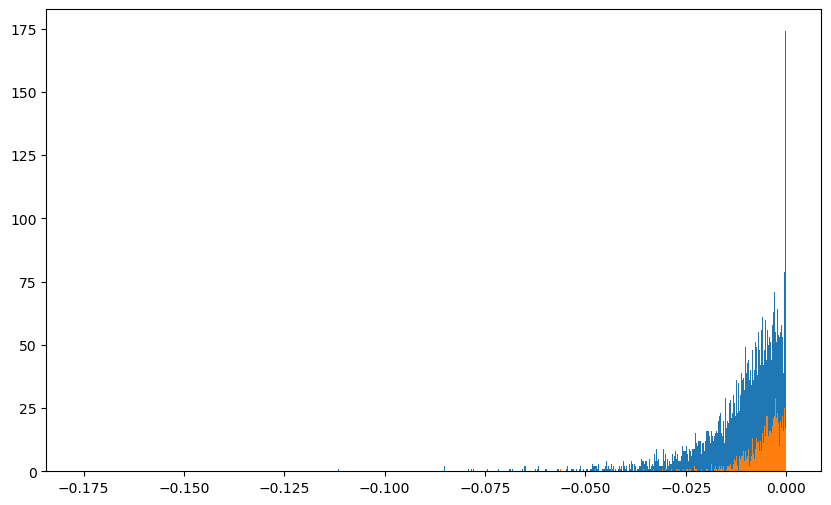

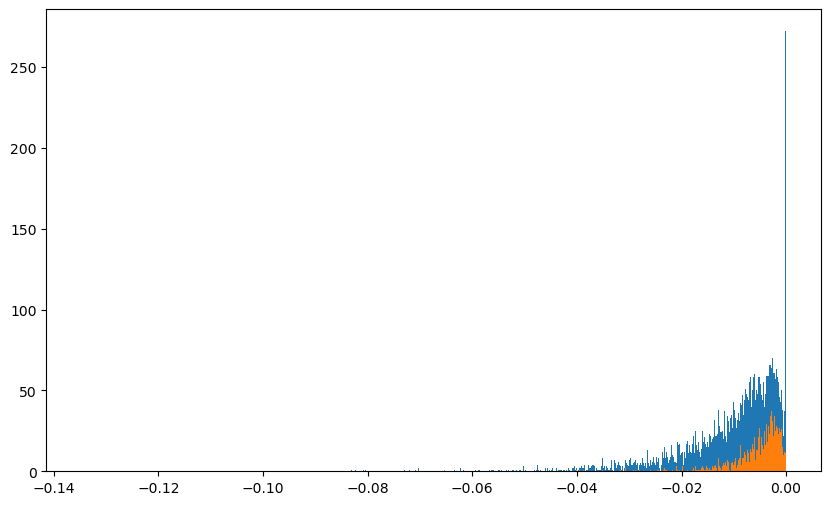

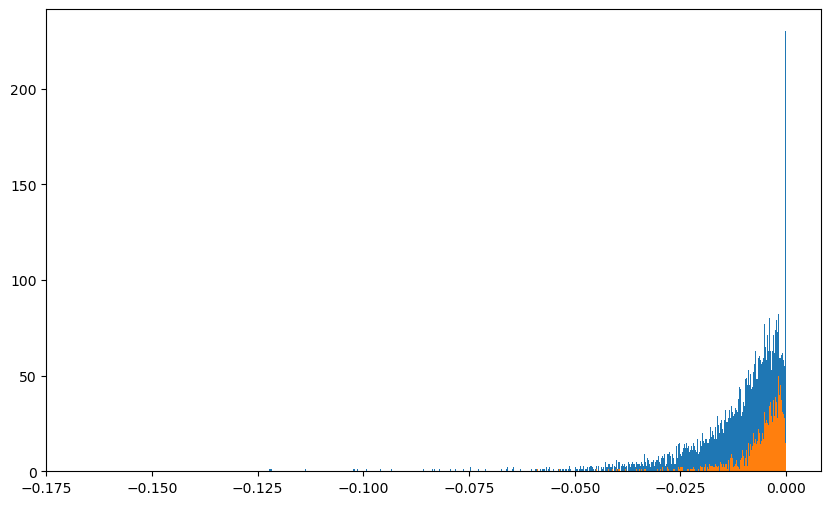

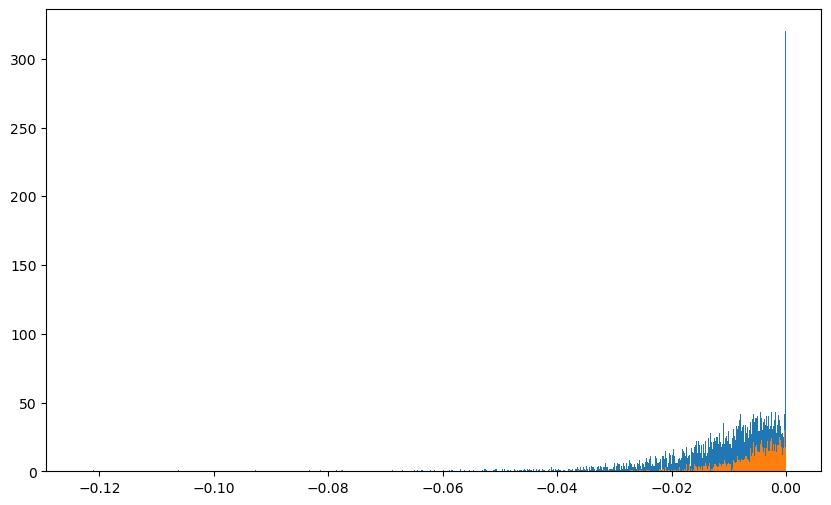

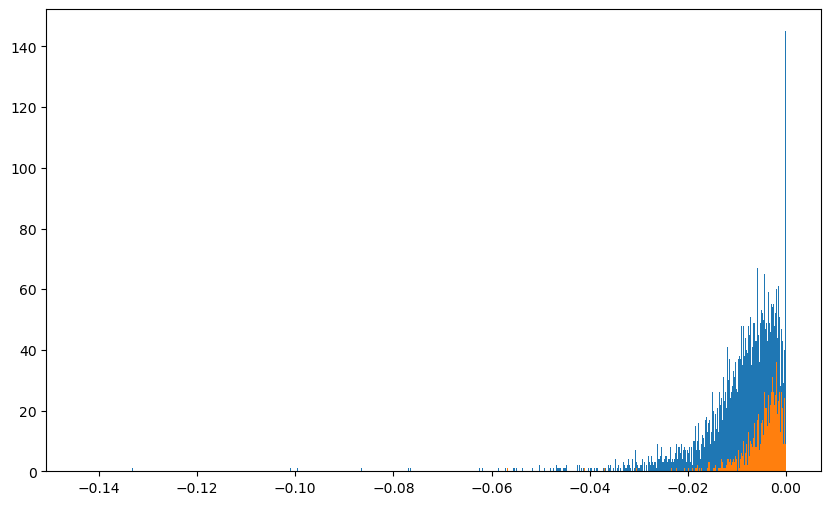

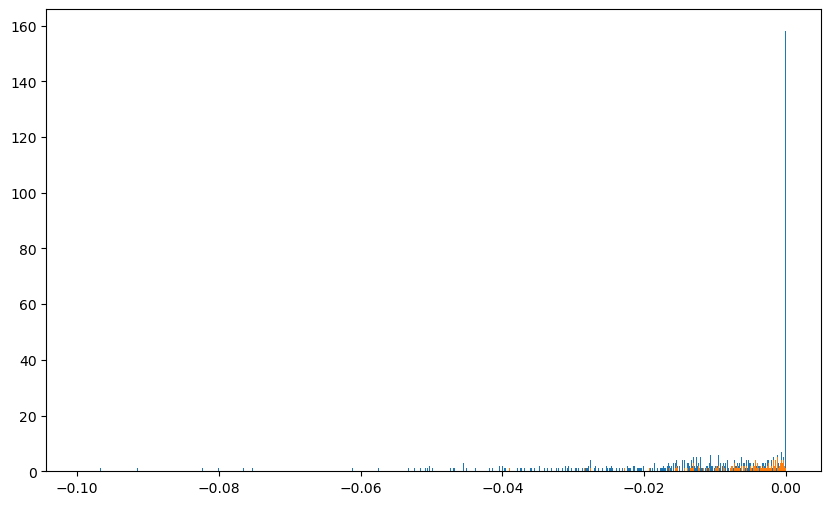

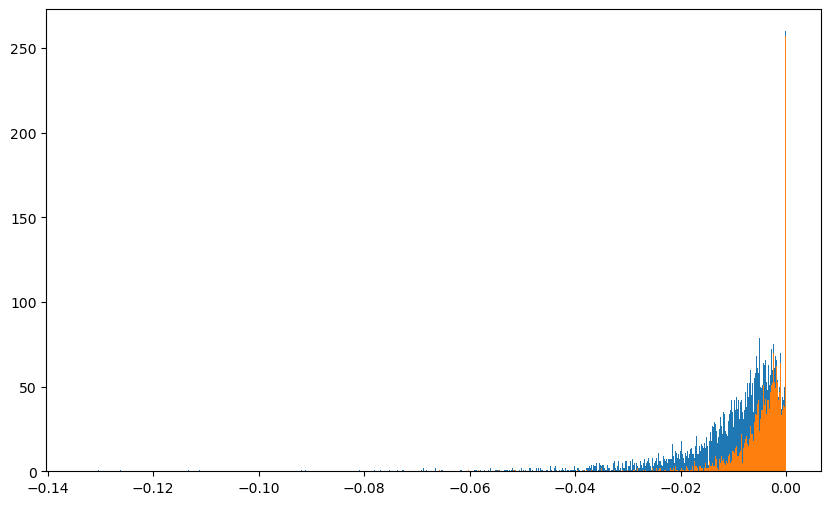

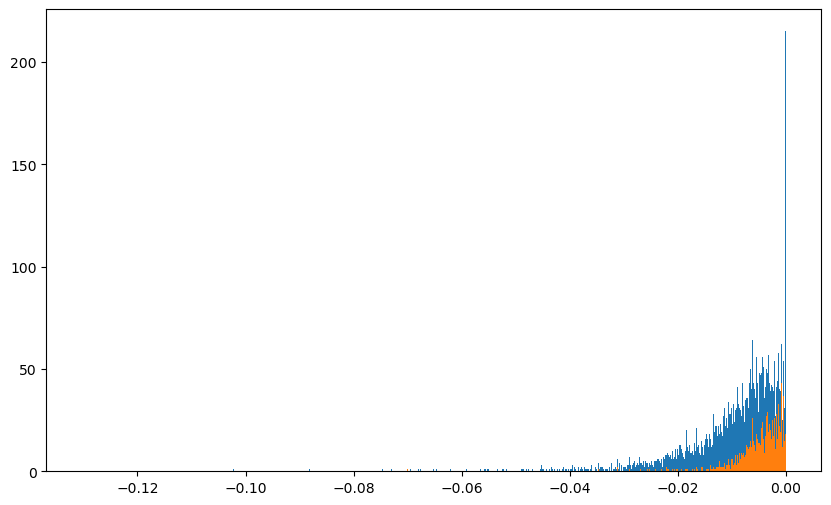

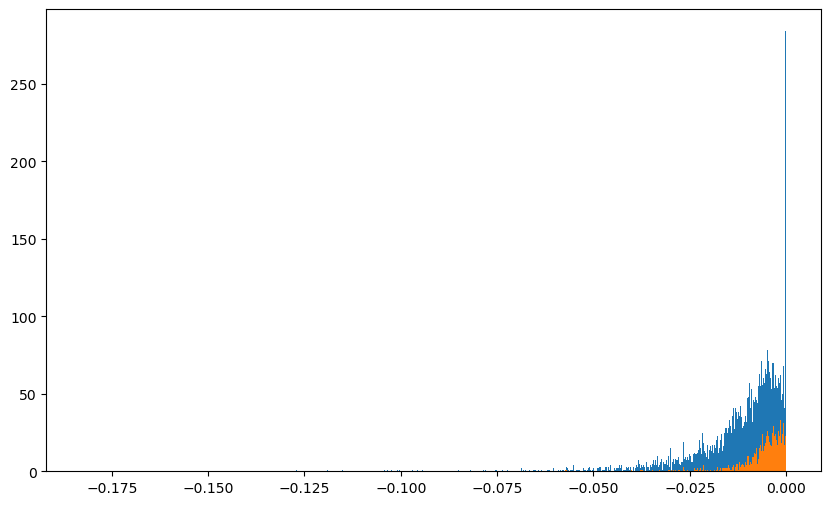

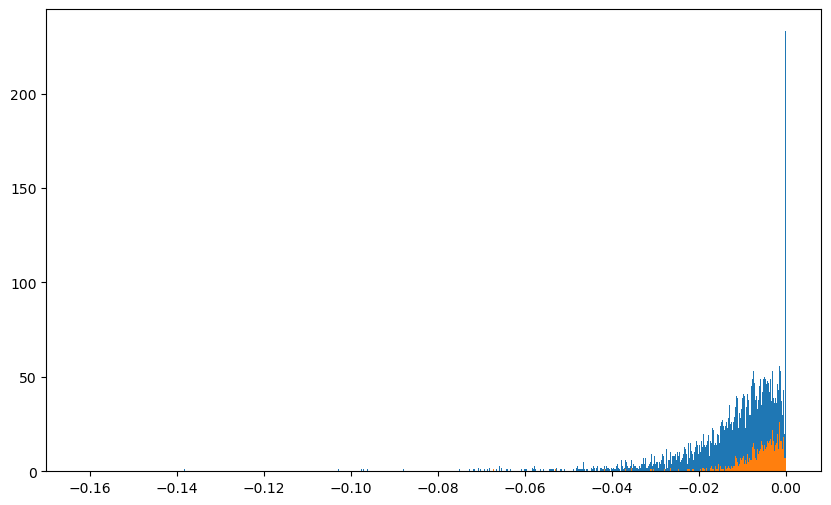

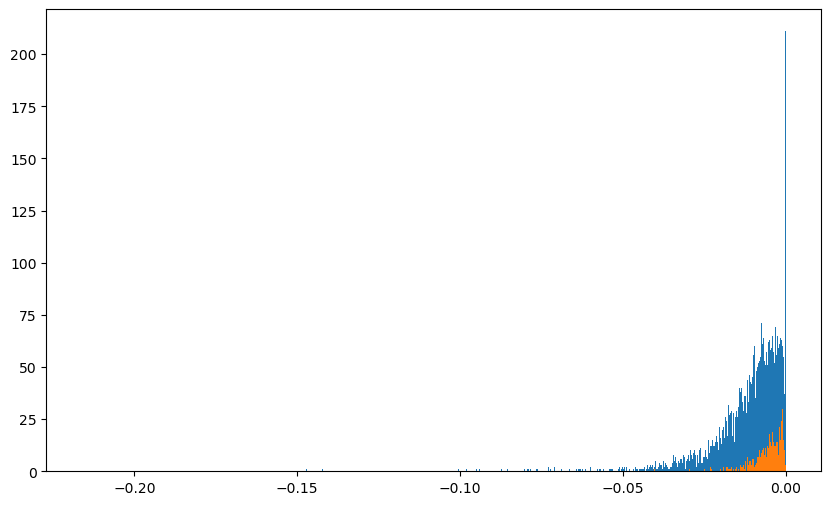

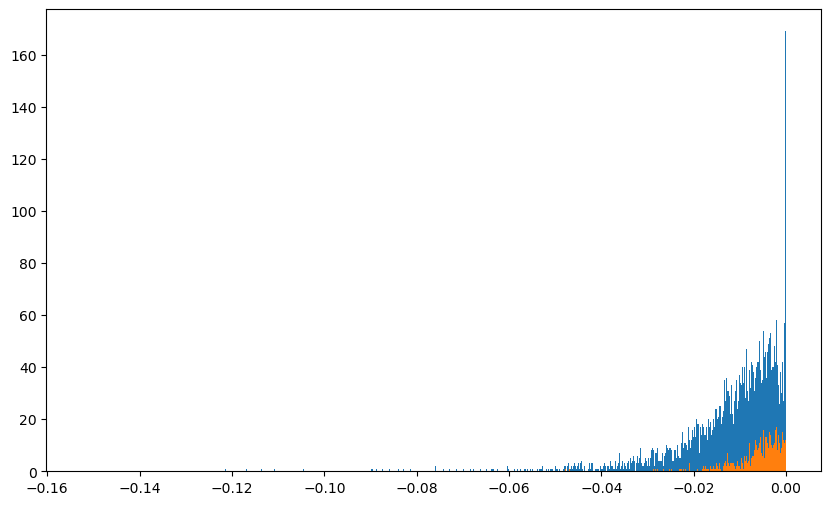

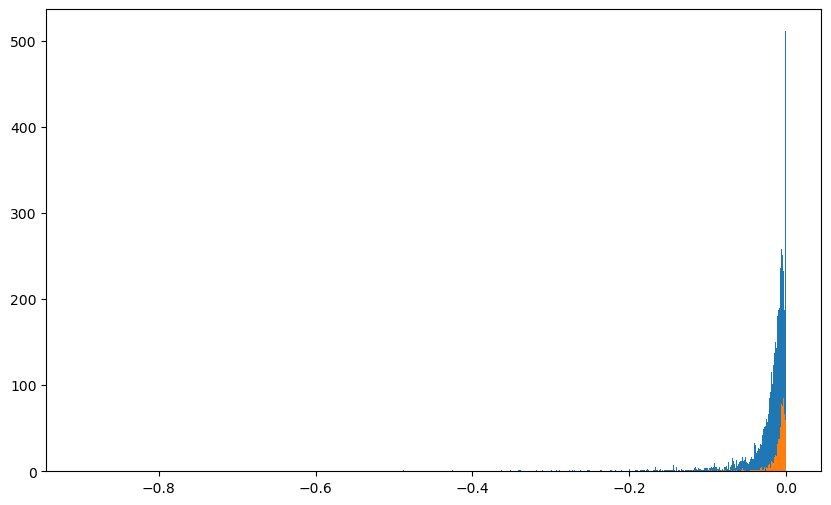

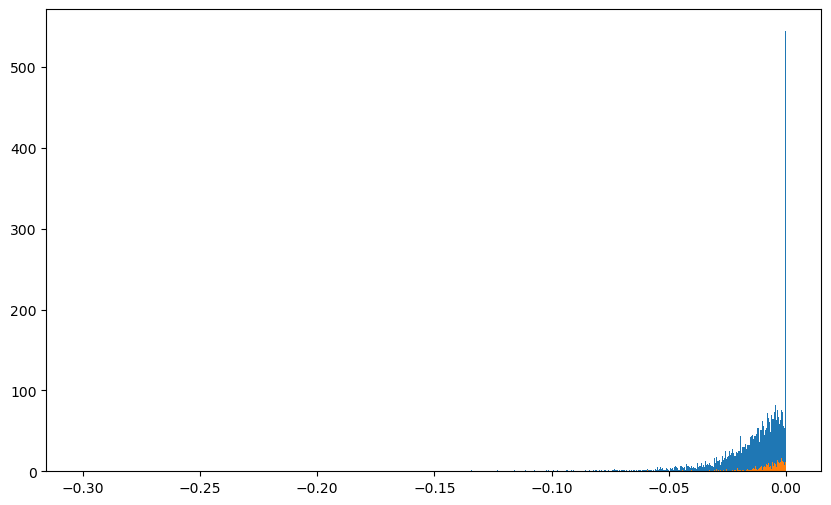

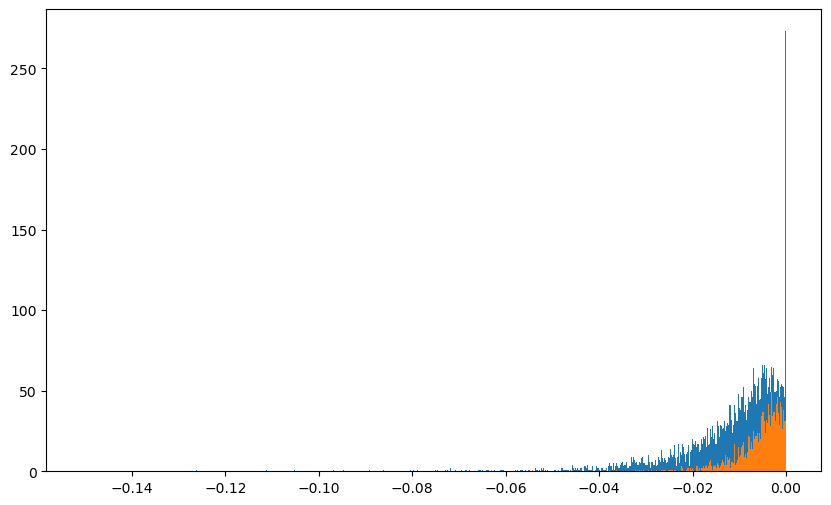

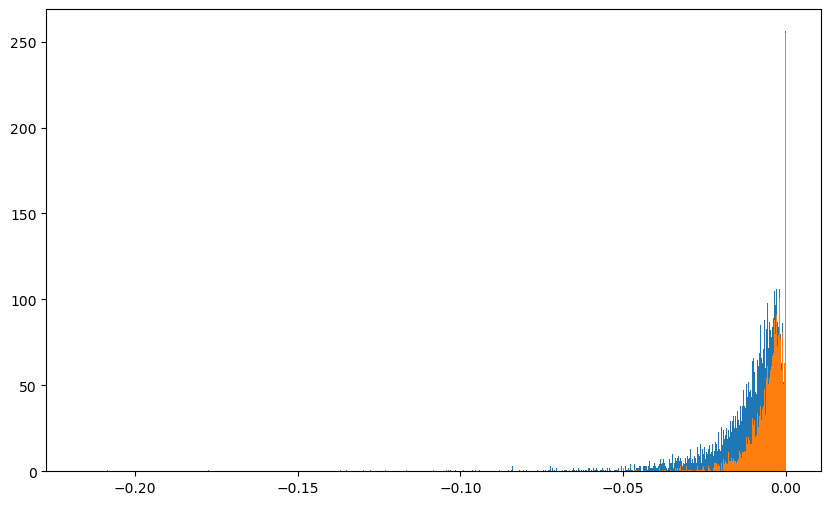

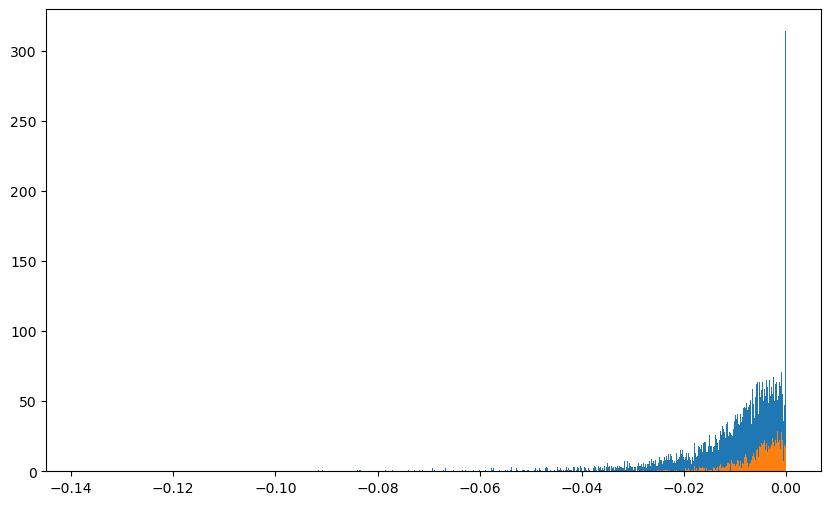

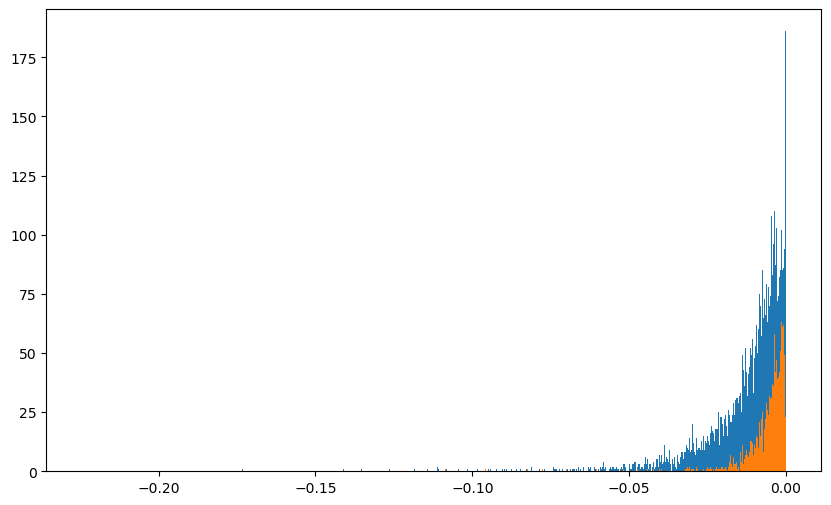

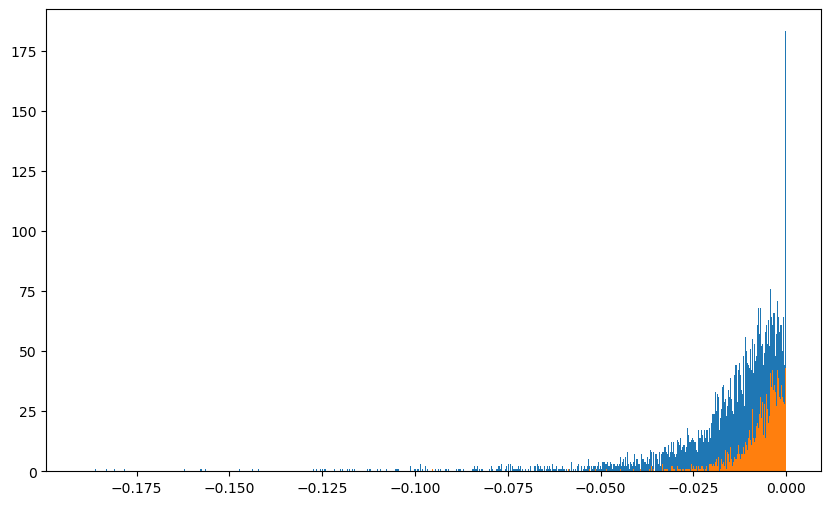

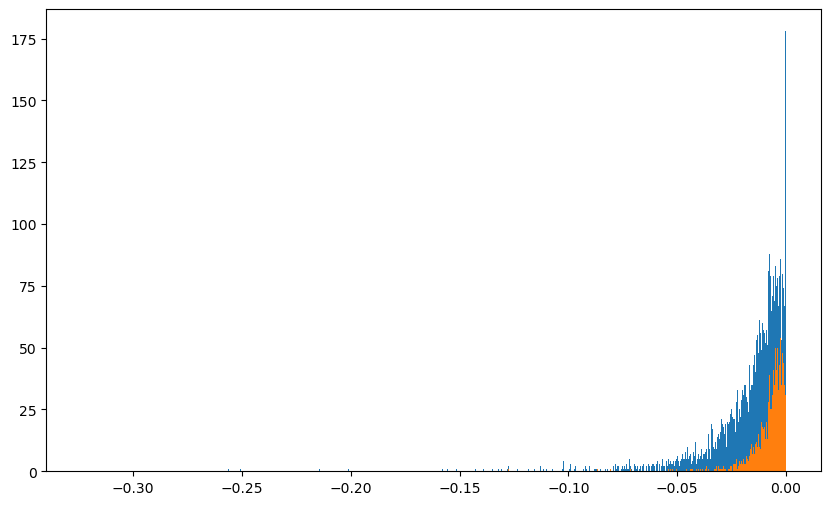

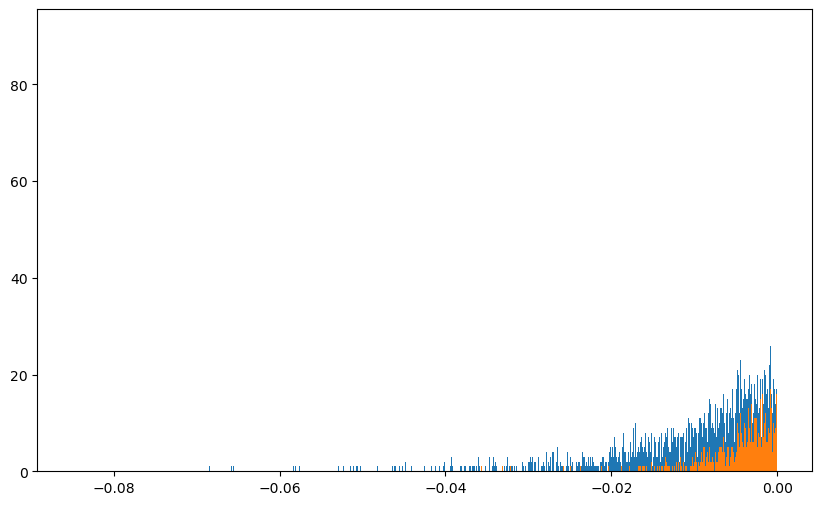

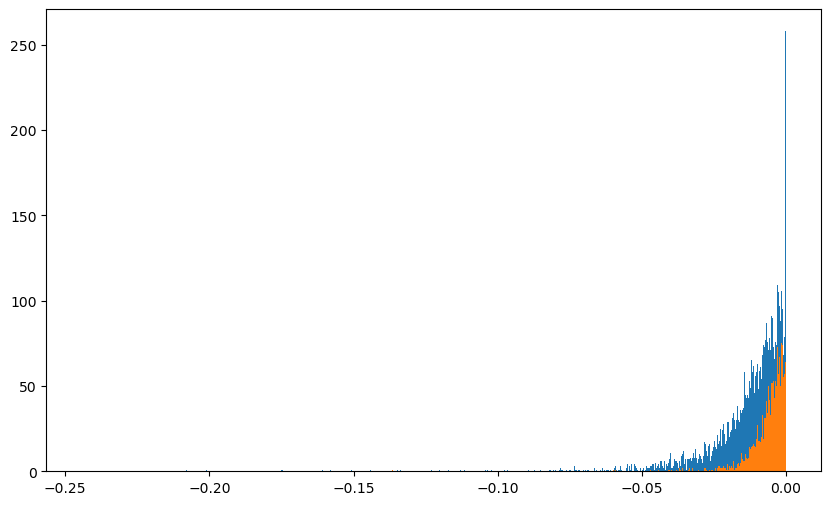

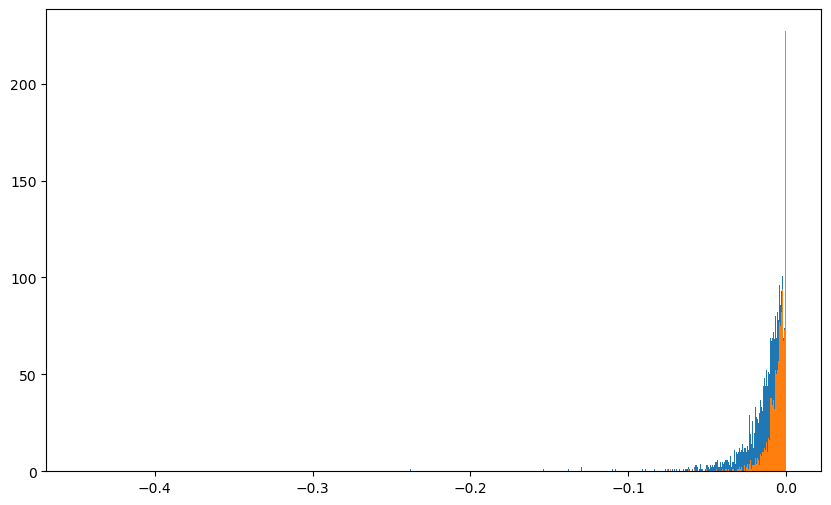

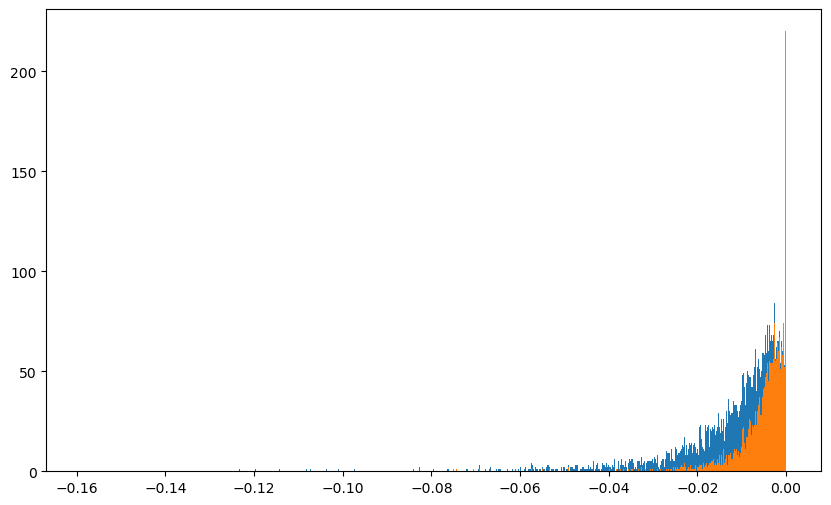

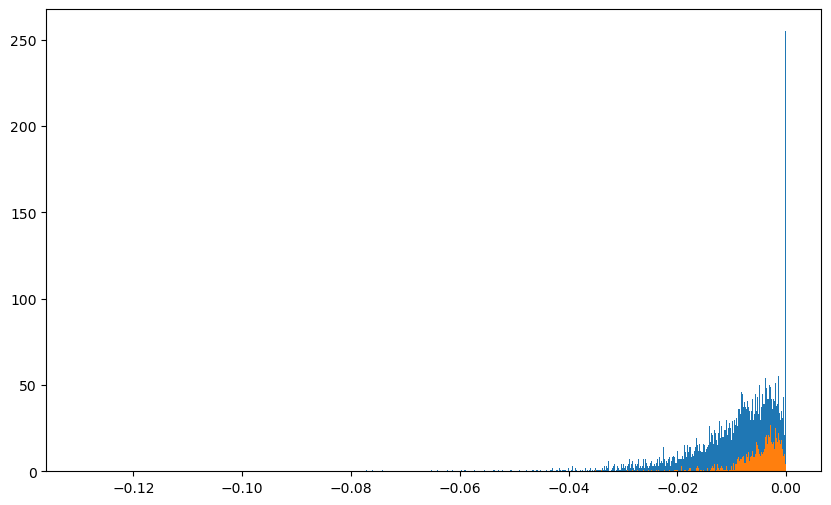

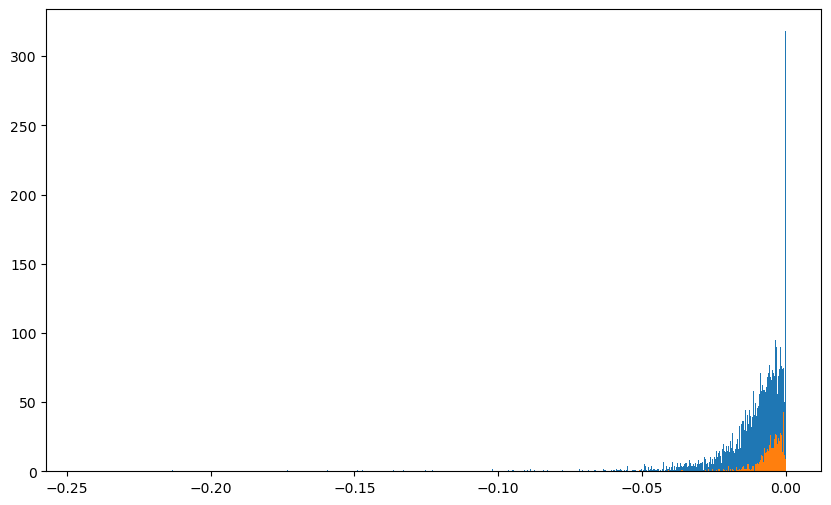

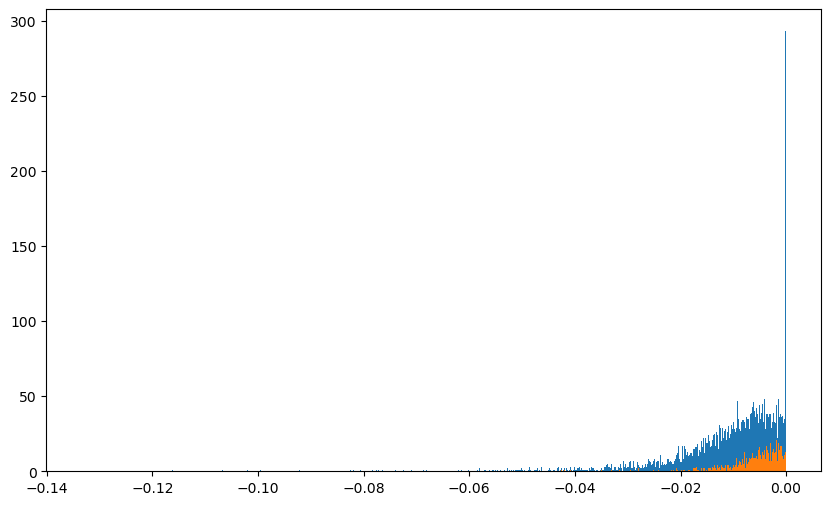

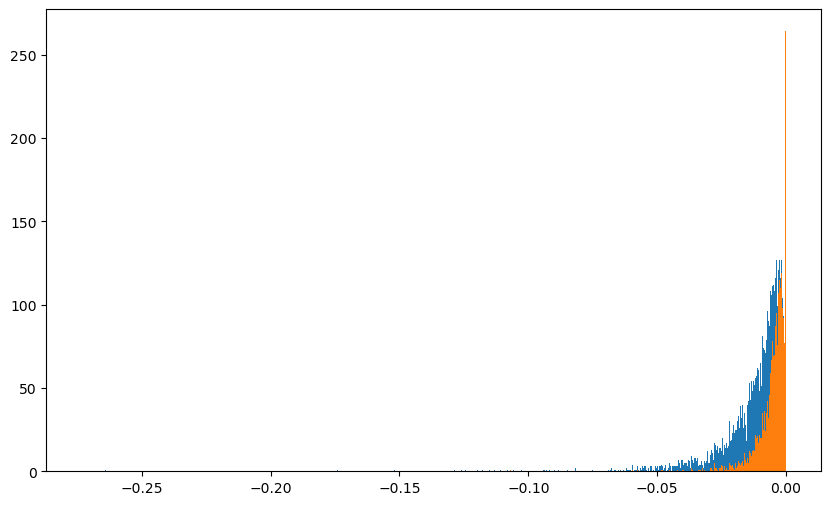

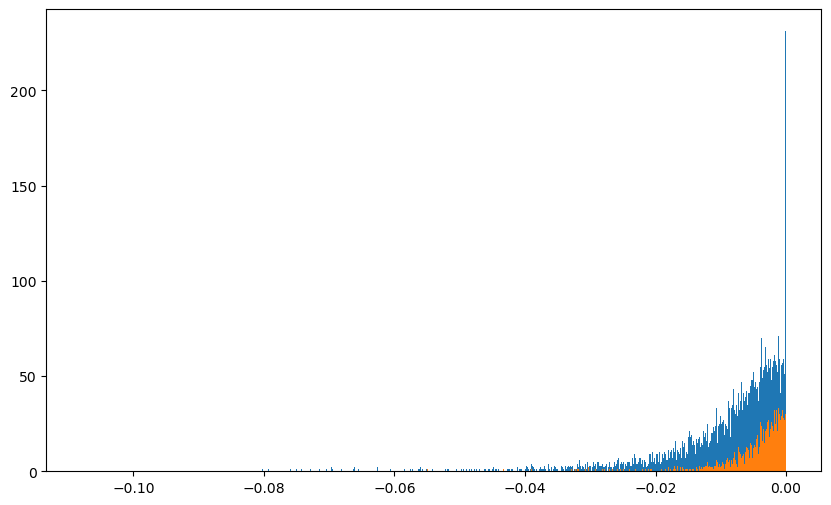

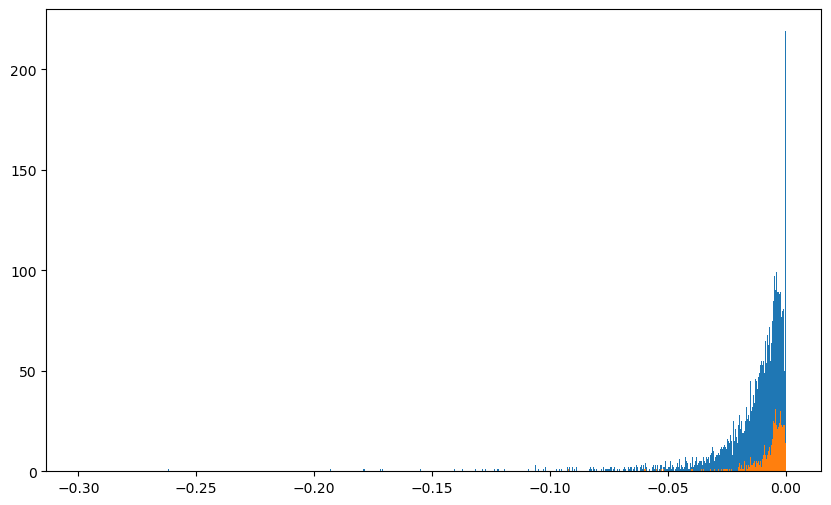

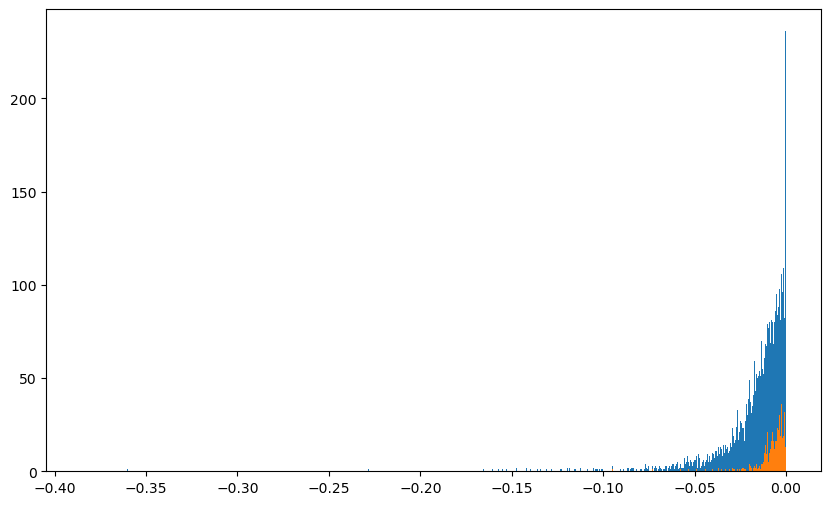

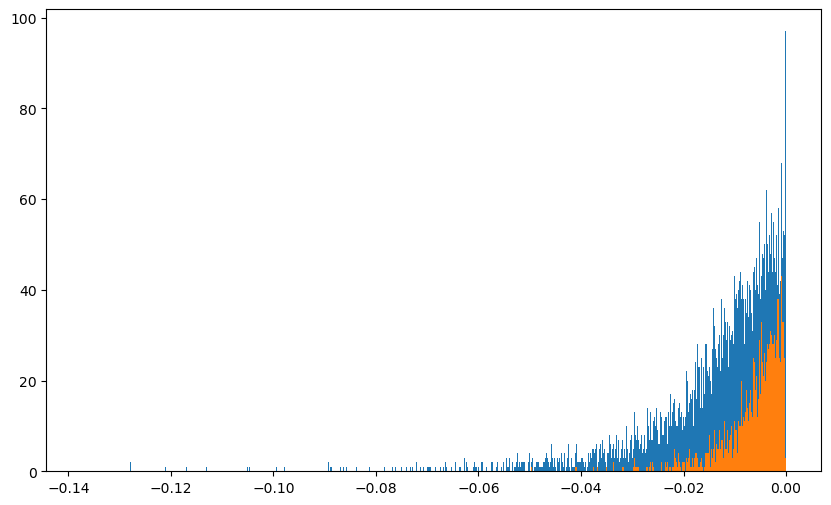

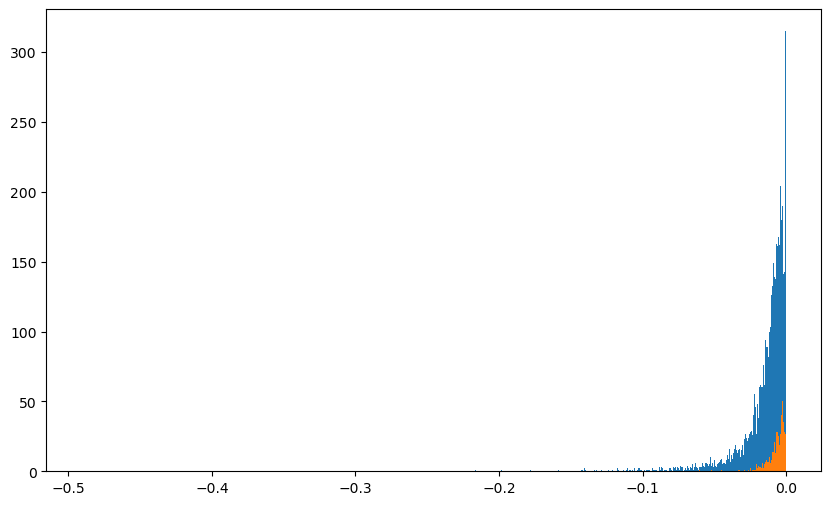

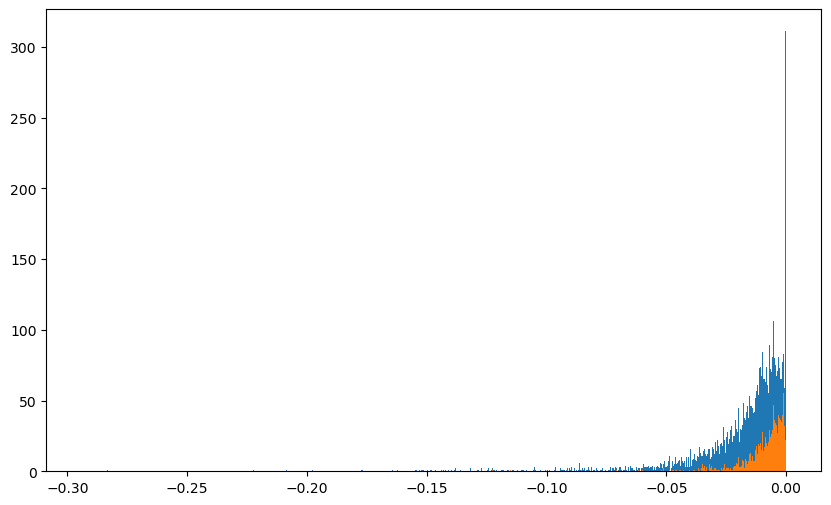

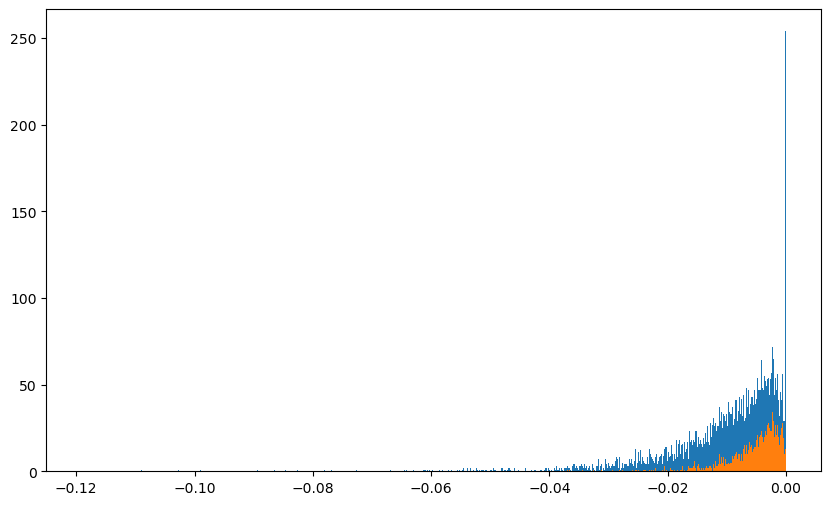

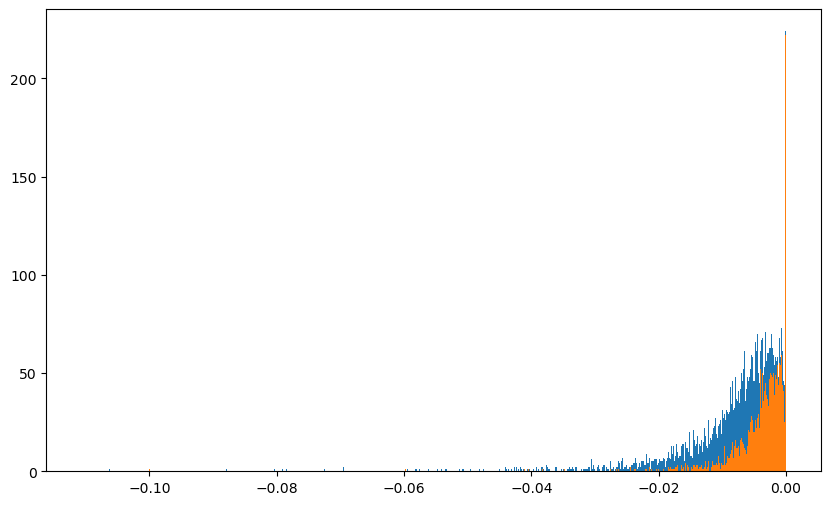

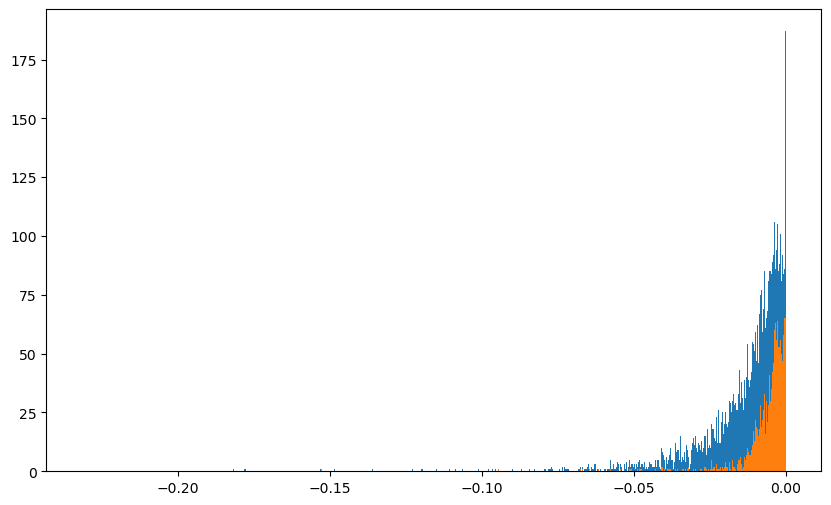

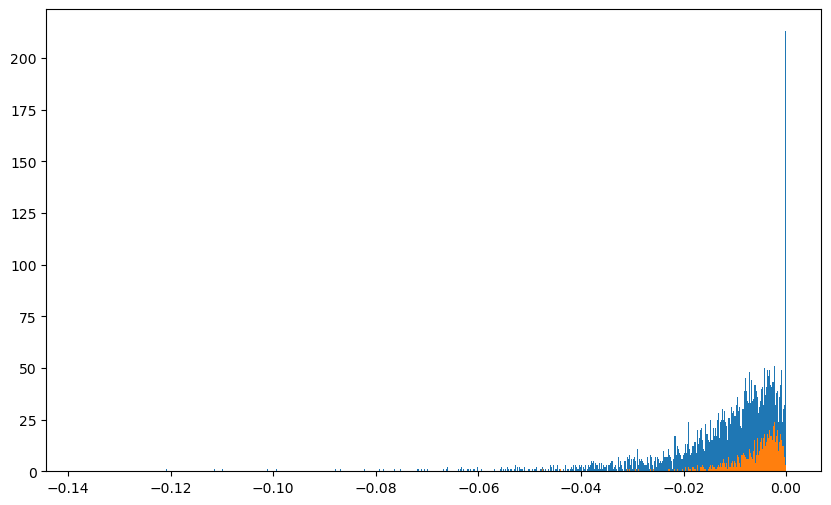

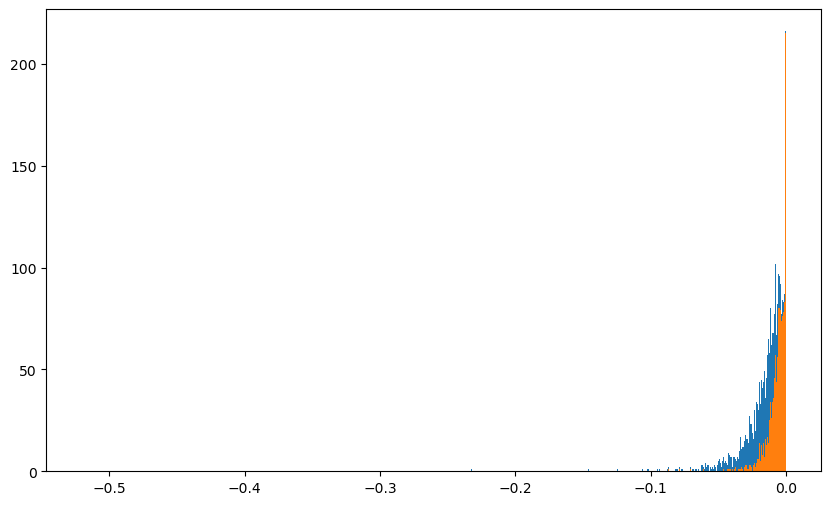

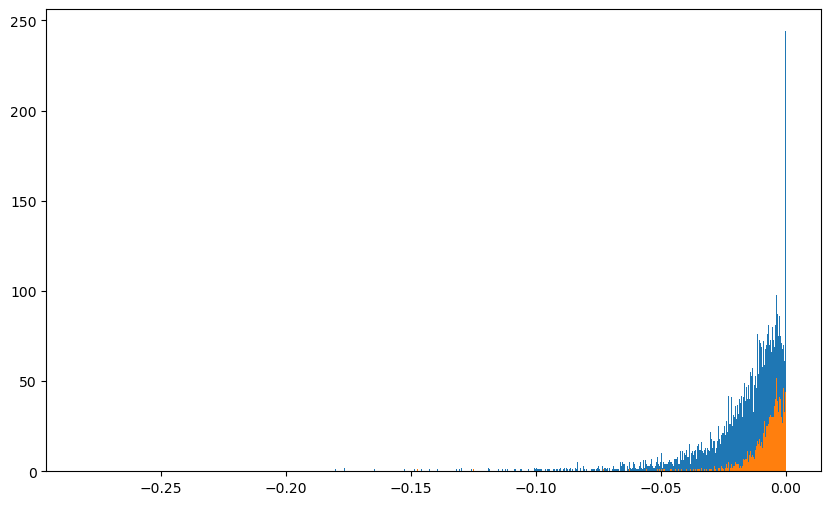

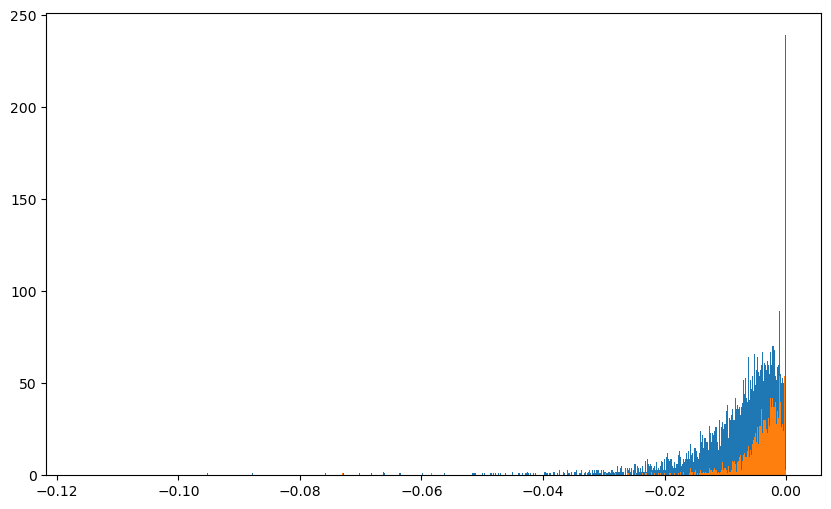

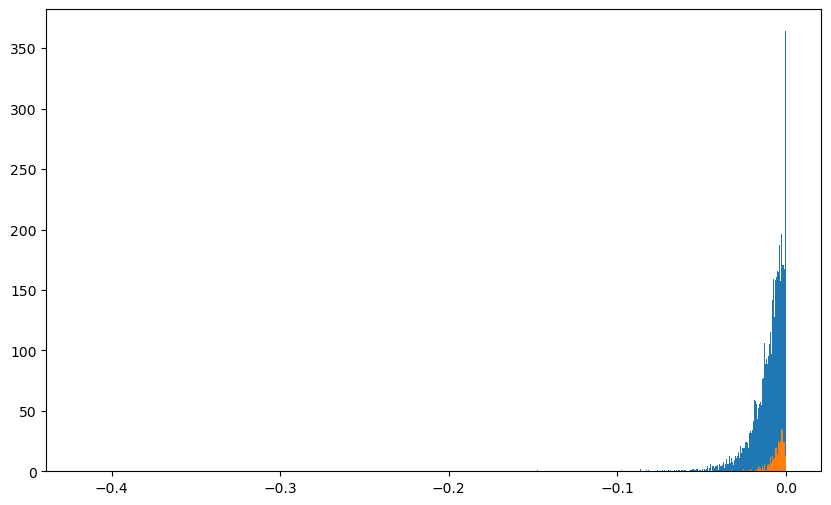

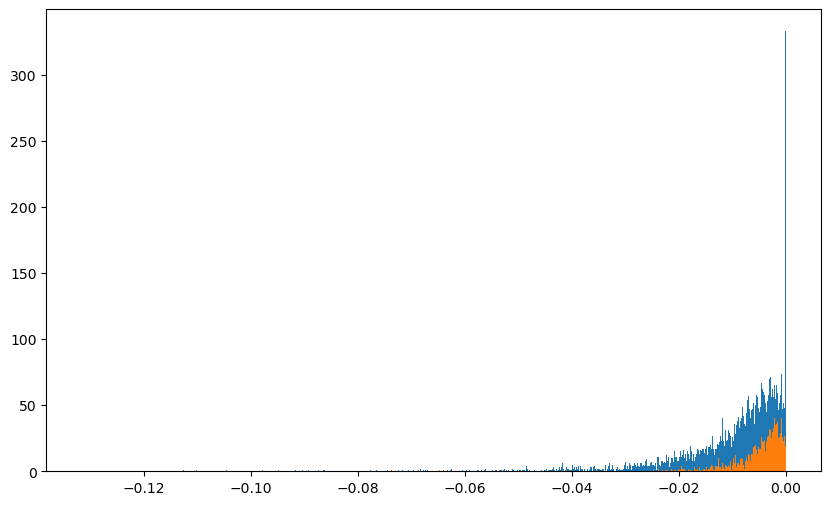

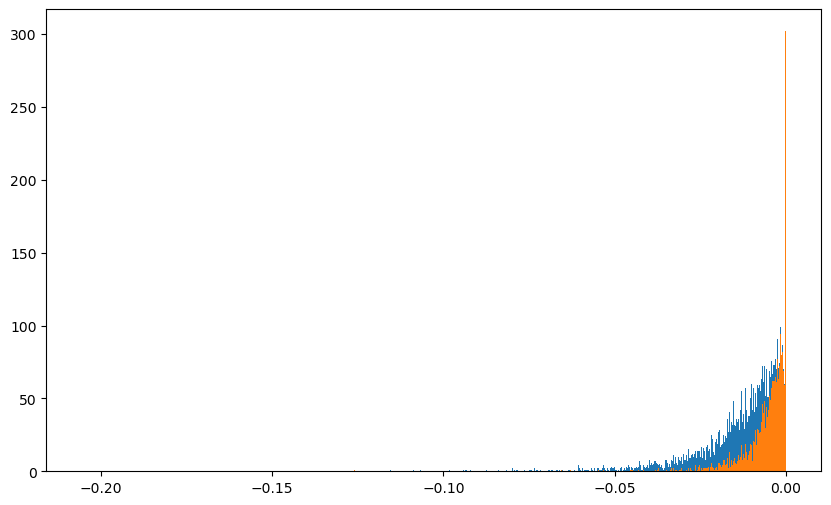

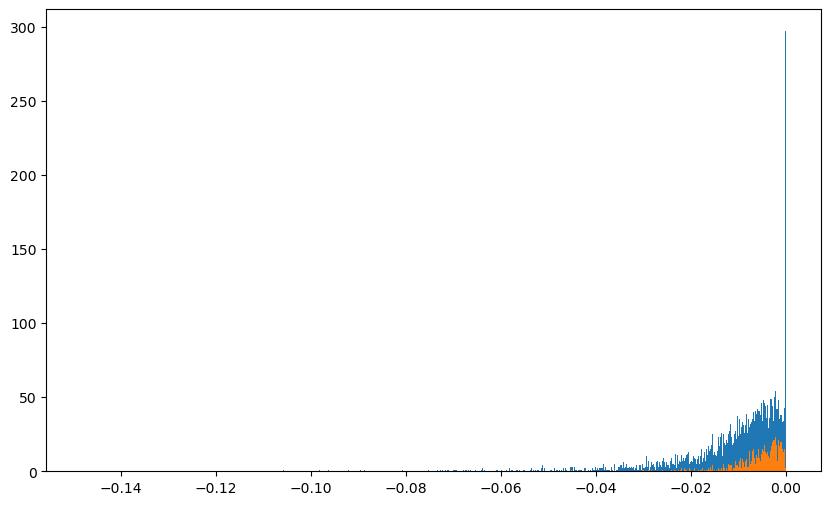

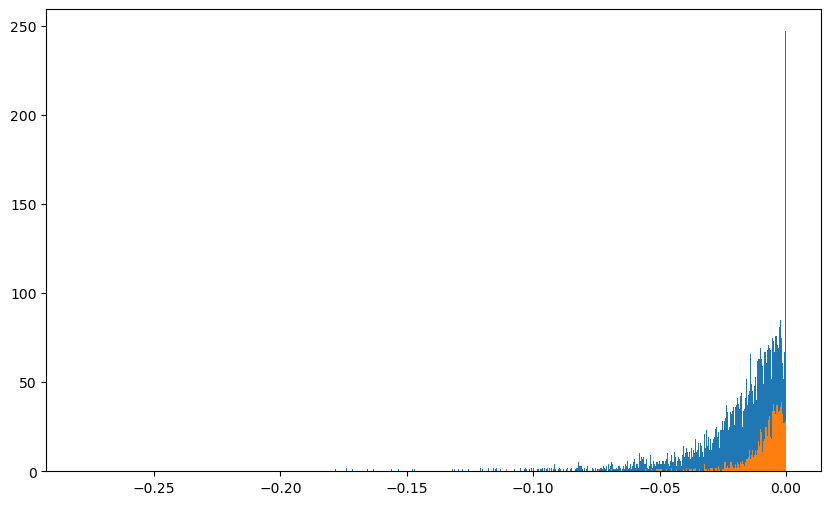

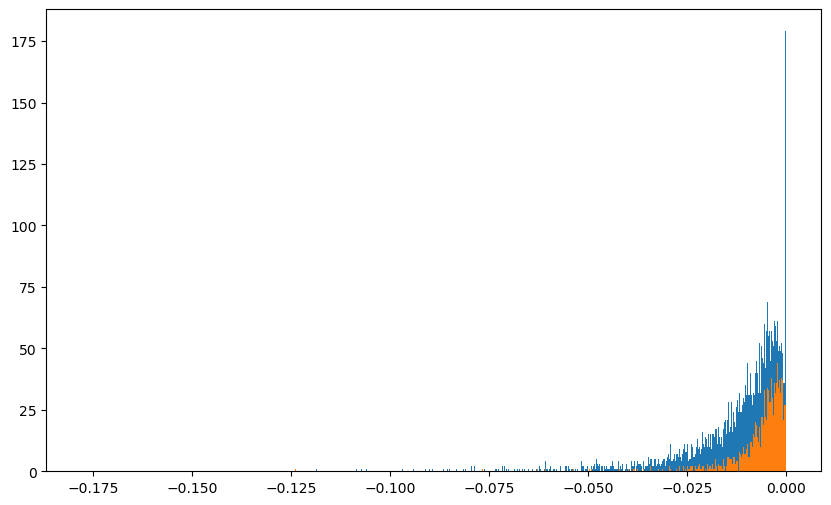

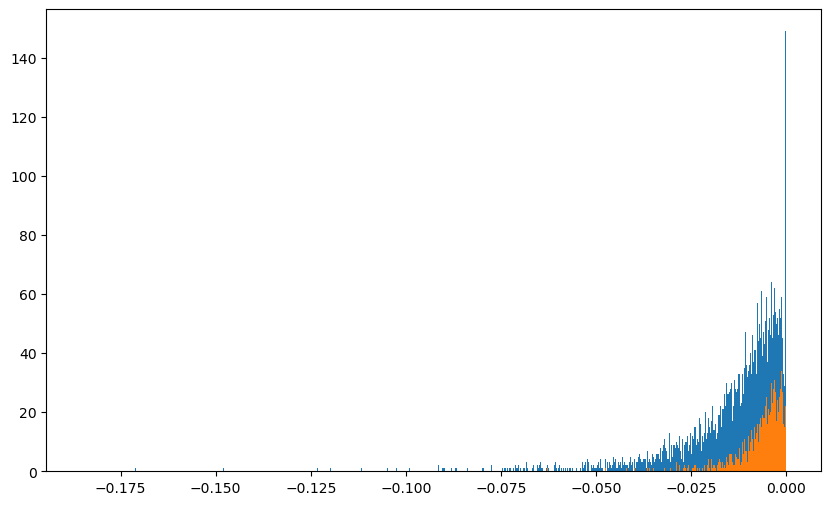

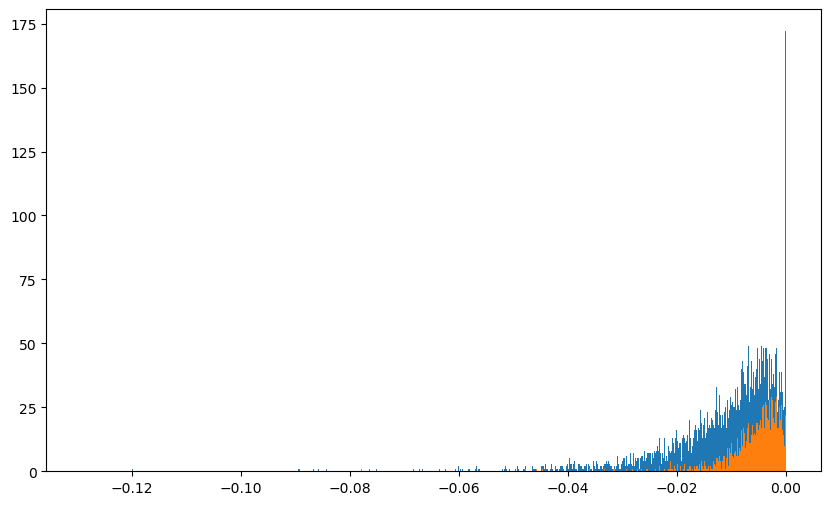

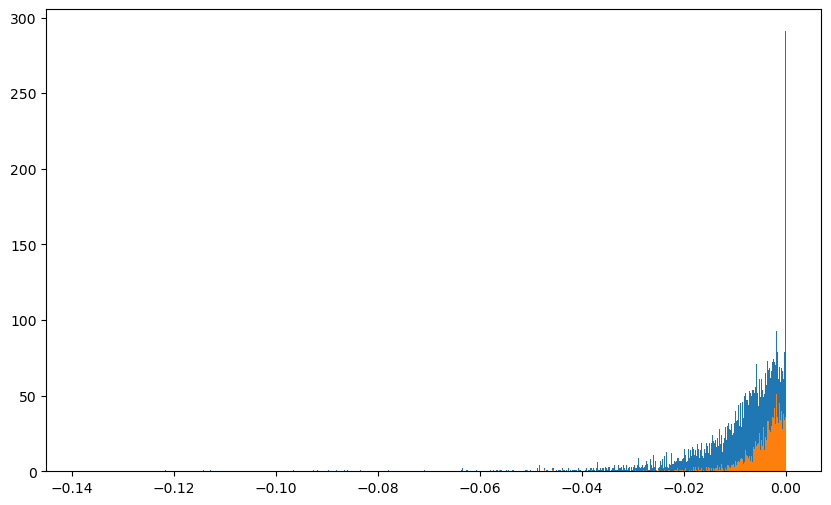

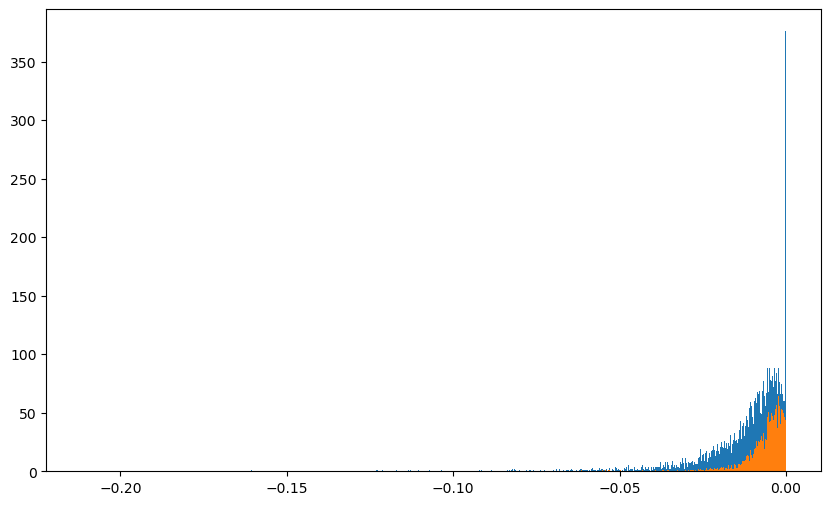

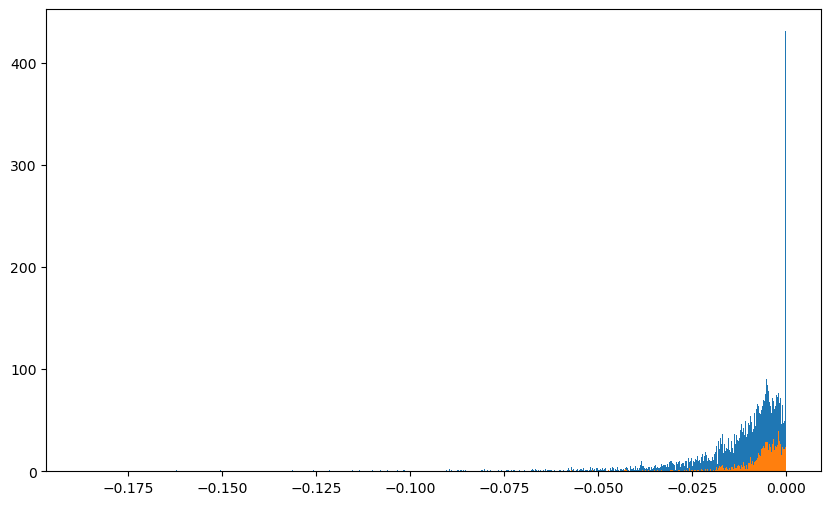

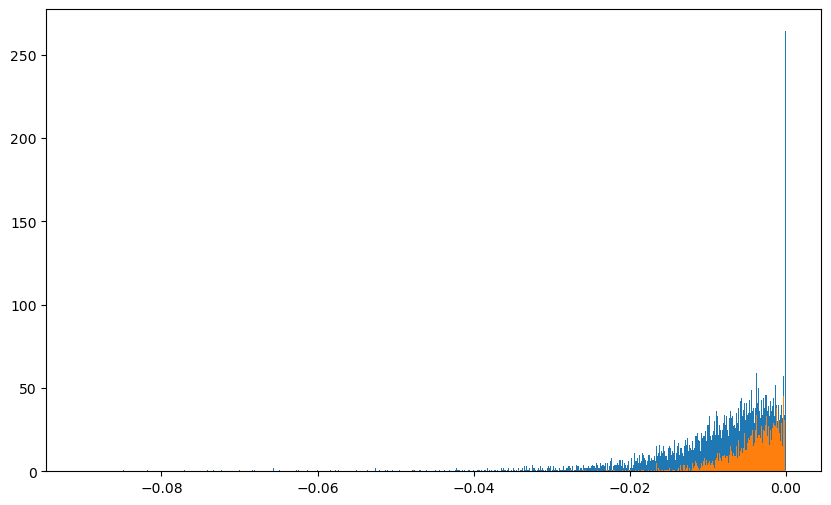

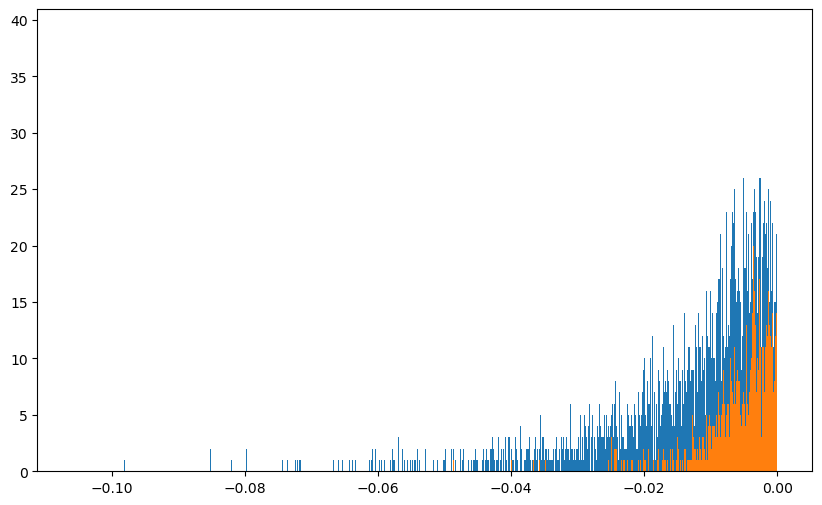

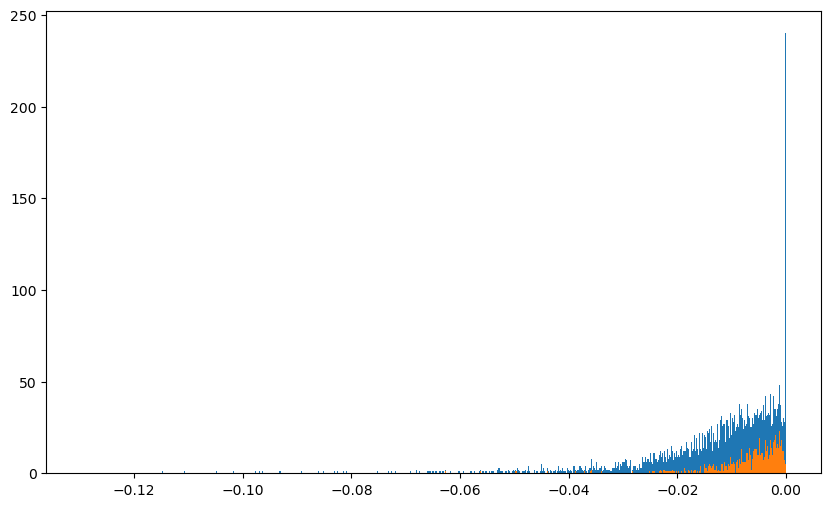

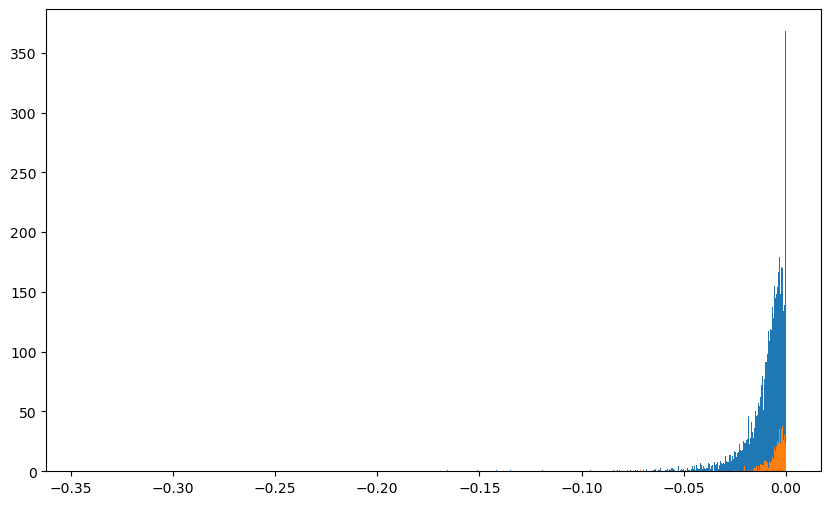

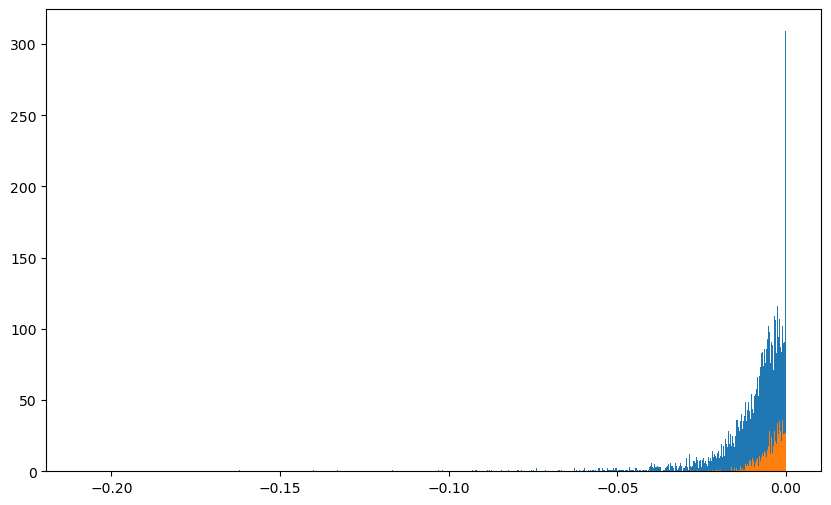

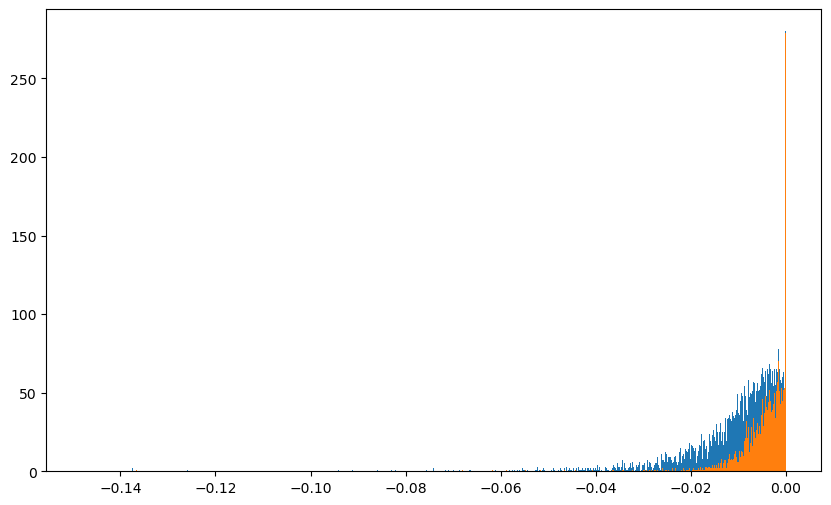

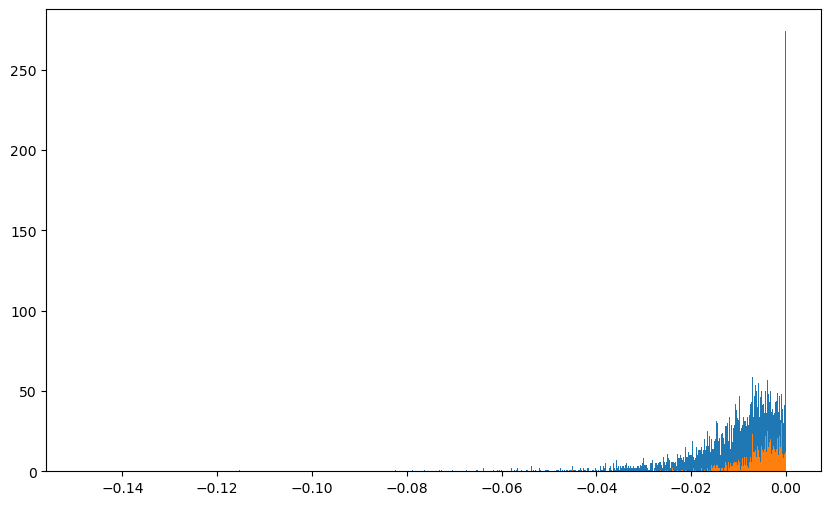

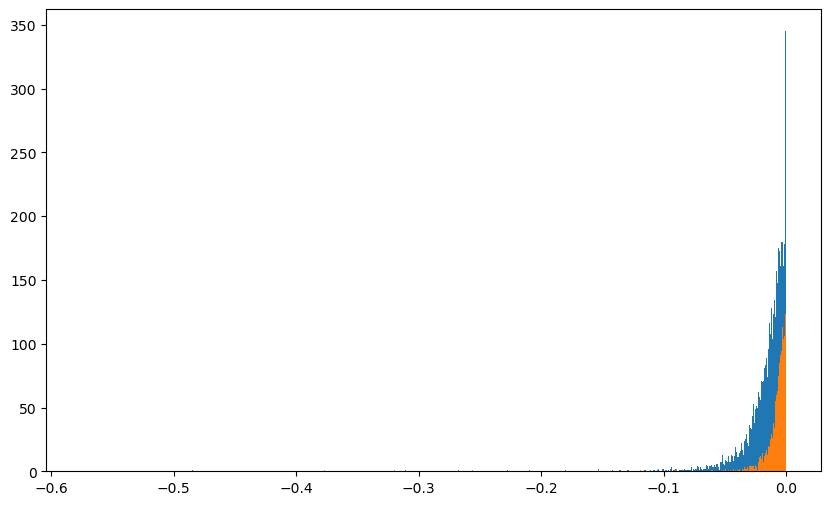

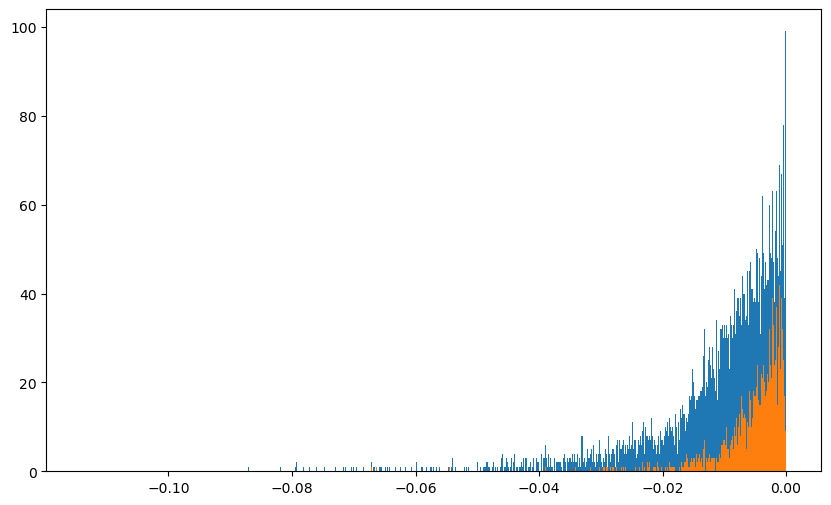

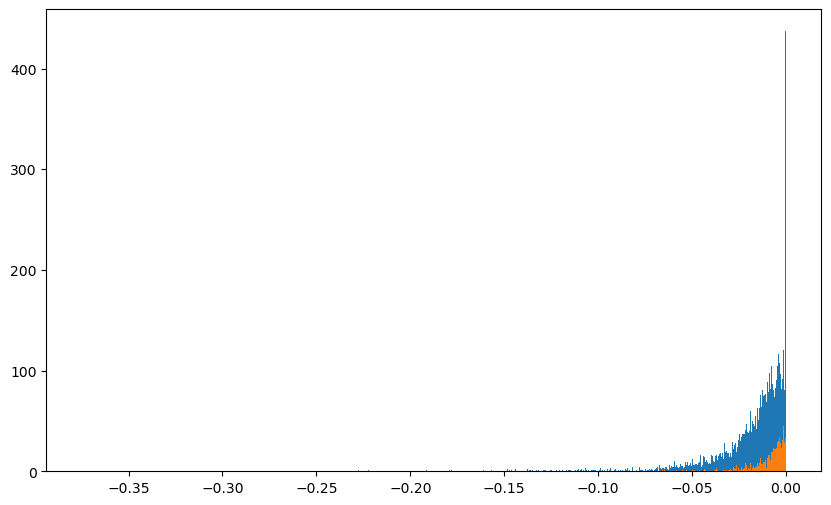

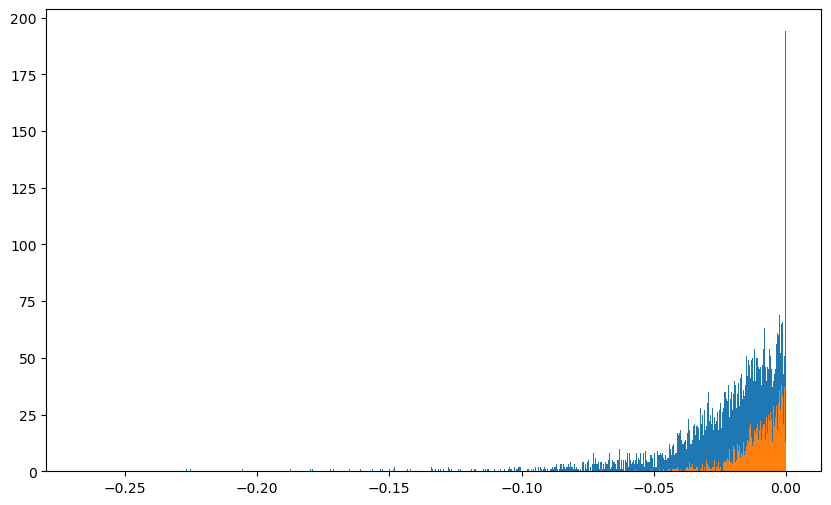

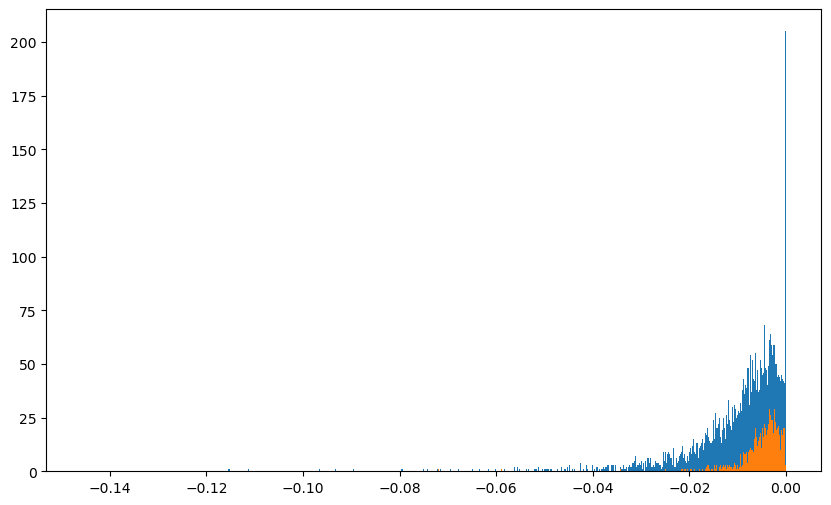

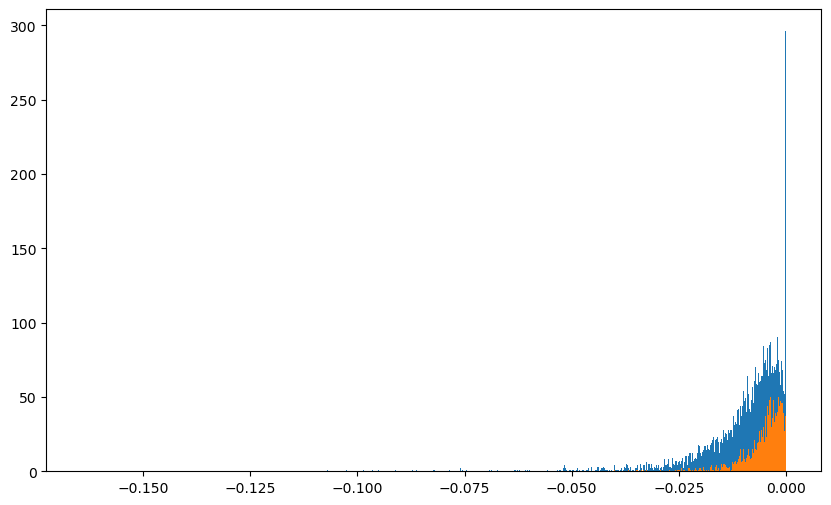

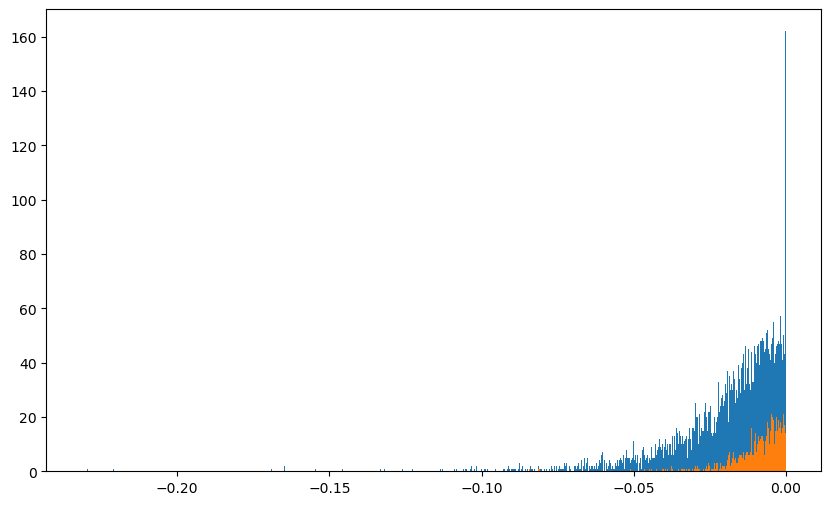

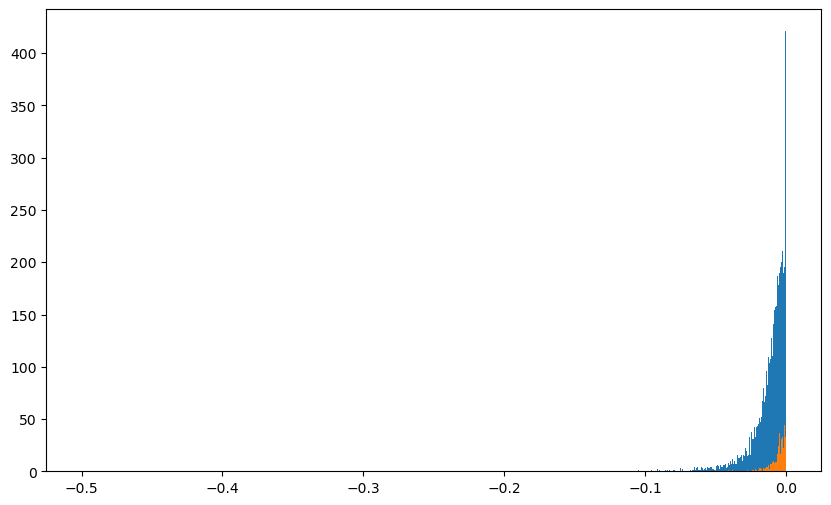

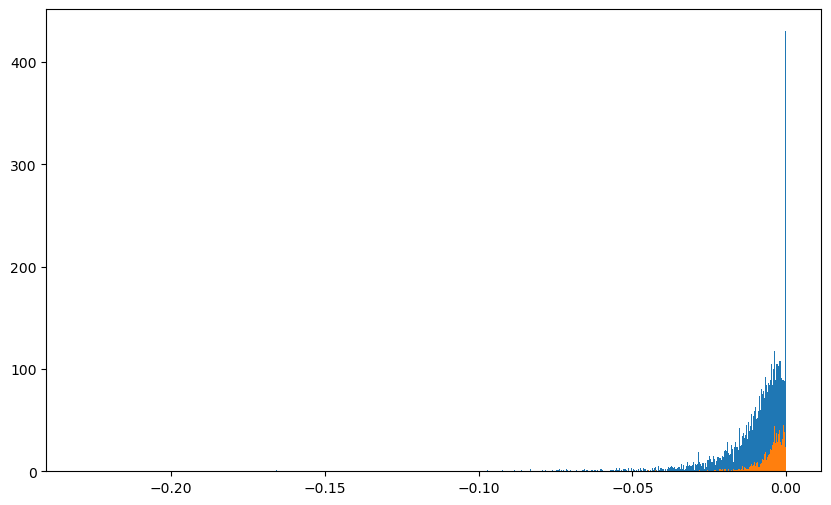

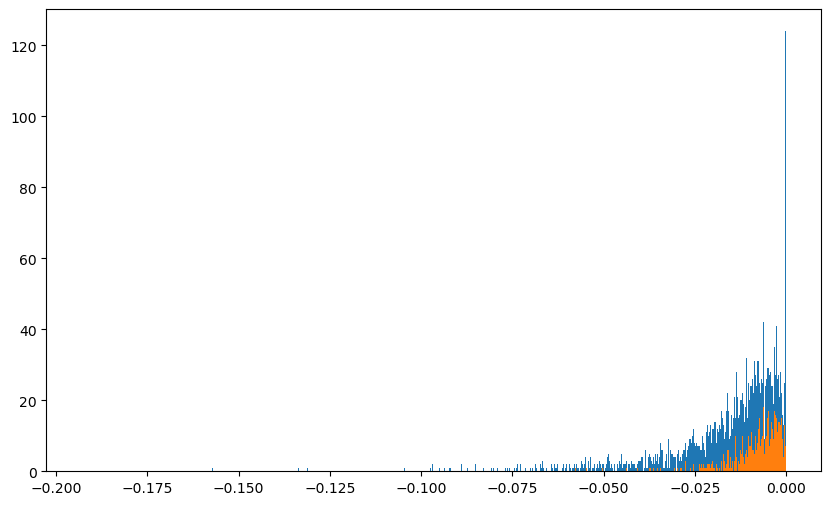

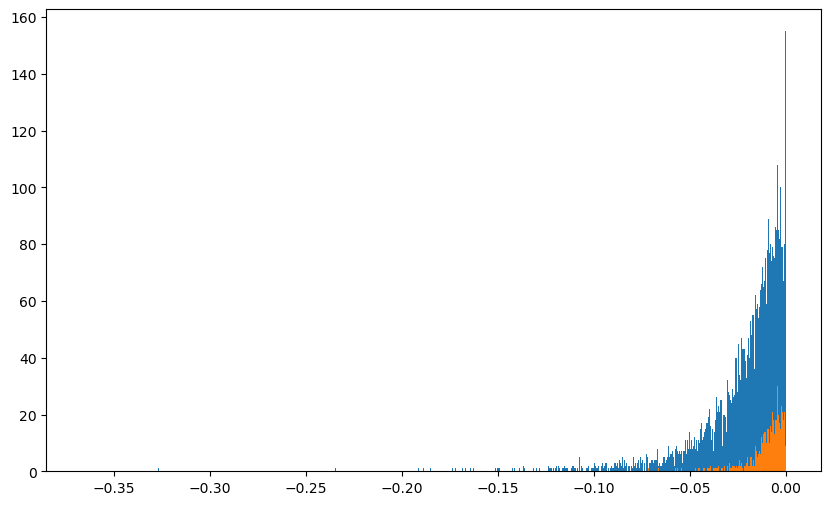

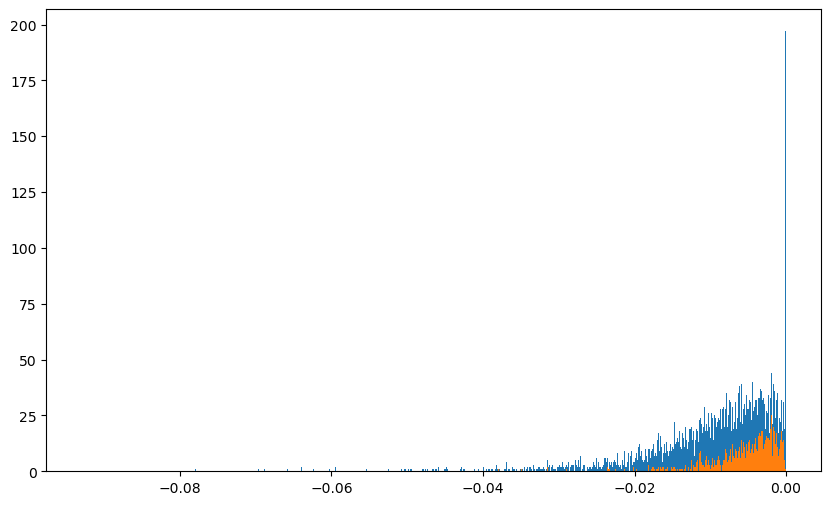

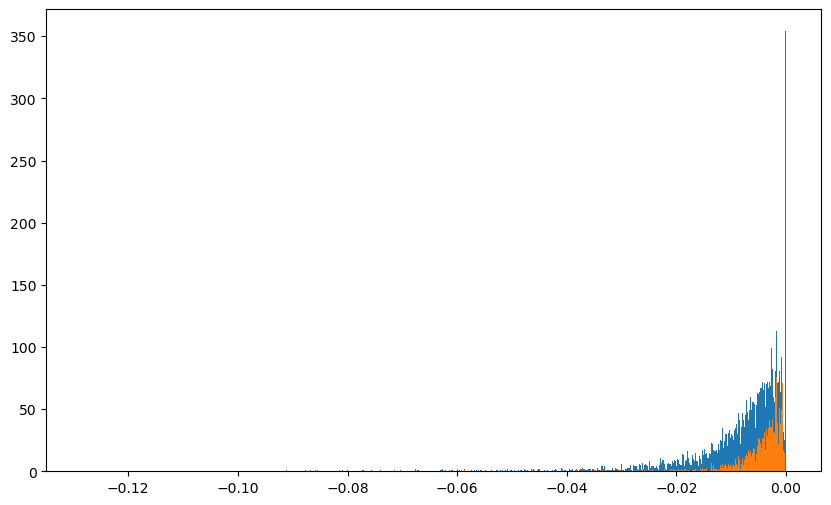

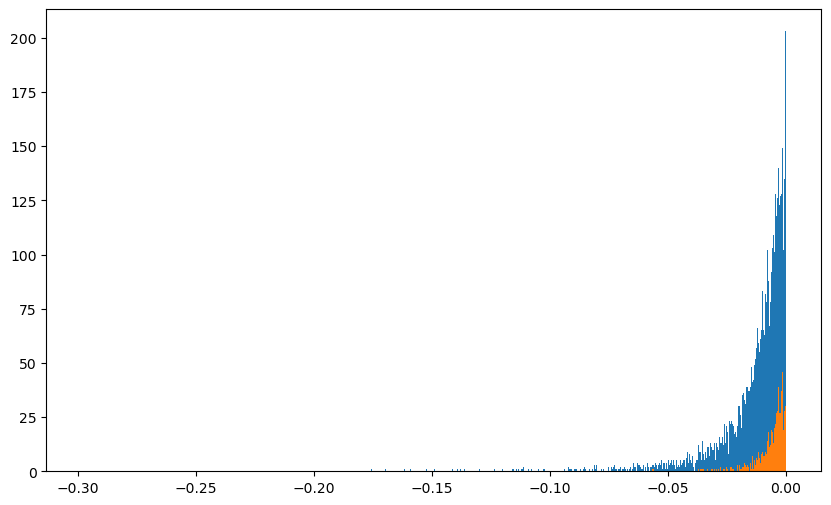

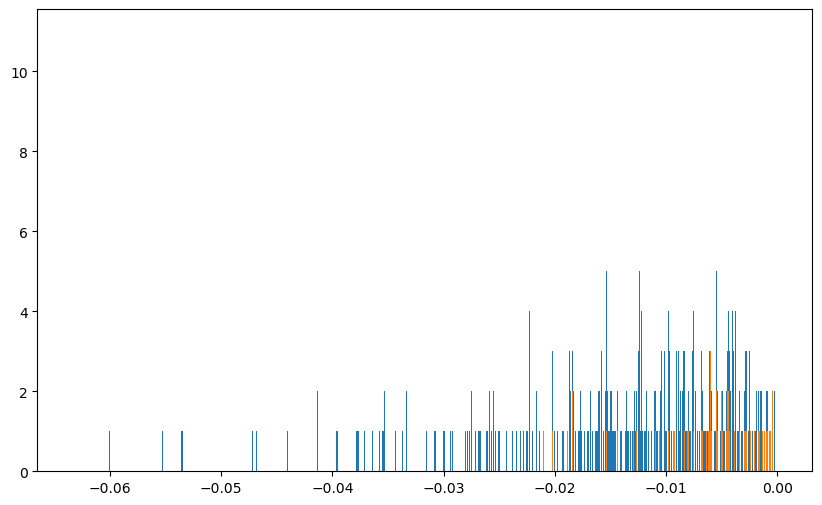

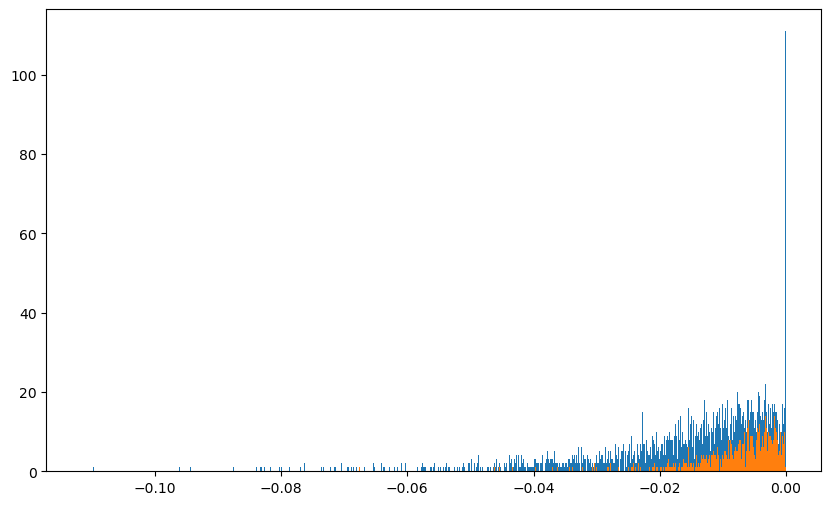

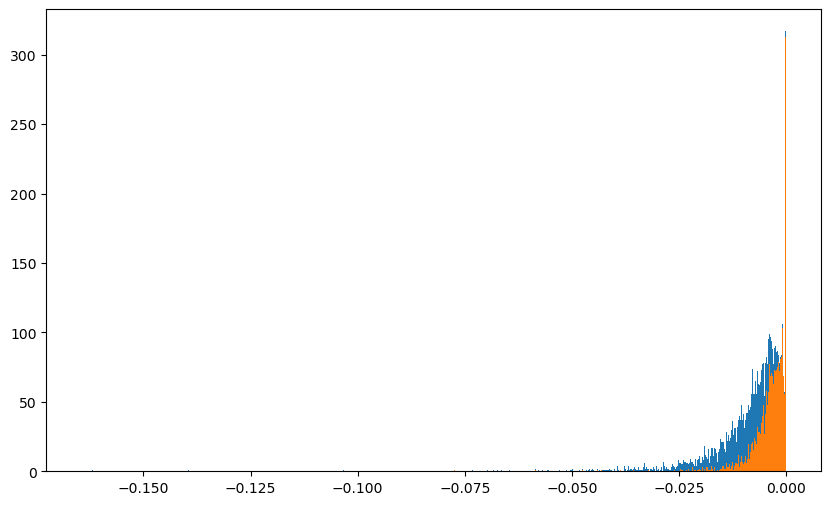

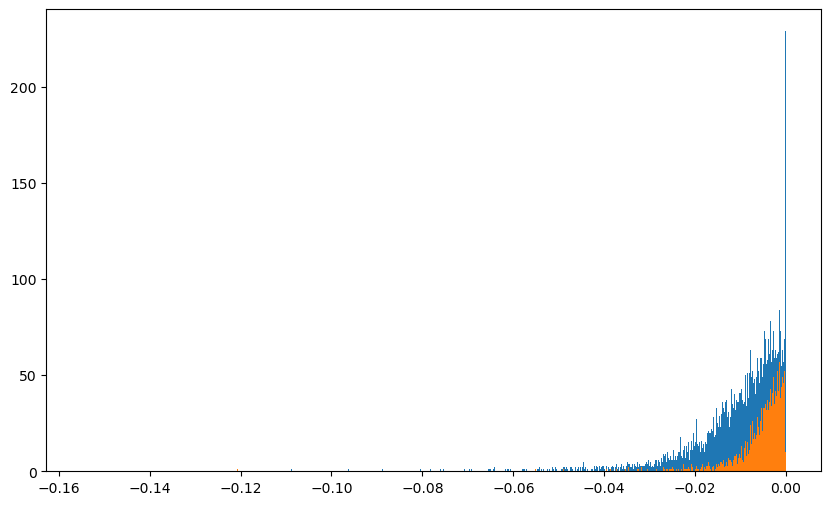

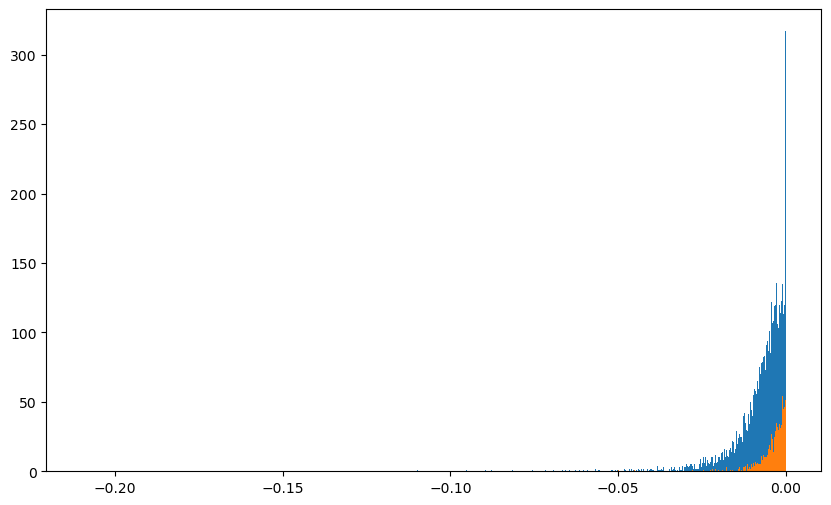

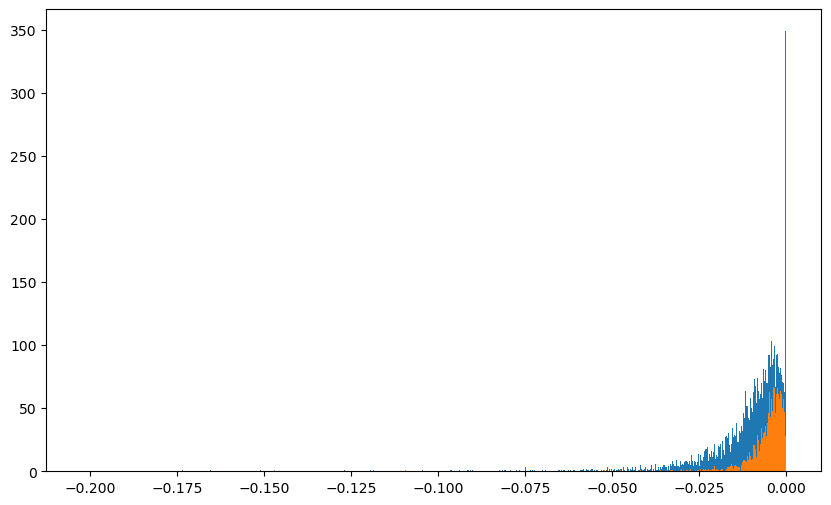

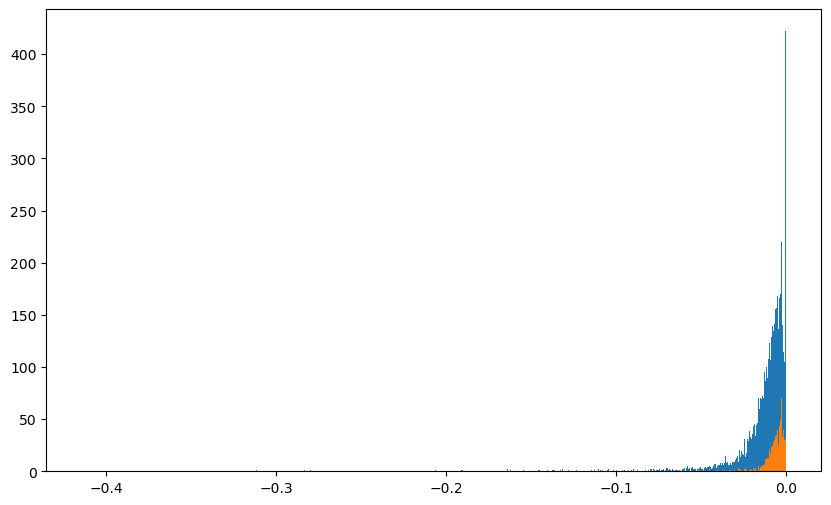

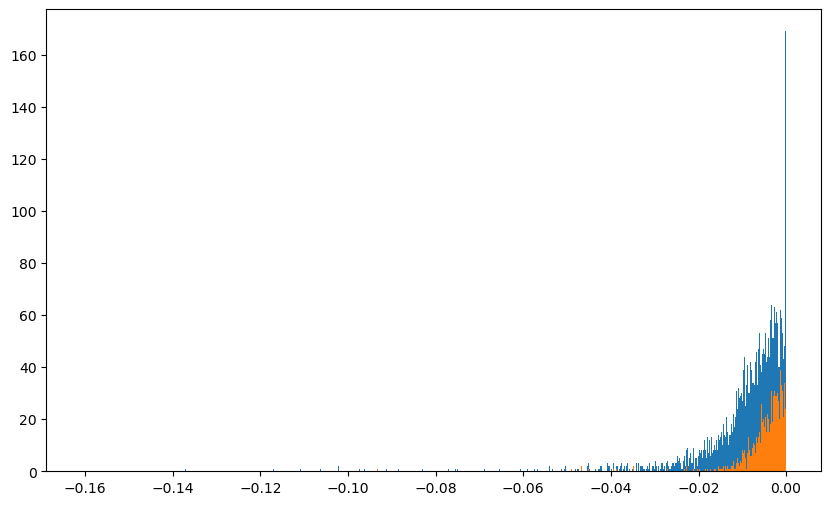

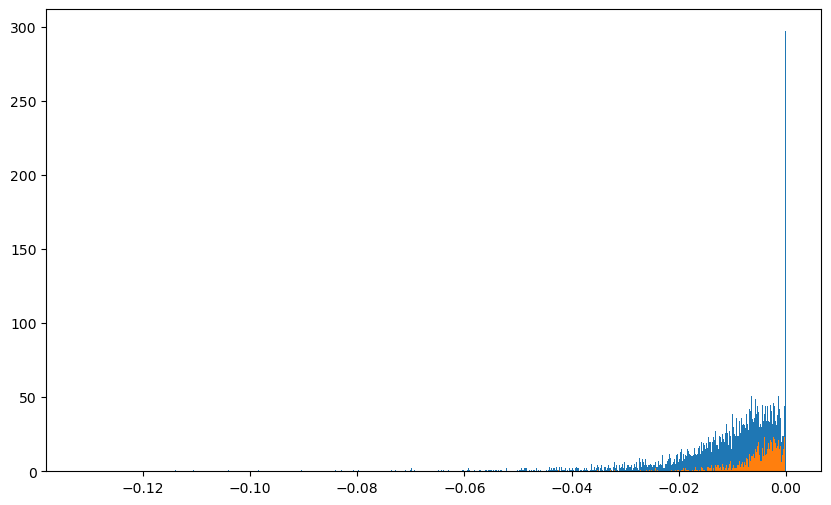

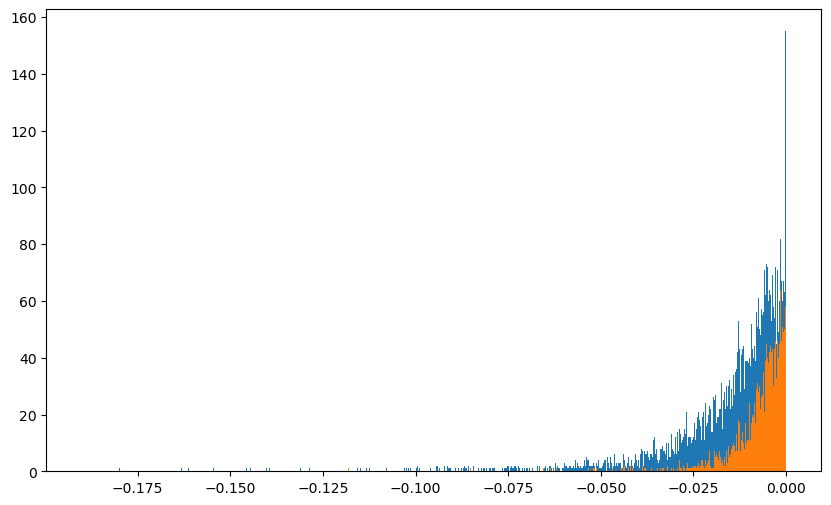

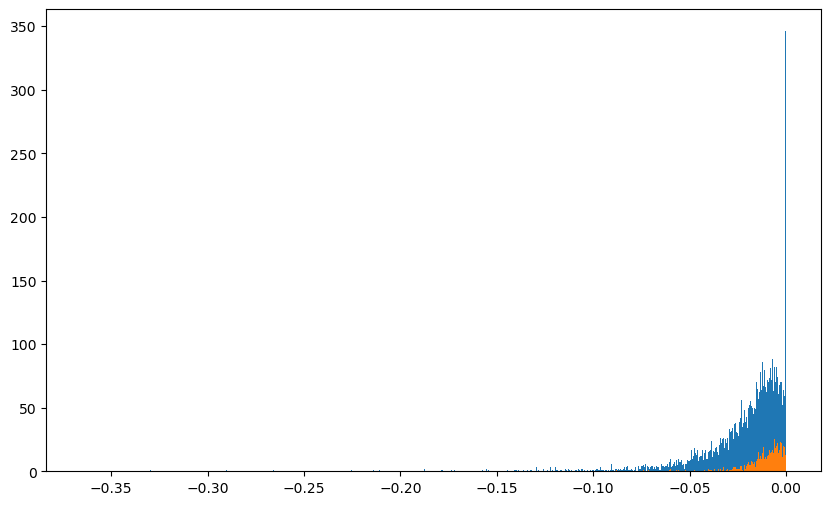

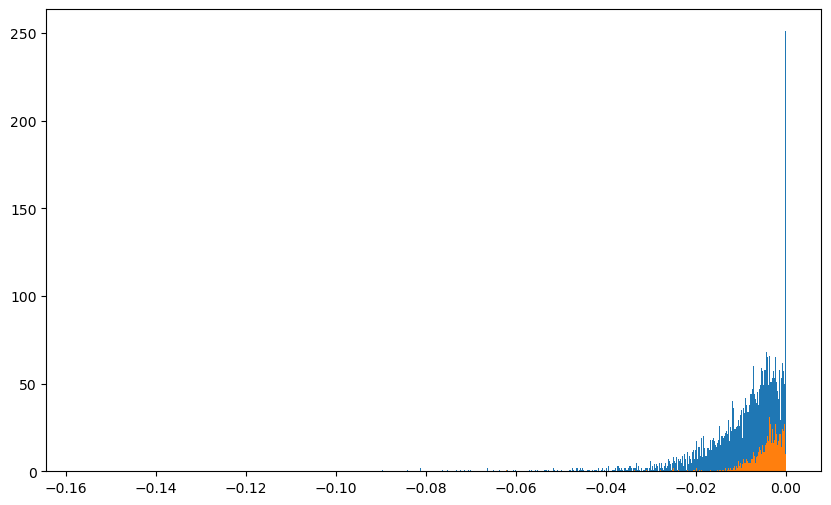

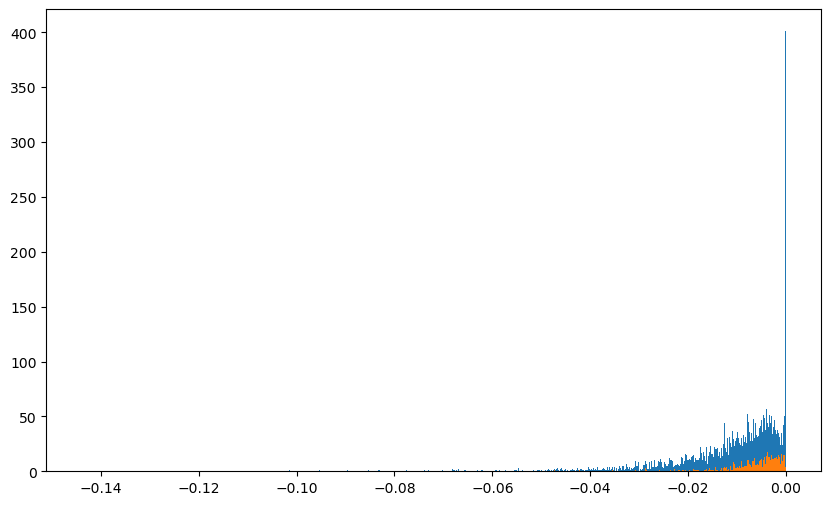

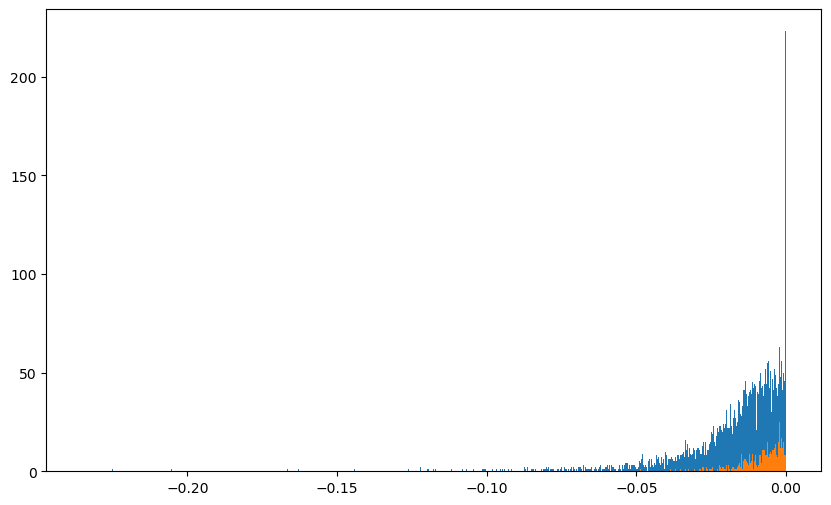

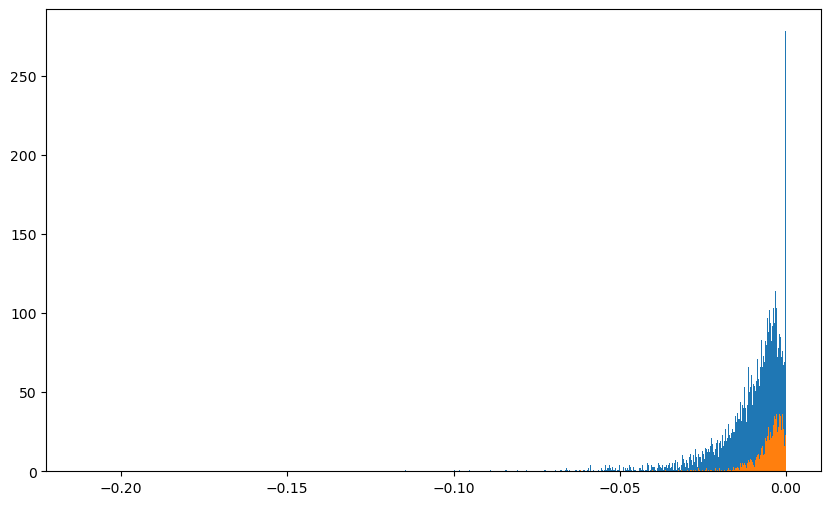

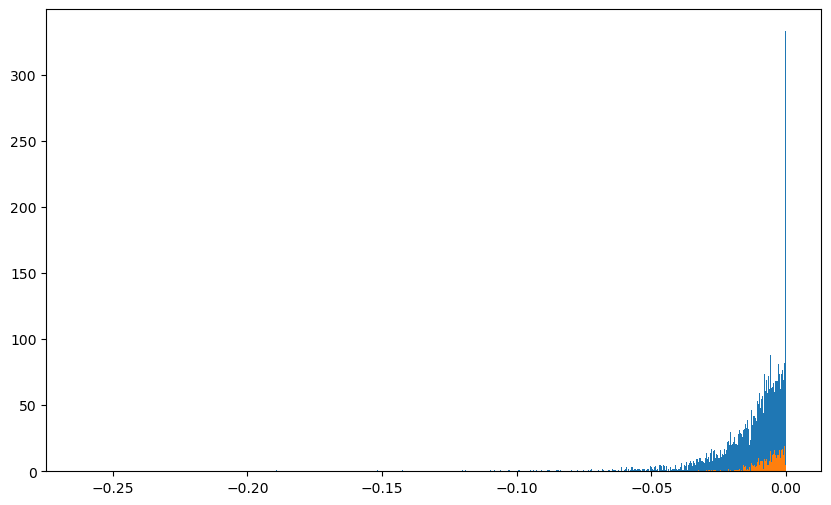

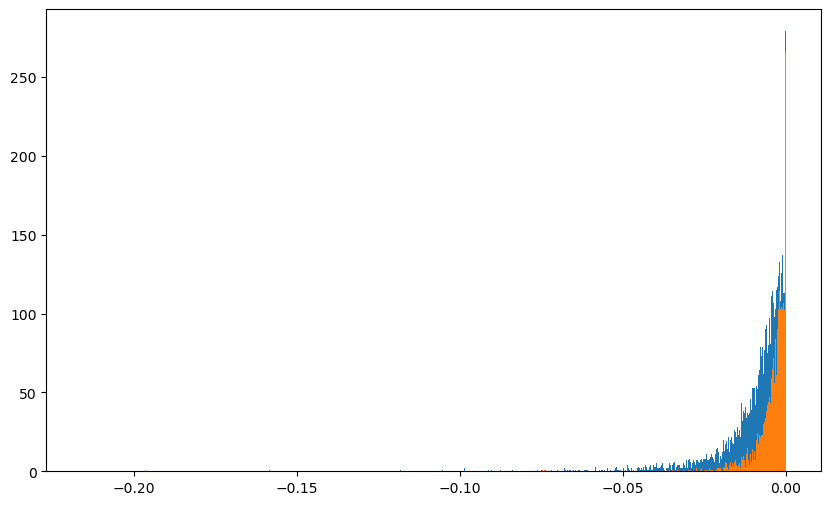

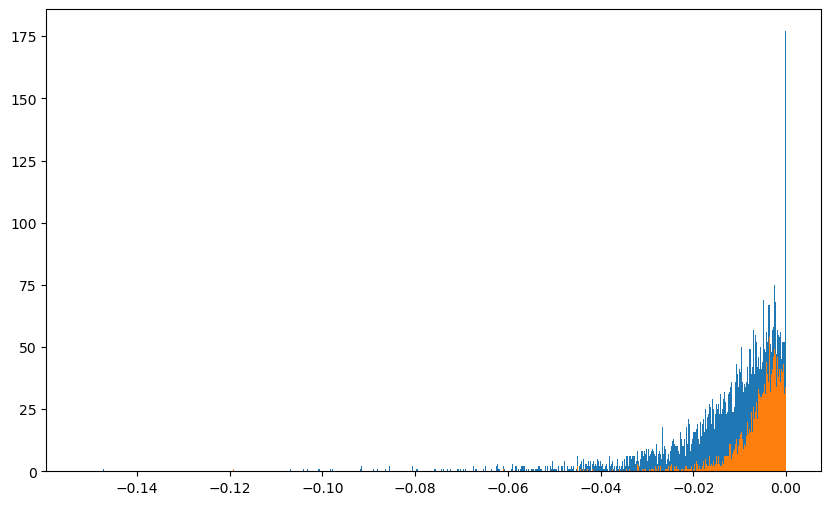

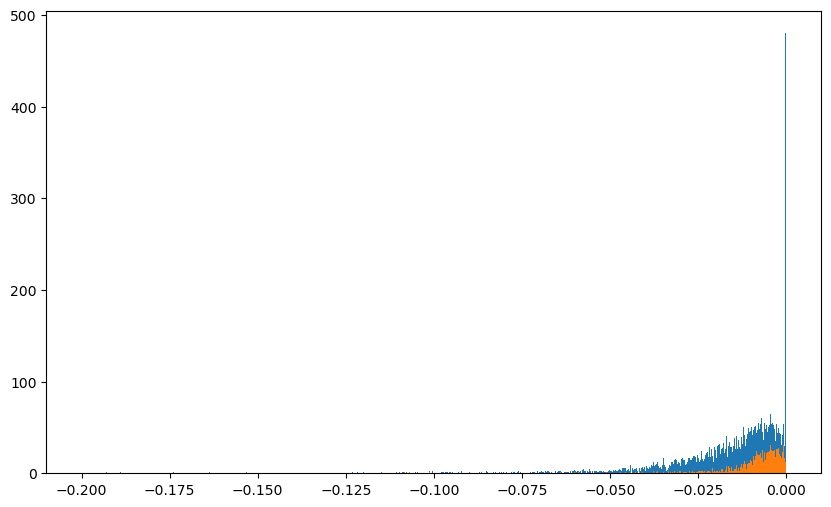

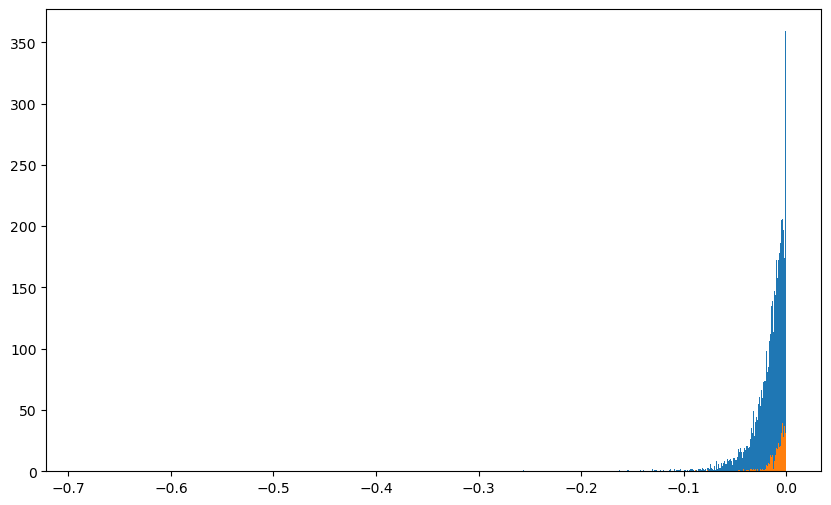

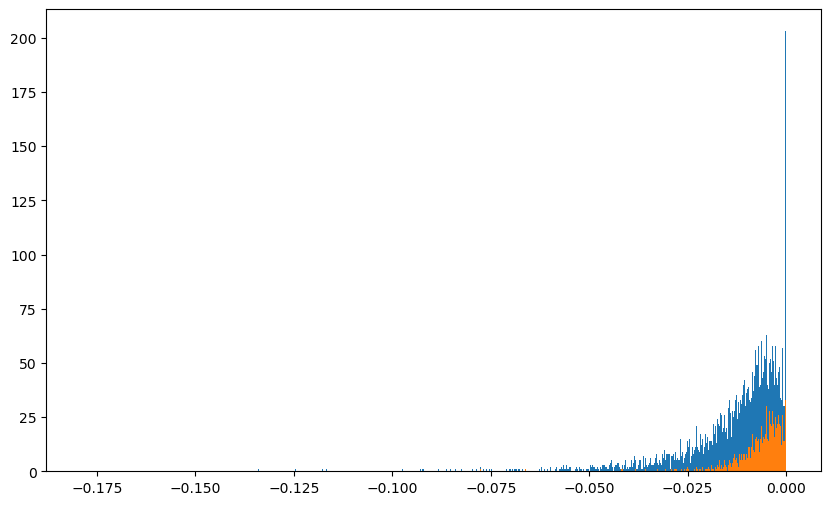

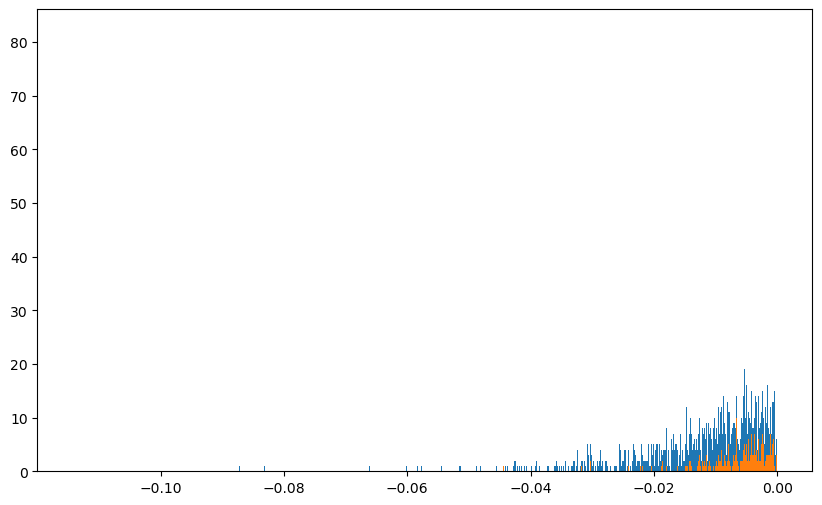

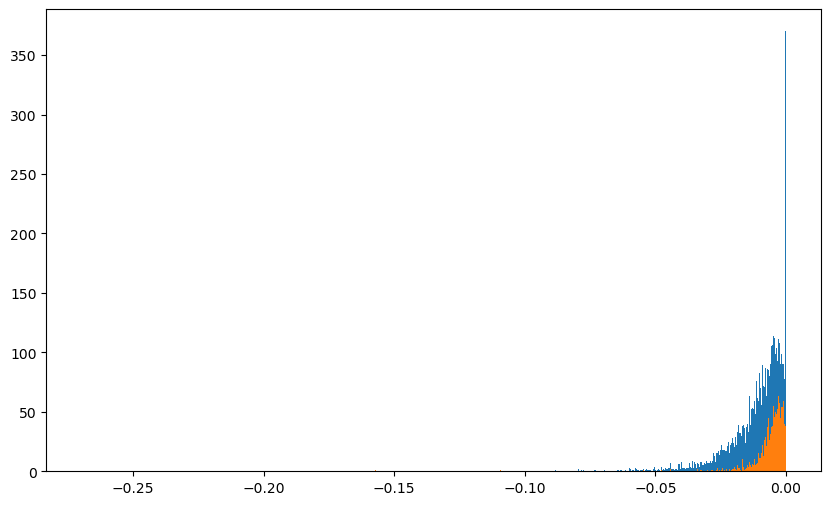

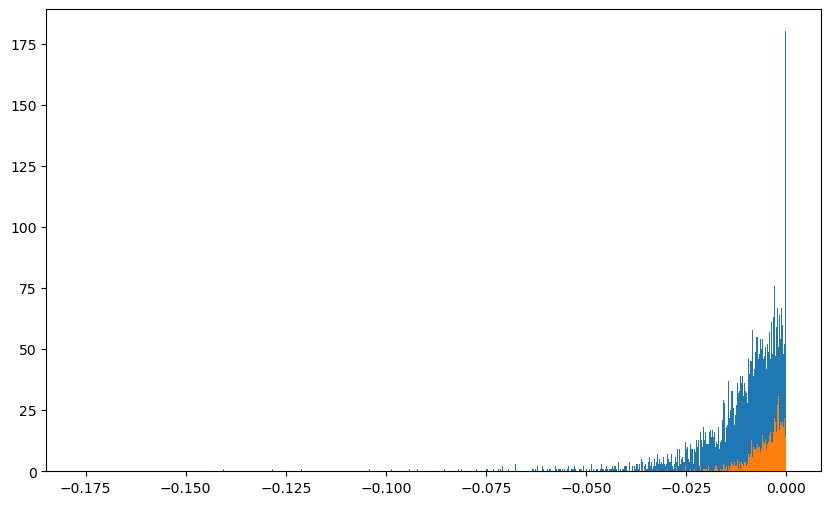

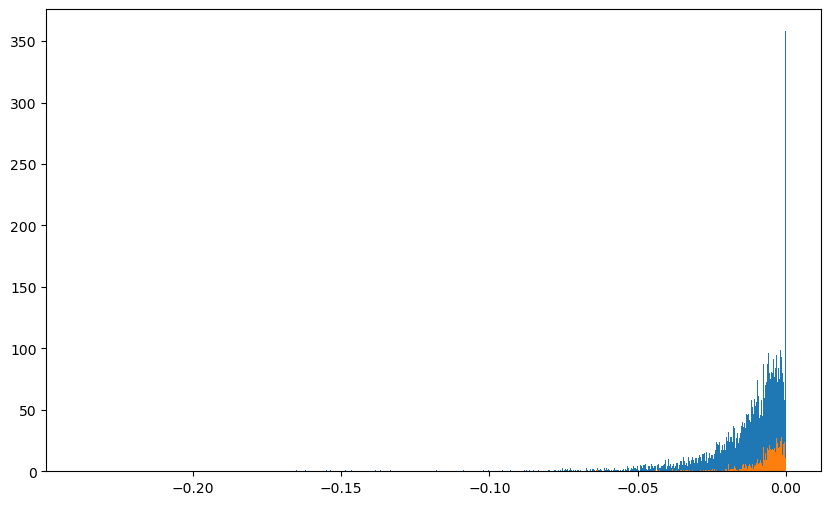

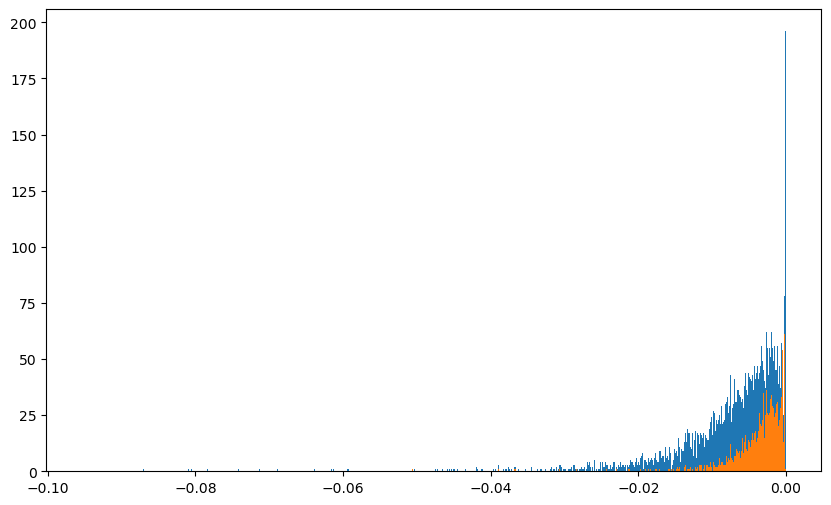

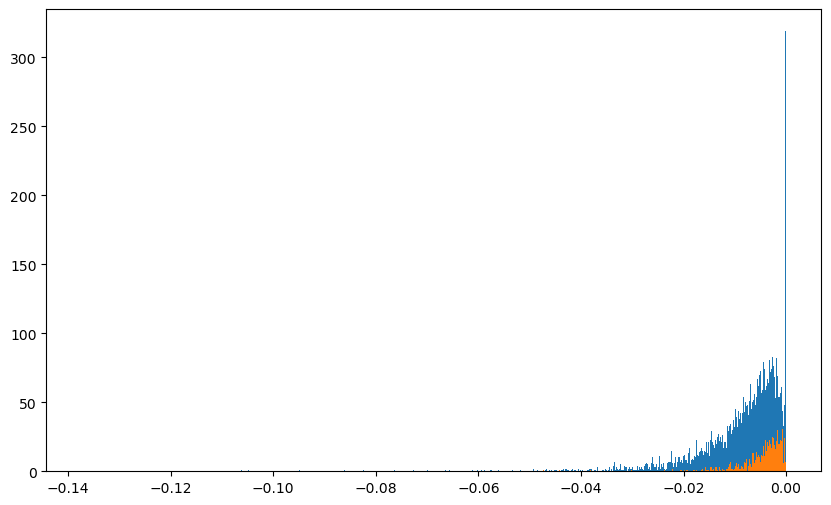

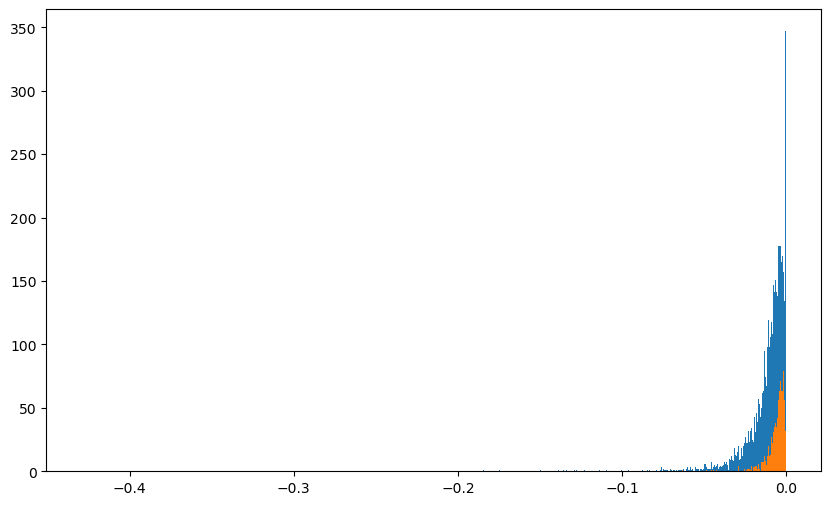

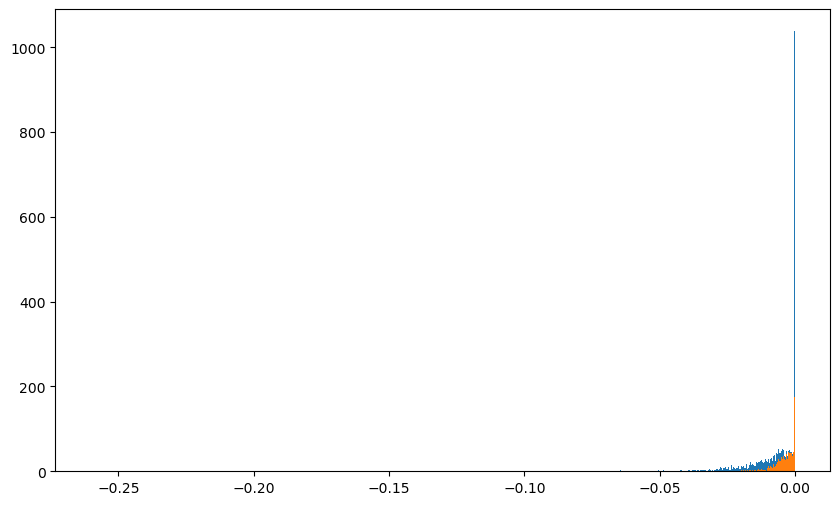

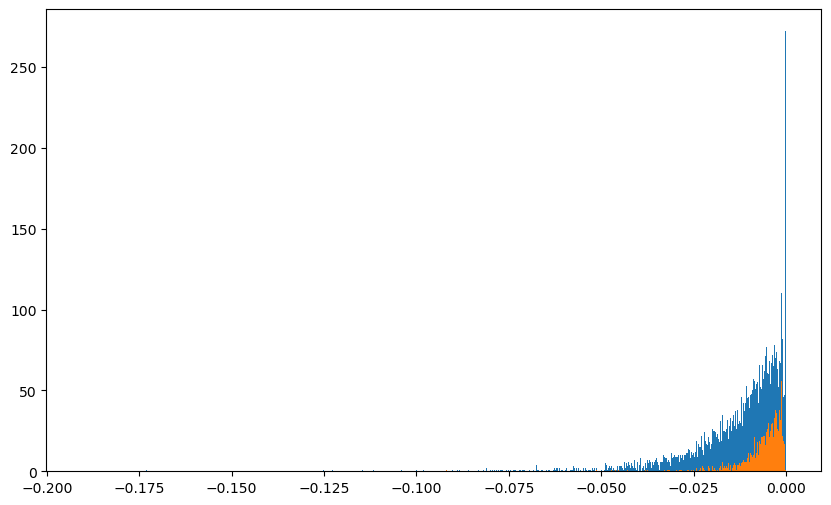

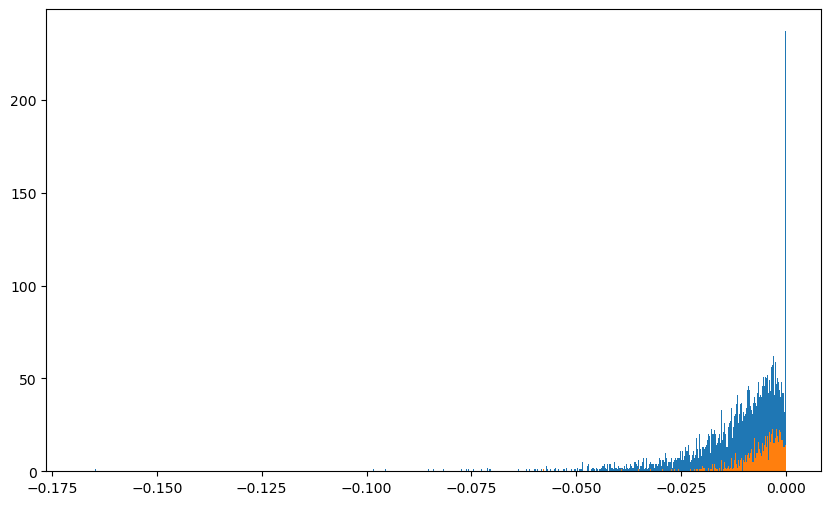

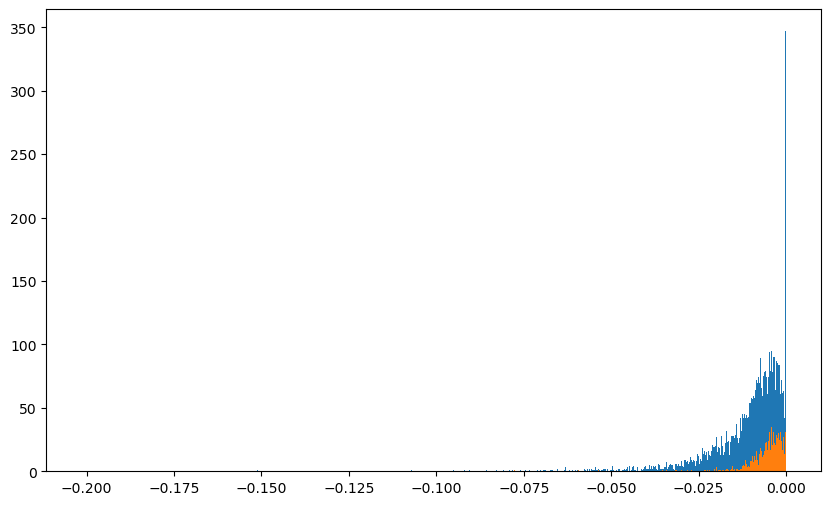

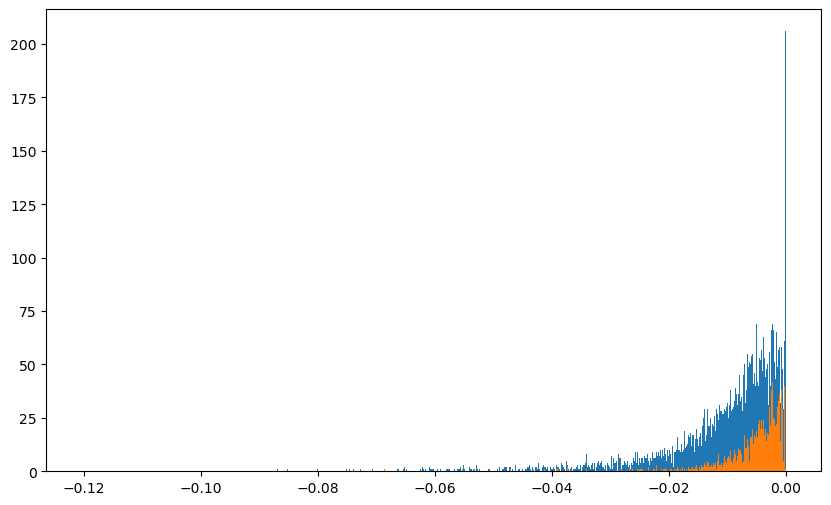

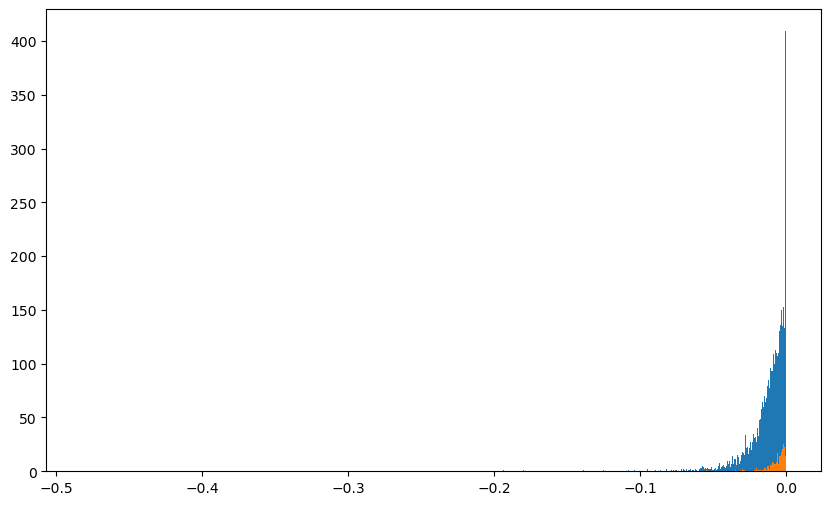

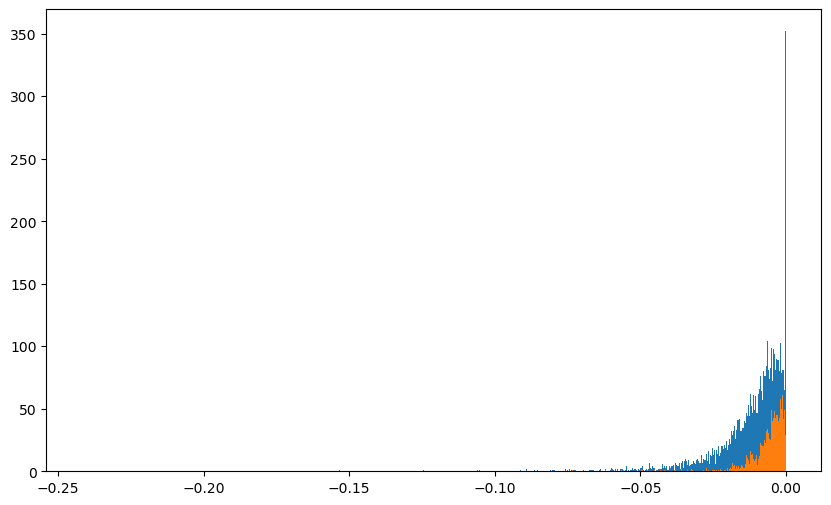

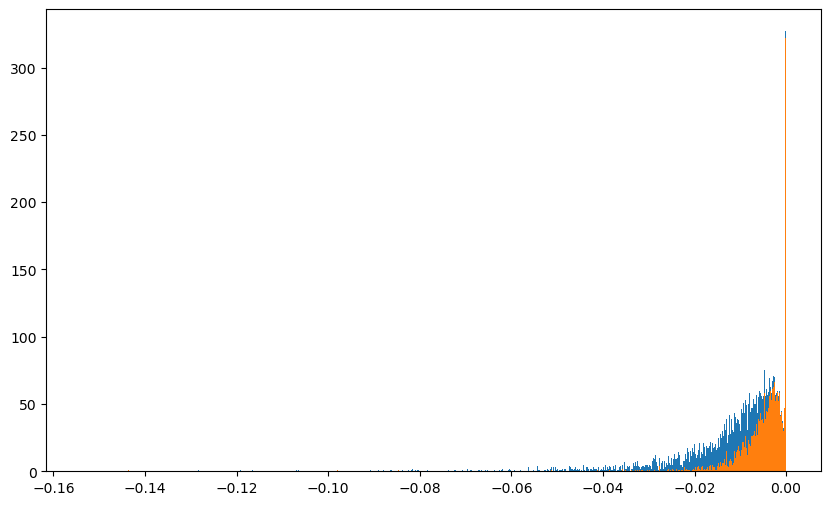

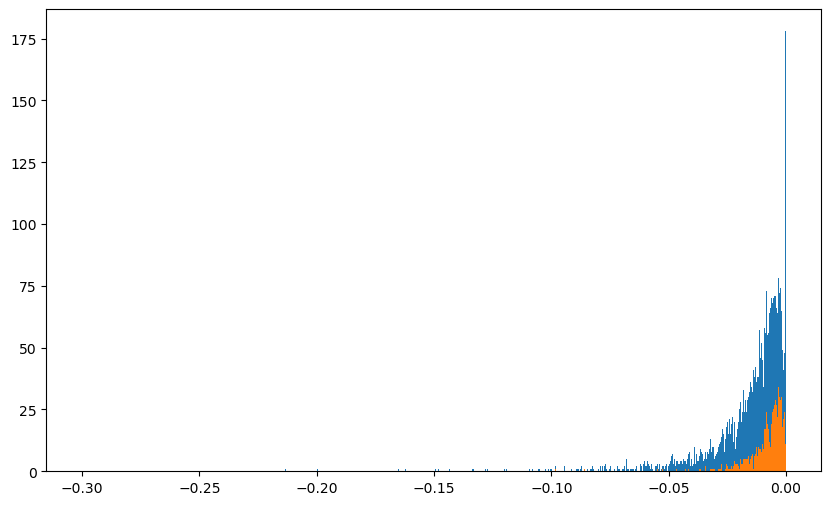

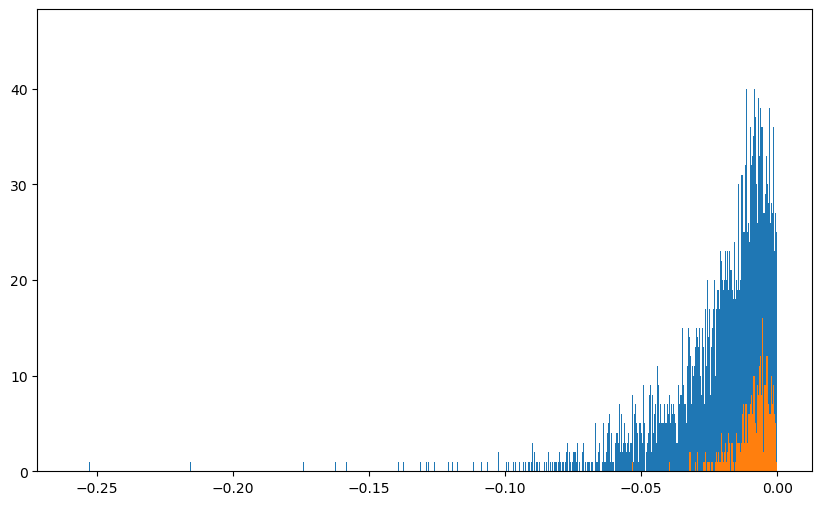

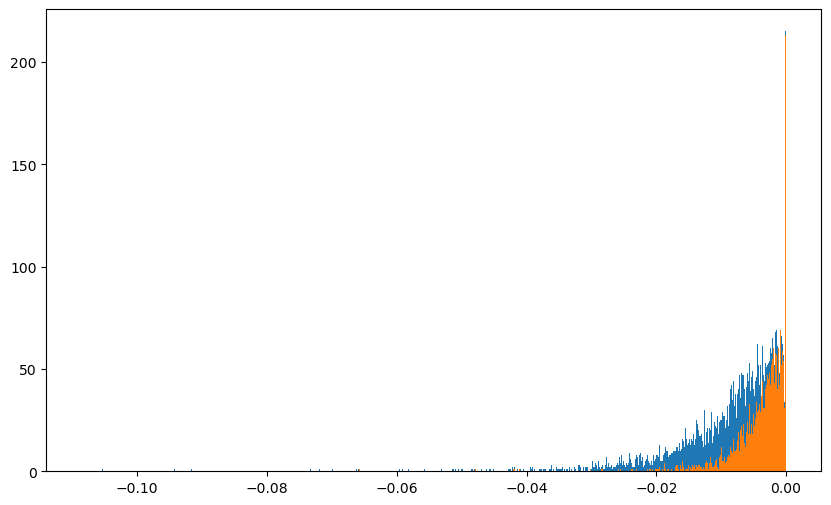

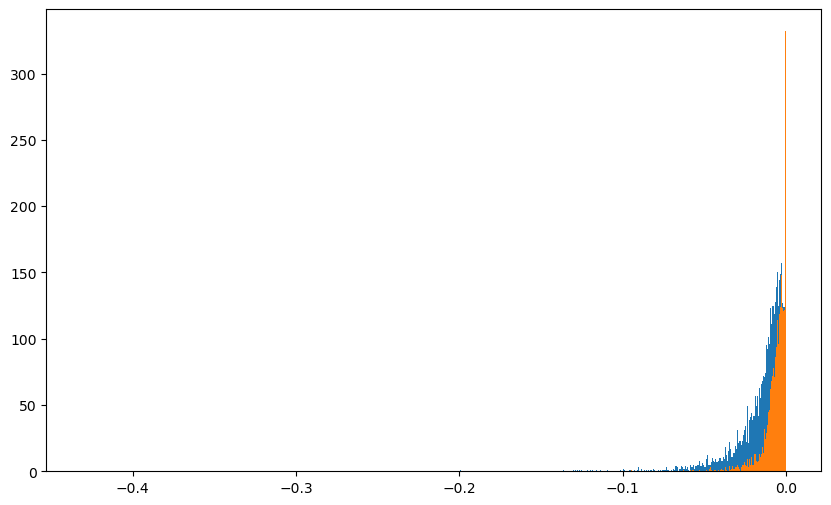

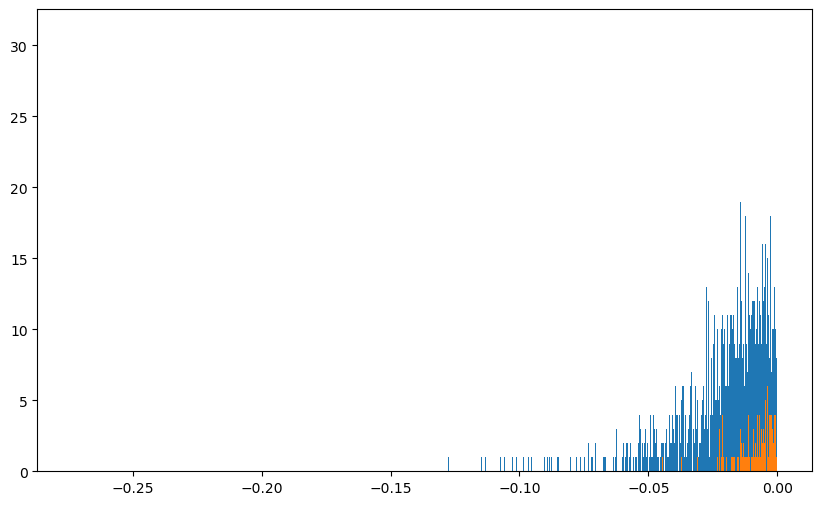

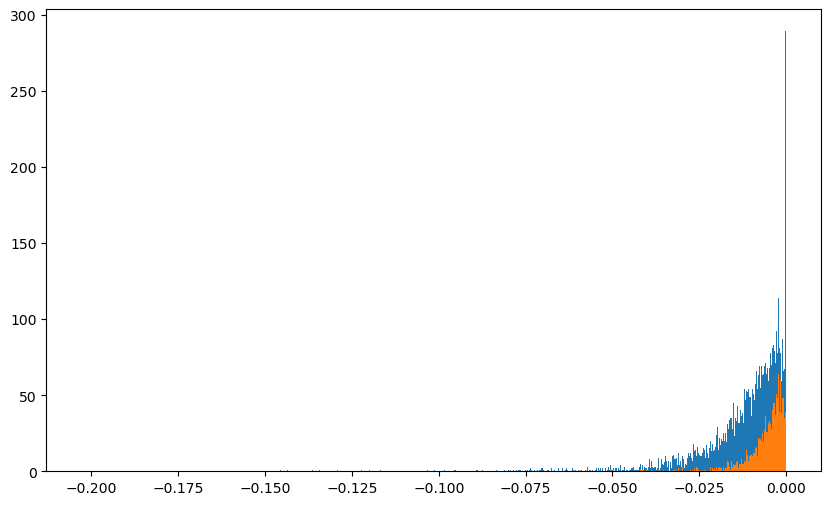

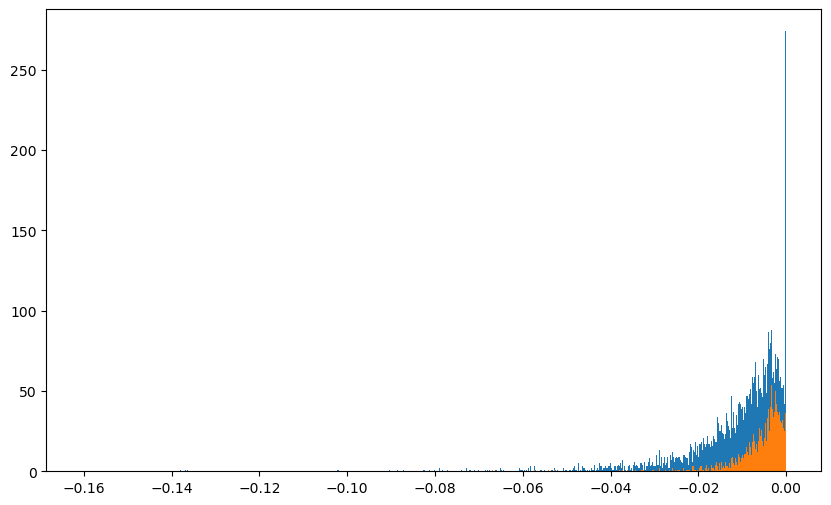

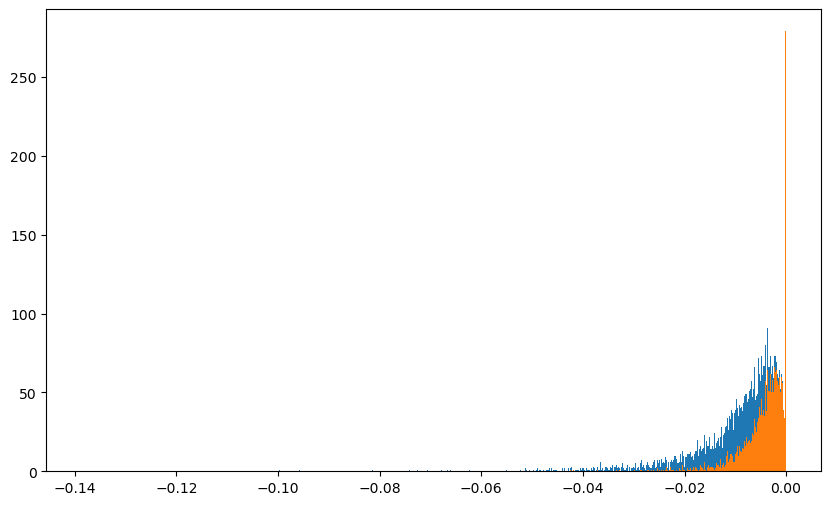

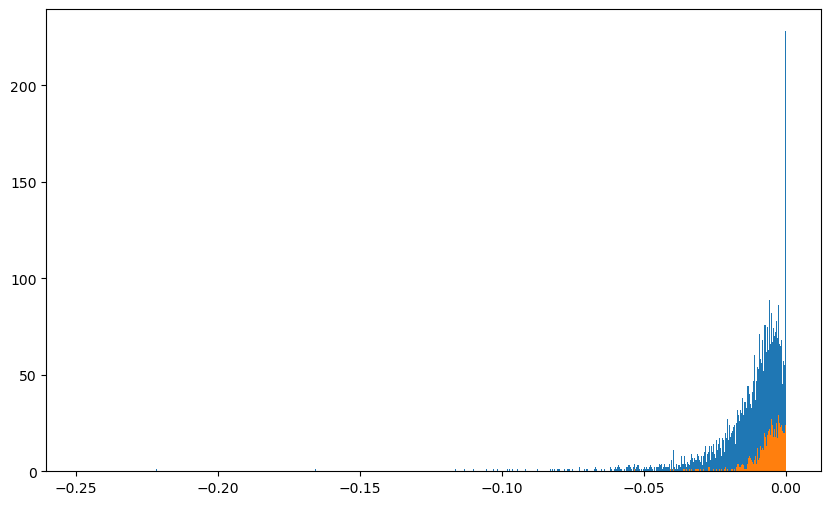

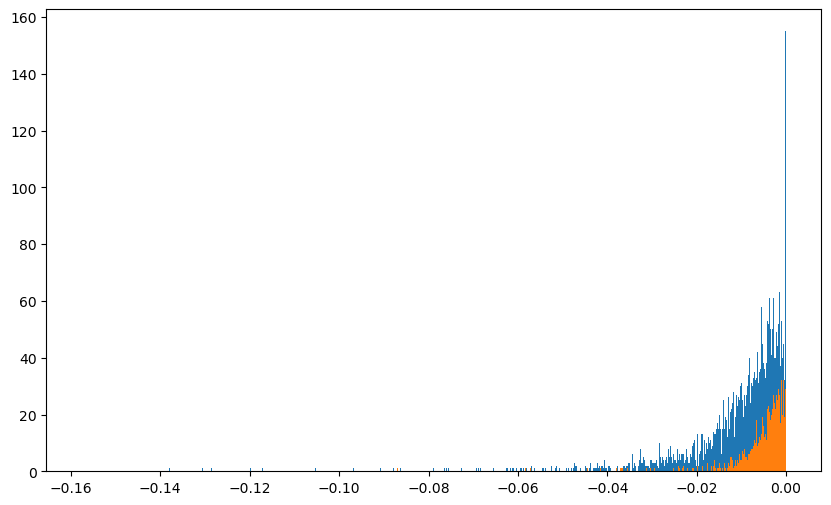

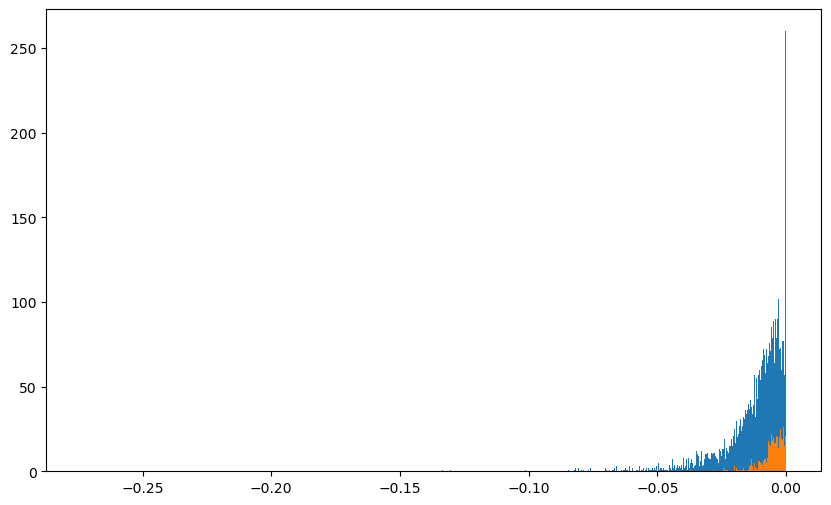

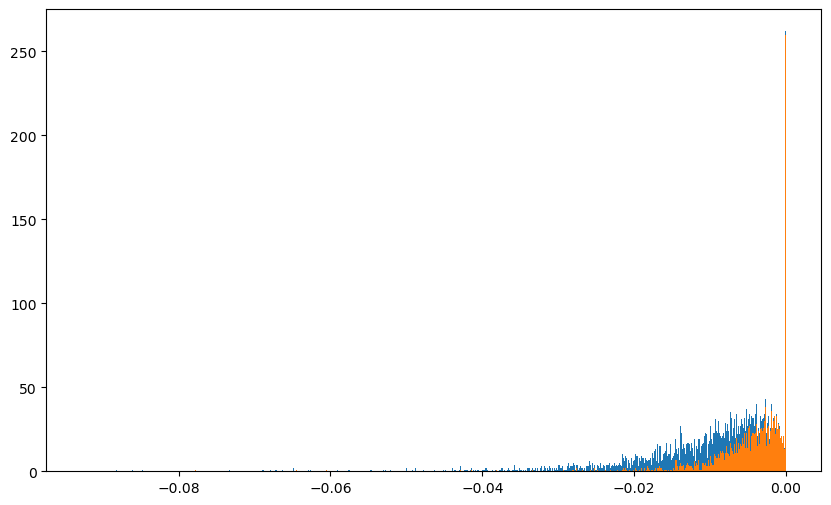

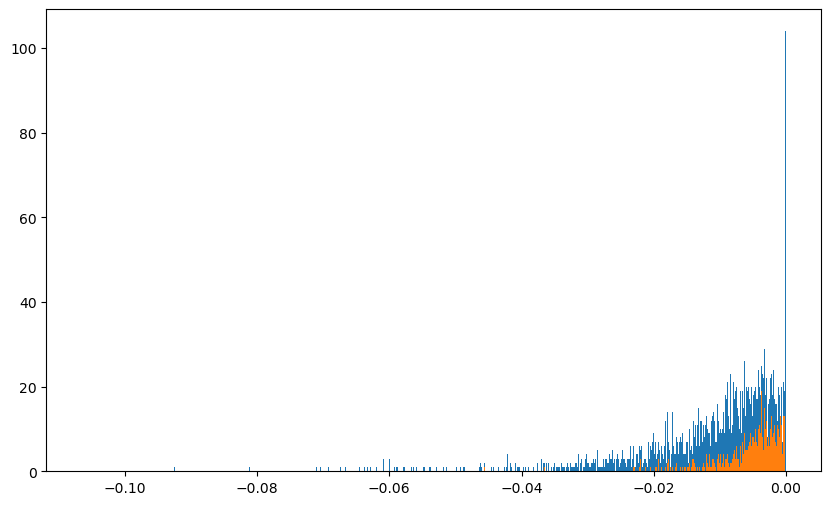

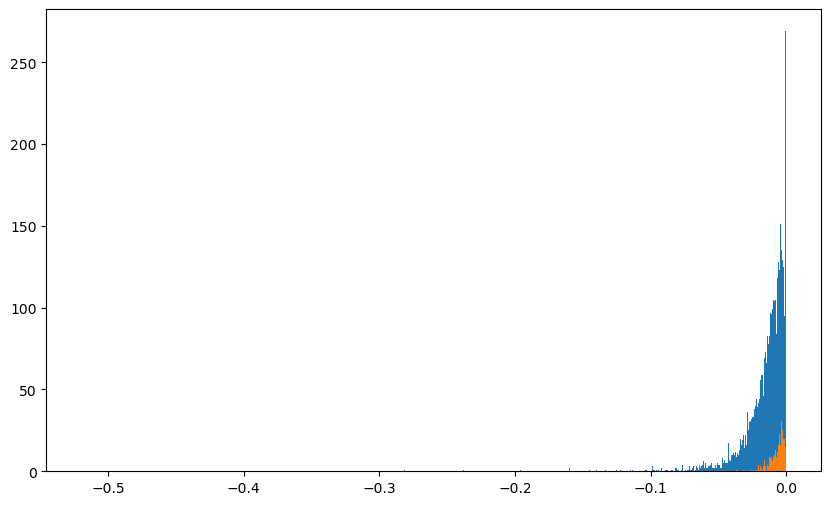

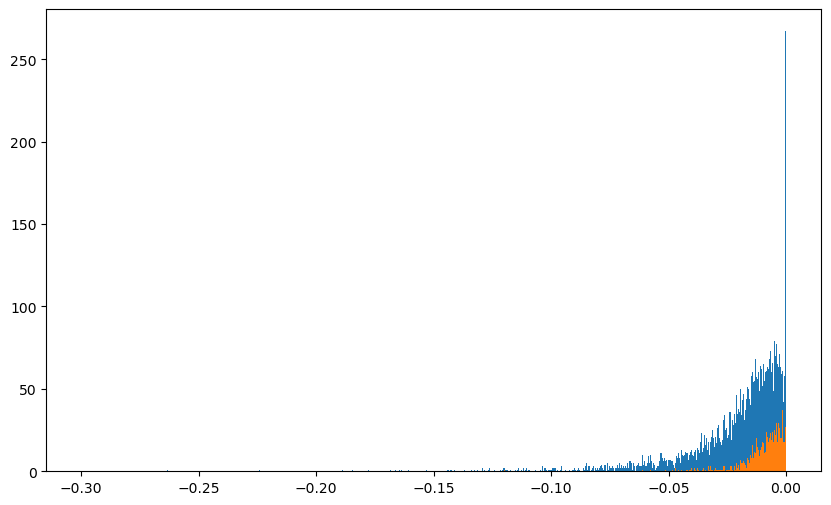

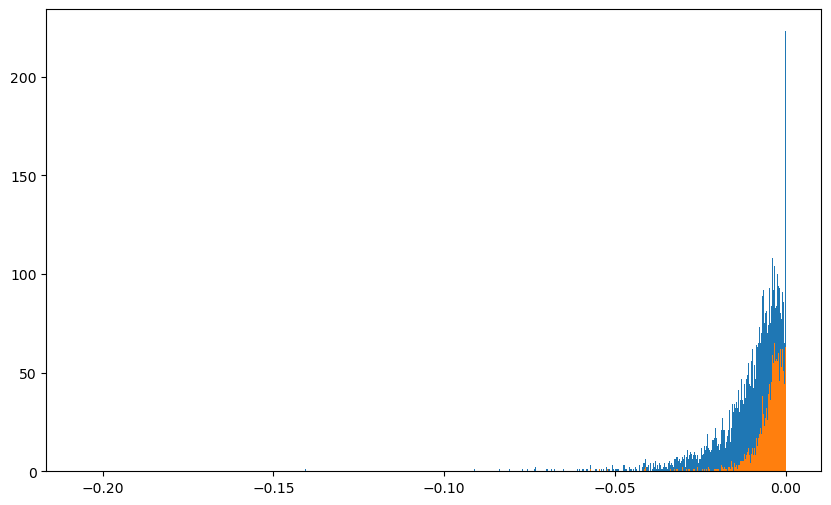

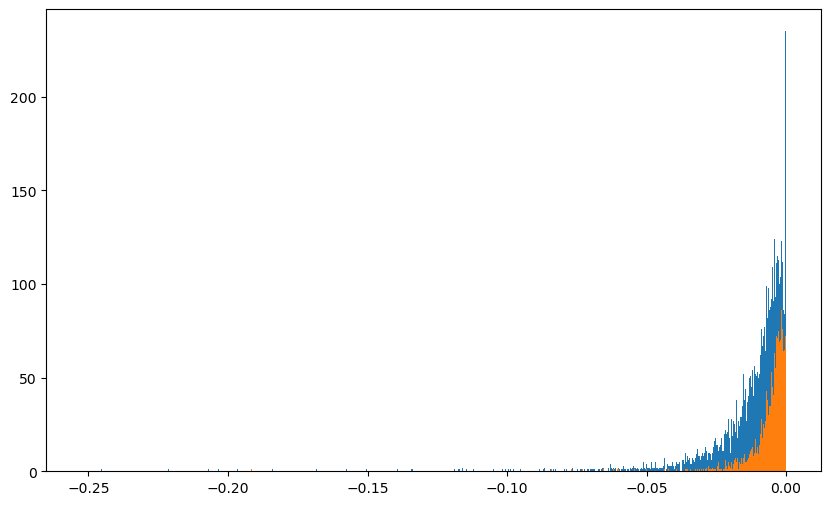

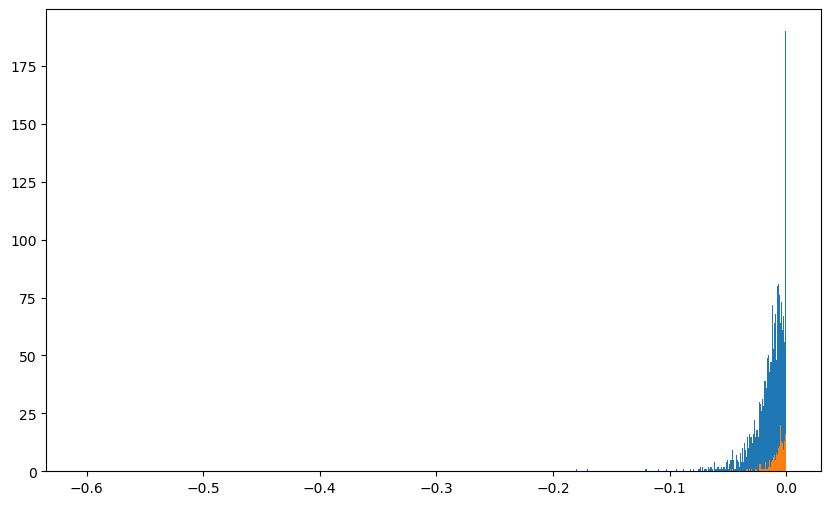

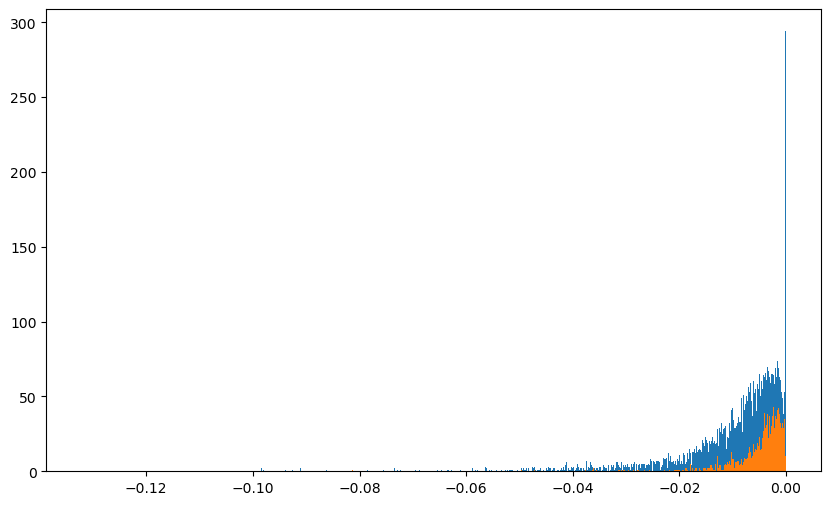

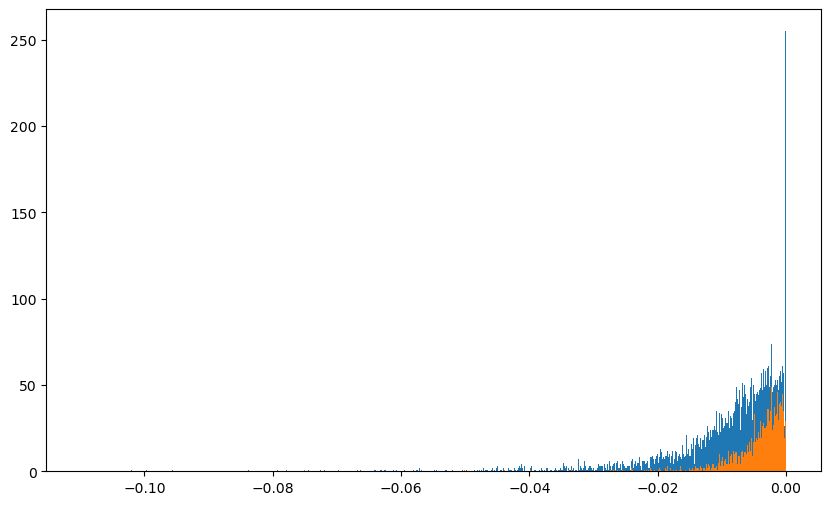

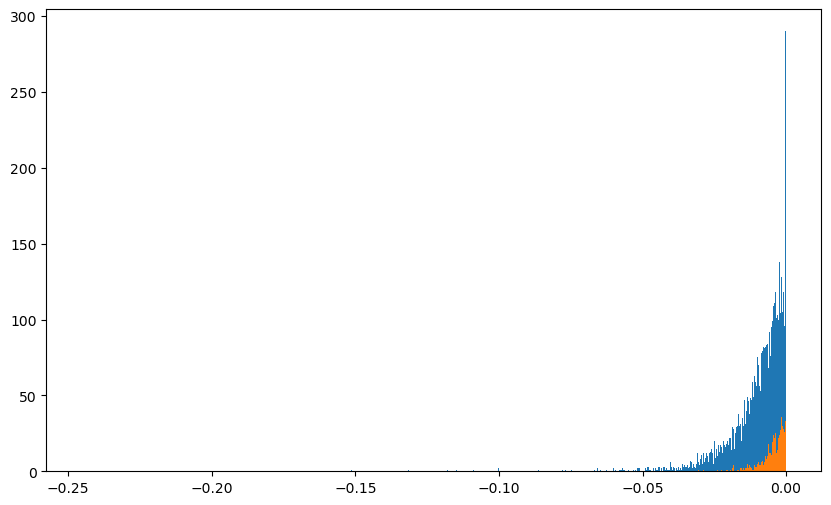

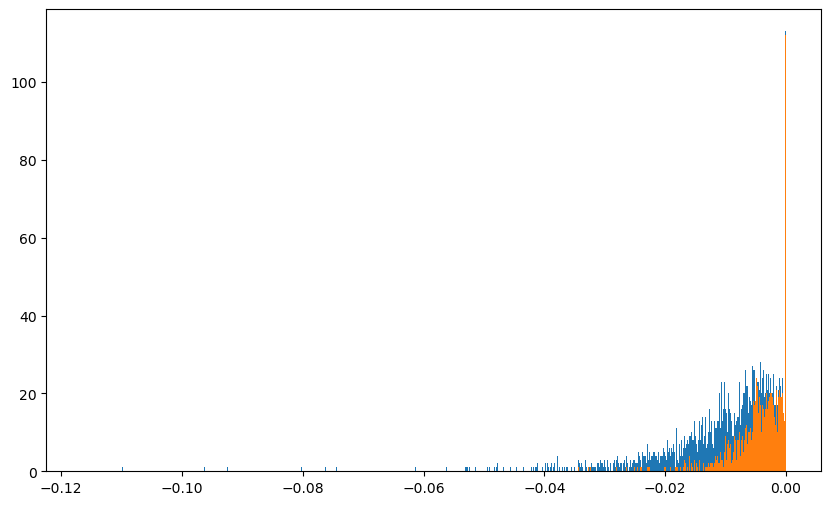

In [40]:
for symbol in timeseries.keys():
    fig, ax = plt.subplots(figsize=(10,6))
    plt.hist(timeseries[symbol]['low_ratio'], bins=1000, label=f'{symbol} price')
    plt.hist(timeseries[symbol]['low_ratio'].where(timeseries[symbol]['delta_session_ratio'] > 0), bins=1000)